In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf

warnings.filterwarnings("ignore")

%matplotlib inline

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5)

## Obtaining the Data - Project 1

In [2]:
import os
os.chdir("/Users/zaid/Desktop/StockMarketProject")

In [3]:
#Reading in the two datasets we will start to work with
fundamentals_df = pd.read_csv("S&P_500Finance.csv")
stock_time_df = pd.read_csv("S&P_500_Time2.csv")

In [4]:
#This is the dataset that will be used to classifiy stocks into various categories that peterain/determine their respective growth levels
fundamentals_df

Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  \
0         175.490  1.387211e+11  9.048000e+09     4.390271       11.34   
1          48.925  1.078342e+10  6.010000e+08     3.575483        6.35   
2          42.280  1.021210e+11  5.744000e+09     3.740480        3.19   
3          60.050  1.813863e+11  1.031000e+10     6.291571       26.14   
4         114.820  9.876586e+10  5.643228e+09     2.604117       10.62   
..            ...           ...           ...          ...         ...   
500        46.860  1.291502e+10  7.220000e+08     2.726209        5.31   
501        62.850  2.700330e+10  2.289000e+09     6.313636      212.08   
502       108.170  2.445470e+10  2.007400e+09     3.164895        2.39   
503        38.430  1.067068e+10  0.000000e+00     3.794579        1.42   
504        52.000  3.599111e+10  1.734000e+09     9.280896       18.09   

                                           SEC Filings  
0    http://www.sec.gov/cgi-bin/browse-edgar?action...  
1    http://www.sec.gov/cgi-bin/browse-edgar?action...  
2    http://www.sec.gov/cgi-bin/browse-edgar?action...  
3    http://www.sec.gov/cgi-bin/browse-edgar?action...  
4    http://www.sec.gov/cgi-bin/browse-edgar?action...  
..                                                 ...  
500  http://www.sec.gov/cgi-bin/browse-edgar?action...  
501  http://www.sec.gov/cgi-bin/browse-edgar?action...  
502  http://www.sec.gov/cgi-bin/browse-edgar?action...  
503  http://www.sec.gov/cgi-bin/browse-edgar?action...  
504  http://www.sec.gov/cgi-bin/browse-edgar?action...  

[505 rows x 14 columns]

## Data Cleaning and Preprocessing - Stock Fundamentals dataset

In [5]:
#Showcasing the number of observations for each feature with missing values
#Showcasing the 2 observations with missing P/E values  
print(fundamentals_df.isna().sum())
fundamentals_df[fundamentals_df["Price/Earnings"].isna()]

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


Symbol            Name                  Sector  Price  Price/Earnings  \
360   PRGO         Perrigo             Health Care  84.44             NaN   
430    TPR  Tapestry, Inc.  Consumer Discretionary  48.85             NaN   

     Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
360        0.731261          -28.01        95.93         63.68  1.232638e+10   
430        0.000000            2.09        50.71         36.69  1.424720e+10   

     EBITDA  Price/Sales  Price/Book  \
360     0.0     3.385007        2.03   
430     0.0     4.078549        4.35   

                                           SEC Filings  
360  http://www.sec.gov/cgi-bin/browse-edgar?action...  
430  http://www.sec.gov/cgi-bin/browse-edgar?action...

In [6]:
#Replacing the missing P/E value for the "TPR" stock observation with 23.37. This is because the company has a postivie "Earnings/Share" 
#and "Price/Earnings" is calculated by "Price" divided by "Earnings/Share"
#Also replacing the "Price/Earnings" value for the "PRGO" stock observation with "-1" as this company does not yield a profit as shown 
#for its "Earnings/Share" feature value. 
#Also imputing the missing values in the "Price/Book" feature with the median value of all the values within the feature. 

fundamentals_df.iloc[430, fundamentals_df.columns.get_loc("Price/Earnings")] = 23.37
fundamentals_df.iloc[360, fundamentals_df.columns.get_loc("Price/Earnings")] = -1
fundamentals_df["Price/Book"].fillna(fundamentals_df["Price/Book"].median(), inplace = True)

fundamentals_df.iloc[[360, 430]]
print(fundamentals_df.isna().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


In [7]:
#Dropping the SEC filings feature as it is not needed for either the visualization, exploratory, or modeling phases. 
#The SEC filings feature itself is not important. However, the SEC filings in regards to stocks are
#official documents that publicly traded companies are required to submit to the U.S. Securities and Exchance Commision (SEC) 
#and provide a comprehensive overview of a company's financial performance and condition, as well as other critical information for investors. 
fundamentals_df.drop(columns = ["SEC Filings"], inplace = True)
fundamentals_df


Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  
0         175.490  1.387211e+11  9.048000e+09     4.390271       11.34  
1          48.925  1.078342e+10  6.010000e+08     3.575483        6.35  
2          42.280  1.021210e+11  5.744000e+09     3.740480        3.19  
3          60.050  1.813863e+11  1.031000e+10     6.291571       26.14  
4         114.820  9.876586e+10  5.643228e+09     2.604117       10.62  
..            ...           ...           ...          ...         ...  
500        46.860  1.291502e+10  7.220000e+08     2.726209        5.31  
501        62.850  2.700330e+10  2.289000e+09     6.313636      212.08  
502       108.170  2.445470e+10  2.007400e+09     3.164895        2.39  
503        38.430  1.067068e+10  0.000000e+00     3.794579        1.42  
504        52.000  3.599111e+10  1.734000e+09     9.280896       18.09  

[505 rows x 13 columns]

In [8]:
#Data types for each feature in our dataframe 
fundamentals_df.dtypes

Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap        float64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
dtype: object

In [9]:
#Adding a new feature called "Net Income" which can be calculated by diviing the "Market Cap" by "Price" then multiplying that value to 
#"Price/Earnings". The first part of the calculation calculates the companies total outstanding shares which in turn can be multiplied by
# "Price/Earnings" to calculate total profit. "Net Income" represents the total profit a company receives per quarter and 
#is a crucial metric in measuring a companies financial health and operational performance. 

#Also changing the data type for the "Market Cap" as it is of type "object" and we need it as type "float64" in order to perform arithmetic
#computations 

fundamentals_df["Market Cap"] = fundamentals_df["Market Cap"].apply(pd.to_numeric, errors = "coerce").astype('Float64')
fundamentals_df["Net Income"] = fundamentals_df["Earnings/Share"] * (fundamentals_df["Market Cap"] / fundamentals_df["Price"])
fundamentals_df

Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High      Market Cap        EBITDA  Price/Sales  Price/Book  \
0         175.490  138721055226.0  9.048000e+09     4.390271       11.34   
1          48.925   10783419933.0  6.010000e+08     3.575483        6.35   
2          42.280  102121042306.0  5.744000e+09     3.740480        3.19   
3          60.050  181386347059.0  1.031000e+10     6.291571       26.14   
4         114.820   98765855553.0  5.643228e+09     2.604117       10.62   
..            ...             ...           ...          ...         ...   
500        46.860   12915021000.0  7.220000e+08     2.726209        5.31   
501        62.850   27003303098.0  2.289000e+09     6.313636      212.08   
502       108.170   24454698119.0  2.007400e+09     3.164895        2.39   
503        38.430   10670678640.0  0.000000e+00     3.794579        1.42   
504        52.000   35991109776.0  1.734000e+09     9.280896       18.09   

            Net Income  
0    4929206143.792543  
1     304312979.516932  
2     471858379.235116  
3    5501116167.257651  
4    3569771139.514452  
..                 ...  
500    336481896.78246  
501    1440412104.9654  
502  1907182810.111573  
503   547106378.702426  
504   830447925.190882  

[505 rows x 14 columns]

## Data Cleaning and Preprocessing - Time Series Stock Data 

In [10]:
#This is the dataset that will be used to predict stock prices based on a time series analysis 
stock_time_df

Date Symbol   Adj Close       Close        High         Low  \
0        2009-12-31    MMM         NaN         NaN         NaN         NaN   
1        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
2        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
3        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
4        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
...             ...    ...         ...         ...         ...         ...   
1593499  2022-07-20    ZTS  176.250000  176.250000  178.179993  175.649994   
1593500  2022-07-21    ZTS  180.600006  180.600006  180.750000  175.770004   
1593501  2022-07-22    ZTS  178.179993  178.179993  181.160004  177.259995   
1593502  2022-07-25    ZTS  175.179993  175.179993  178.699997  174.089996   
1593503  2022-07-26    ZTS  176.380005  176.380005  176.750000  173.960007   

               Open     Volume  
0               NaN        NaN  
1         83.089996  3043700.0  
2         82.800003  2847000.0  
3         83.879997  5268500.0  
4         83.320000  4470100.0  
...             ...        ...  
1593499  177.539993  1944300.0  
1593500  175.770004  1878400.0  
1593501  180.259995  1224500.0  
1593502  178.009995  1291300.0  
1593503  174.880005  1354900.0  

[1593504 rows x 8 columns]

In [11]:
#Showcasing the data types of every column and the index of the dataframe 
stock_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593504 entries, 0 to 1593503
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1593504 non-null  object 
 1   Symbol     1593504 non-null  object 
 2   Adj Close  1522337 non-null  float64
 3   Close      1522337 non-null  float64
 4   High       1522337 non-null  float64
 5   Low        1522337 non-null  float64
 6   Open       1522337 non-null  float64
 7   Volume     1522337 non-null  float64
dtypes: float64(6), object(2)
memory usage: 97.3+ MB


In [12]:
#Dropping the first row as it is an irrelevant observation. In order to do this, the "Symbol" feature must be grouped by the "Date" feature

time_stock_df = stock_time_df

time_stock_df = time_stock_df.groupby(["Symbol", "Date"]).first().reset_index()
time_stock_df.drop(time_stock_df.index[0], inplace = True)

time_stock_df

Symbol        Date   Adj Close       Close        High         Low  \
1            A  2010-01-04   20.434929   22.389128   22.625179   22.267525   
2            A  2010-01-05   20.212959   22.145924   22.331903   22.002861   
3            A  2010-01-06   20.141132   22.067240   22.174536   22.002861   
4            A  2010-01-07   20.115025   22.038628   22.045780   21.816881   
5            A  2010-01-08   20.108498   22.031473   22.067240   21.745352   
...        ...         ...         ...         ...         ...         ...   
1593499    ZTS  2022-07-20  176.250000  176.250000  178.179993  175.649994   
1593500    ZTS  2022-07-21  180.600006  180.600006  180.750000  175.770004   
1593501    ZTS  2022-07-22  178.179993  178.179993  181.160004  177.259995   
1593502    ZTS  2022-07-25  175.179993  175.179993  178.699997  174.089996   
1593503    ZTS  2022-07-26  176.380005  176.380005  176.750000  173.960007   

               Open     Volume  
1         22.453505  3815561.0  
2         22.324751  4186031.0  
3         22.067240  3243779.0  
4         22.017166  3095172.0  
5         21.917025  3733918.0  
...             ...        ...  
1593499  177.539993  1944300.0  
1593500  175.770004  1878400.0  
1593501  180.259995  1224500.0  
1593502  178.009995  1291300.0  
1593503  174.880005  1354900.0  

[1593503 rows x 8 columns]

### Special Preprocessing Step:


Temporarily changing the values in the "Date" column to a Pandas datetime object in order to prepare the data for resampling. Then temporarily 
setting the dataframe index to two different indices representing the "Symbol" and "Date" features, respectively. This is done to compute three 
different objectives: Reducing the dimensionality of the dataframe by downsampling to only a monthly frequency, removing the duplicate date values for each unique stock ticker ("Symbol attribute"), and filling in the remaining missing values by interpolation, which attempts to fill in missing values by using the values of adjacent data to linearly calculate appropriate missing values for the empty date observations. This entire computation can only happen when the "Date" feature is grouped by the "Symbol" feature in which both features are temporaily dataframe indices.

The purpose of this computation is to achieve key preprocessing transformations. First is to remove duplicatated dates for each stock, as there can only be one unique trading day per stock. Then in order to best portray any possible seasonal or trending components within the data, its 
usually best to have monthly price values at the end of each month for each stock, as any visualization will be easier to interpret over a period of years. Finally, there was already an expectation that this dataset would contain missing values, which already in place delibertley. This is due to the fact that the stock market is not open everyday during the year as it is only open on business days, which exludes the weekend and holidays. Therefore one of the most applicable ways of filling in those missing values would be to analyze values either subsequently or in the past of said missing observed values and using linear techniques to compute a value for said missing observation. 

This entire preprocessing step is crucial, as it sets the stage for the main objectives: To represent the adjusted closing stock price on a monthly basis at the end of each month, ranging from the years 2010 - 2022 for each of the stocks in the "Magnificent 7". This data will then 
be utilized in a time series analyis and modeling phase to attempt provde insights into how investors can optimize their investment strategies based on historical performance trends and patterns.

In [13]:
#Special Preprocessing Step

time_stock_df["Date"] = pd.to_datetime(time_stock_df["Date"])
time_stock_df.set_index(["Symbol", "Date"], inplace = True)

time_stock_df = time_stock_df.groupby(level = 0).resample("M", level = 1).first().interpolate()

print(time_stock_df.info())
time_stock_df

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 76455 entries, ('A', Timestamp('2010-01-31 00:00:00')) to ('ZTS', Timestamp('2022-07-31 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  76455 non-null  float64
 1   Close      76455 non-null  float64
 2   High       76455 non-null  float64
 3   Low        76455 non-null  float64
 4   Open       76455 non-null  float64
 5   Volume     76455 non-null  float64
dtypes: float64(6)
memory usage: 3.8+ MB
None


Adj Close       Close        High         Low        Open  \
Symbol Date                                                                     
A      2010-01-31   20.434929   22.389128   22.625179   22.267525   22.453505   
       2010-02-28   19.018194   20.836910   20.972818   20.121601   20.143063   
       2010-03-31   20.950695   22.954220   22.982834   22.482117   22.482117   
       2010-04-30   22.556767   24.713877   24.942776   24.499285   24.706724   
       2010-05-31   24.006147   26.301861   26.387697   26.015738   26.108727   
...                       ...         ...         ...         ...         ...   
ZTS    2022-03-31  192.539993  192.539993  195.000000  191.300003  193.910004   
       2022-04-30  191.110001  191.110001  191.550003  186.699997  188.770004   
       2022-05-31  174.669998  174.669998  177.250000  171.550003  176.389999   
       2022-06-30  167.020004  167.020004  171.830002  165.669998  170.869995   
       2022-07-31  174.210007  174.210007  174.500000  170.500000  172.070007   

                      Volume  
Symbol Date                   
A      2010-01-31  3815561.0  
       2010-02-28  5585429.0  
       2010-03-31  4723562.0  
       2010-04-30  3105098.0  
       2010-05-31  2599162.0  
...                      ...  
ZTS    2022-03-31  1669100.0  
       2022-04-30  1831400.0  
       2022-05-31  3513000.0  
       2022-06-30  1733600.0  
       2022-07-31  1498400.0  

[76455 rows x 6 columns]

In [14]:
#Resetting the index back to its original form from the temporary state it was set in to compute and preprocess the dataframe to achieve 
# the desired transformations. 
#Then setting the "Date" feature back to a Pandas datetime object and then setting it as the main indice of the dataframe. We then drop the 
#We then drop the "Date" feature as it is no longer needed a feature

time_stock_df.reset_index(inplace = True)
time_stock_df["Date"] = pd.to_datetime(time_stock_df["Date"])
time_stock_df.set_index(time_stock_df["Date"], inplace = True)
time_stock_df.drop(columns = ["Date"], inplace = True)

time_stock_df

Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2010-01-31      A   20.434929   22.389128   22.625179   22.267525   22.453505   
2010-02-28      A   19.018194   20.836910   20.972818   20.121601   20.143063   
2010-03-31      A   20.950695   22.954220   22.982834   22.482117   22.482117   
2010-04-30      A   22.556767   24.713877   24.942776   24.499285   24.706724   
2010-05-31      A   24.006147   26.301861   26.387697   26.015738   26.108727   
...           ...         ...         ...         ...         ...         ...   
2022-03-31    ZTS  192.539993  192.539993  195.000000  191.300003  193.910004   
2022-04-30    ZTS  191.110001  191.110001  191.550003  186.699997  188.770004   
2022-05-31    ZTS  174.669998  174.669998  177.250000  171.550003  176.389999   
2022-06-30    ZTS  167.020004  167.020004  171.830002  165.669998  170.869995   
2022-07-31    ZTS  174.210007  174.210007  174.500000  170.500000  172.070007   

               Volume  
Date                   
2010-01-31  3815561.0  
2010-02-28  5585429.0  
2010-03-31  4723562.0  
2010-04-30  3105098.0  
2010-05-31  2599162.0  
...               ...  
2022-03-31  1669100.0  
2022-04-30  1831400.0  
2022-05-31  3513000.0  
2022-06-30  1733600.0  
2022-07-31  1498400.0  

[76455 rows x 7 columns]

In [15]:
#Dropping all the features except for the "Adj Close" feature as those other features will not be modeled in the time series analysis or forecast

time_stock_df.drop(columns = ["Close", "High", "Low", "Open", "Volume"], inplace = True)
time_stock_df

Symbol   Adj Close
Date                         
2010-01-31      A   20.434929
2010-02-28      A   19.018194
2010-03-31      A   20.950695
2010-04-30      A   22.556767
2010-05-31      A   24.006147
...           ...         ...
2022-03-31    ZTS  192.539993
2022-04-30    ZTS  191.110001
2022-05-31    ZTS  174.669998
2022-06-30    ZTS  167.020004
2022-07-31    ZTS  174.210007

[76455 rows x 2 columns]

In [16]:
#Finally converting the dataframe into a dataframe we can work with by selecting the unique ticker symbols for each stock from the "Symbol" 
#attribute and converting them to columns and keeping their respective "adjusted close price" values but aggregating them to their respective 
#unique ticker symbols

final_time_df = time_stock_df.pivot(columns = "Symbol", values = "Adj Close")

final_time_df.drop(final_time_df.index[0], inplace = True)
final_time_df

Symbol               A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2010-01-31   20.434929   4.496876   38.432693    6.572423  132.861934   
2010-02-28   19.018194   5.279352   38.537392    5.980319  129.827904   
2010-03-31   20.950695   7.249681   39.308331    6.418256  126.793875   
2010-04-30   22.556767   6.976287   40.372318    7.246835  123.759845   
2010-05-31   24.006147   6.966859   44.146488    8.179828  120.725816   
...                ...        ...         ...         ...         ...   
2022-03-31  131.929993  16.290001  201.169998  163.199997  147.690002   
2022-04-30  133.970001  18.240000  207.479996  174.309998  162.679993   
2022-05-31  119.570000  18.559999  200.490005  157.960007  147.869995   
2022-06-30  123.089996  17.290001  187.660004  148.710007  146.020004   
2022-07-31  119.209999  13.130000  173.639999  138.929993  153.800003   

Symbol             ABC        ABMD         ABT         ACN        ADBE  ...  \
Date                                                                    ...   
2010-01-31   22.101795    8.740000   19.778837   32.970871   37.090000  ...   
2010-02-28   23.031351    7.930000   19.513557   32.281208   32.480000  ...   
2010-03-31   23.365765   10.160000   19.861095   31.419127   34.889999  ...   
2010-04-30   23.798613   10.000000   19.374538   32.790630   35.740002  ...   
2010-05-31   26.037804    9.870000   18.766724   34.588467   33.590000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-03-31  141.970001  313.489990  118.169998  311.350006  466.679993  ...   
2022-04-30  156.520004  338.640015  118.580002  340.640015  458.190002  ...   
2022-05-31  148.970001  285.709991  112.830002  304.600006  407.290009  ...   
2022-06-30  150.009995  255.360001  115.080002  298.649994  418.160004  ...   
2022-07-31  143.139999  254.559998  110.220001  280.649994  368.480011  ...   

Symbol           WYNN        XEL        XOM       XRAY        XYL         YUM  \
Date                                                                            
2010-01-31  41.963718  13.932555  43.185623  32.782581  34.877508   19.900911   
2010-02-28  43.000351  13.780539  41.330807  31.158770  34.216261   20.205957   
2010-03-31  43.446491  13.892897  41.110123  31.140213  33.555015   19.327446   
2010-04-30  50.781609  14.307093  42.499336  32.040195  32.893768   22.362329   
2010-05-31  60.281830  14.775082  42.643906  34.093819  32.232522   24.696037   
...               ...        ...        ...        ...        ...         ...   
2022-03-31  81.639999  66.510002  79.169998  54.360001  86.760002  120.019997   
2022-04-30  80.629997  72.750000  83.120003  49.250000  86.230003  118.820000   
2022-05-31  71.709999  72.669998  86.410004  39.650002  81.830002  115.760002   
2022-06-30  65.129997  75.120003  97.839996  39.040001  83.750000  119.419998   
2022-07-31  58.180000  72.629997  87.550003  36.200001  78.750000  116.709999   

Symbol             ZBH        ZBRA       ZION         ZTS  
Date                                                       
2010-01-31   53.282867   28.670000  11.580979   50.234796  
2010-02-28   50.628475   26.740000  17.306305   49.662193  
2010-03-31   51.693806   29.490000  15.907710   49.089590  
2010-04-30   53.256229   29.930000  19.019705   48.516987  
2010-05-31   54.445831   28.660000  25.208935   47.944385  
...                ...         ...        ...         ...  
2022-03-31  124.139999  405.579987  64.940002  192.539993  
2022-04-30  127.730003  413.730011  64.300003  191.110001  
2022-05-31  120.650002  379.570007  57.009998  174.669998  
2022-06-30  119.279999  334.549988  56.000000  167.020004  
2022-07-31  107.269997  299.339996  51.380001  174.210007  

[151 rows x 503 columns]

In [17]:
#Checking to see if we have any NA values and ensuring we have the right datatypes for our index and features

print(final_time_df.isna().sum())
final_time_df.info()

Symbol
A       0
AAL     0
AAP     0
AAPL    0
ABBV    0
       ..
YUM     0
ZBH     0
ZBRA    0
ZION    0
ZTS     0
Length: 503, dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151 entries, 2010-01-31 to 2022-07-31
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 594.6 KB


## Data Visualzation - Time Series Stock Data

In [18]:
#For the sake of visualization purposes, we will filter our visualizations to only contain amongst the top 7 companies form the S&P 500, known as 
#the "Magnificent Seven". This downsample can provide invaluable insights into the S&P 500 as a hole as these 7 companies represent 28.6% of 
#the S&P 500 in terms of market capitalization. Furthermore, these companies are amongst the top industry leaders in their respective sectors, 
#have high liquduity, and can signficnatly represent market trends. Essentially, their movements provide invaluable insights into the broader 
#market's behavior and investor sentiment. 

magnificent_seven = ["AAPL", "MSFT", "META", "TSLA", "NVDA", "AMZN", "GOOGL"]

### Autocorrelation Function

Computing the Autocorrelation Function for each stock of the magnificent 7. The Autocorrelation Function provides a single numerical value that
represents the correlation between values at different lags (time steps) throughout the entire time series. When this value is positive, it 
represents a positive correlation between a time series and a lagged version of itself. This means that when the value at one time point
is above its mean, the values at subsequent time points are also likely to be above their mean, and similarly when the value is below its mean. This can often indicate a trend or seasonal pattern within the series. In contract, when this value is negative, it indicates an inverse relationship between the time series and its lagged values. This means that if the value at one time point is above its mean, the values at subsequent time points are likely to be below their mean, and vice versa. This type of pattern might suggest a cyclical fluctuation within the time series data, where increases are likely to be followed by decreases, and decreases are likely to be followed by increases. And if this value is zero, it simply implies that there is no linear correlation between the time series and its lagged values at that particular lag. 

In the plot, the shaded area represents a 95% confidence interval for the estimates. This means that if the autocorrelation value lies within this area, it is not statistically significant; it could be due to random chance rather than an inherent autocorrelation in the data.

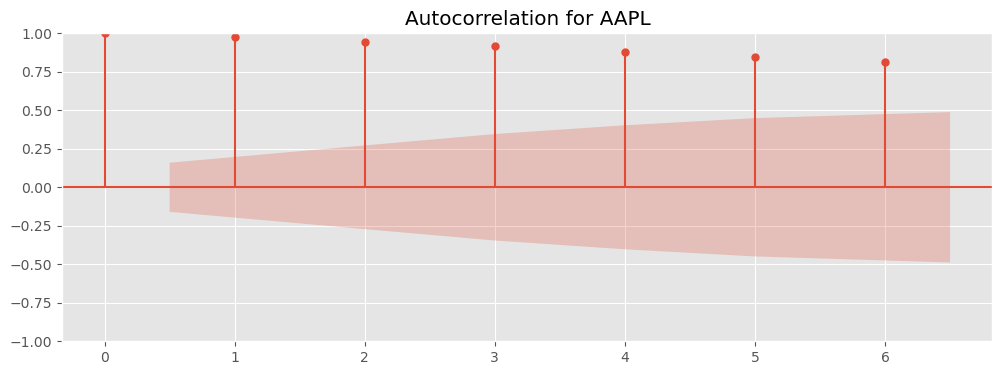

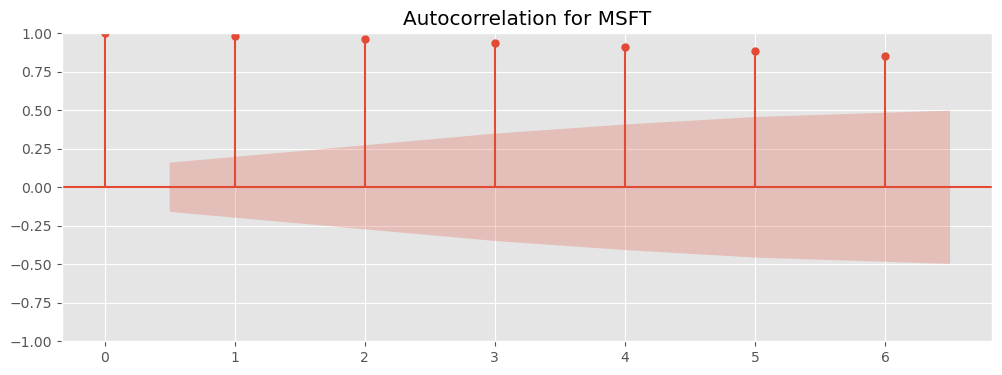

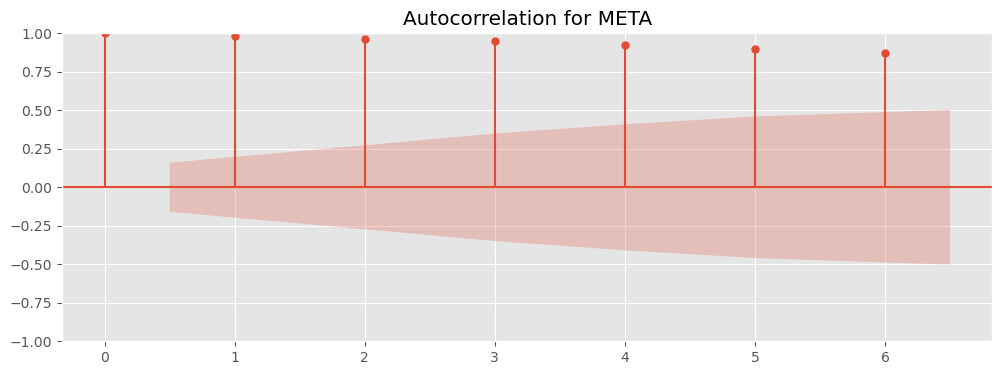

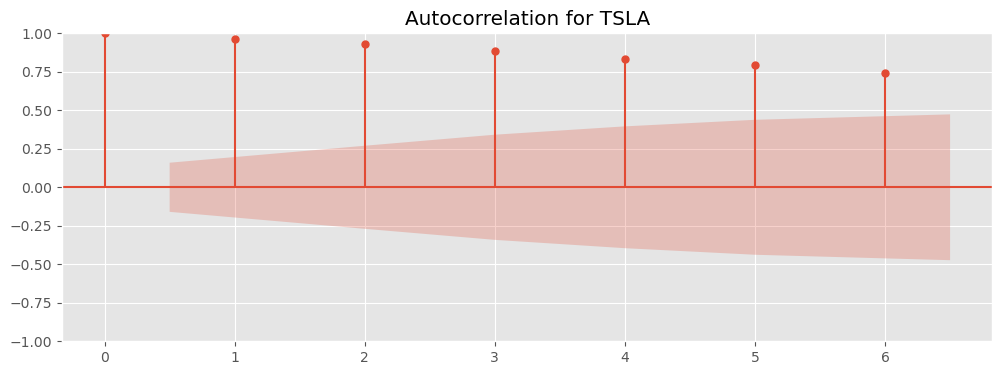

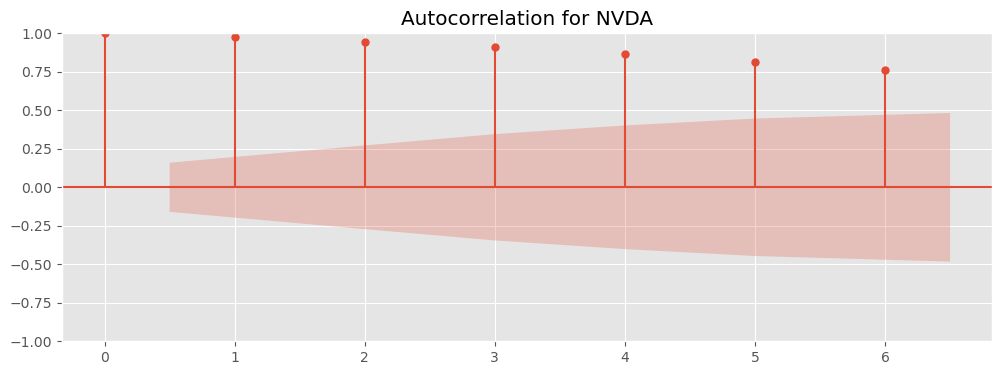

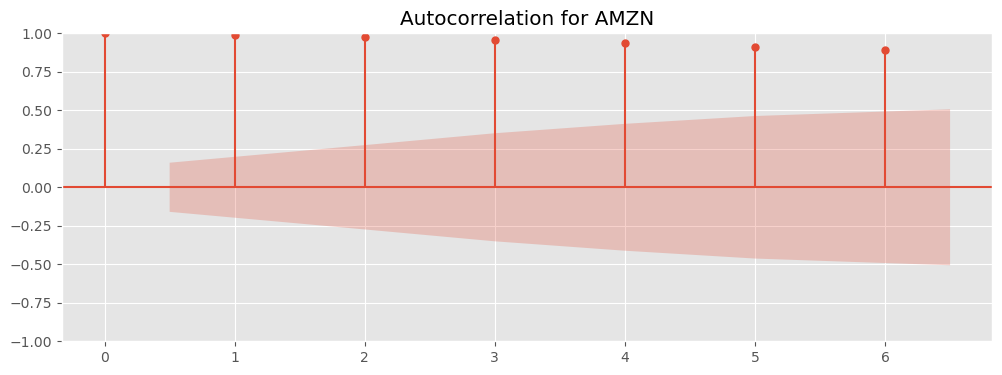

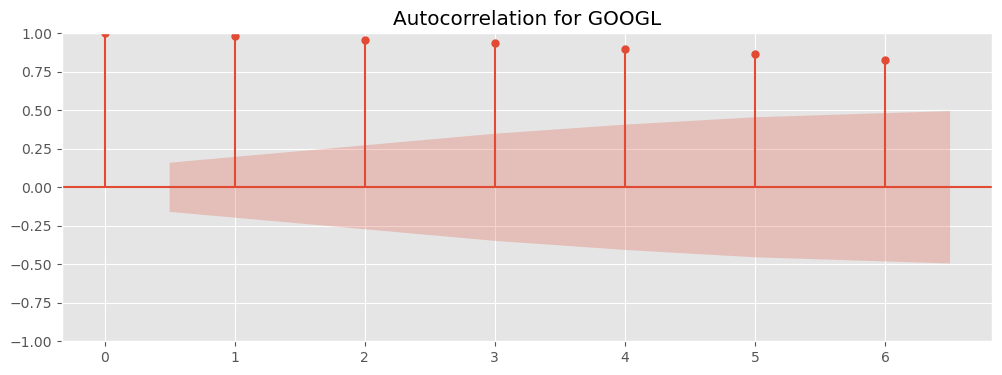

In [19]:
#Visualization 1: 
#Computing the autocorrelation function for each of our 7 companies' time series data with a lag of 6 (half a year)
from statsmodels.graphics.tsaplots import plot_acf

for company in magnificent_seven:
    fig, ax = plt.subplots(figsize = (12, 4))
    plot_acf(final_time_df[company], lags = 6, alpha = 0.05, ax = ax)
    ax.set_title(f"Autocorrelation for {company}")
    plt.show()


### Visualization 1 Analysis: 
A key takeawayfrom all 7 of these autocorrelation function graphs is the fact that there seems to be signficant high autocrrelation values for the first 3 lags which seem to be above 0.9. This suggests that the stock prices for each of these 7 companies have a clear momentum where past upward movements might predict future upward movements (and vice versa for downward movements). In other words, if the stock price for one of these companies were compared to its mean value 6 months prior, there is a high likelihood that it will be up compared to its mean today as well. 

We can also analyze that the autocorrelation values do seem to decrease as the lag increases, which is typical for many economic and financial time series. What this means is that the influence of past values becomes less significant as you move further away in time. Due to the similar pattern these 7 companies in the S&P 500 have, it suggests that they share common market influences or sector-related characteristics that affect their stock prices in a similar way. 

High autocorrelation values at the first few lags suggest momentum. Investors can use this information to implement momentum trading strategies in which they buy stocks that have been rising in the expectation that they will continue to do so in the near term. The fact that these seven companies share common market influences or sector characteristics indicates that they might respond similarly to certain economic events. This insight is crucial for investors looking to diversify their portfolio to manage risk. If an investor's portfolio is heavily weighted in these companies, they may be more exposed to sector-specific risks and less diversified than they might assume. Also the decrease in autocorrelation as the lag increases may suggest a strategic timing for entry and exit points. For instance, if an investor knows that the impact of past prices diminishes after a certain point, they might choose to hold stocks only for the duration where past performance is indicative of future performance.

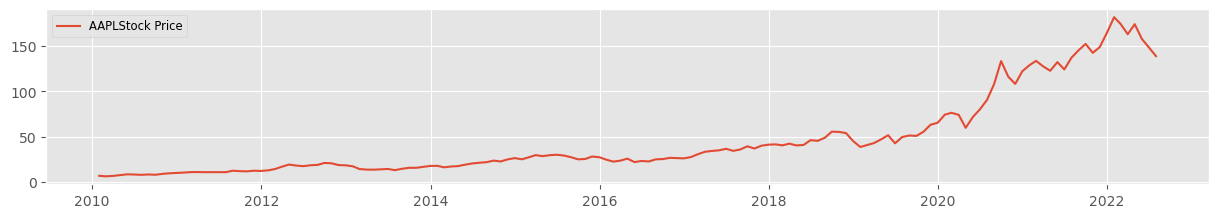

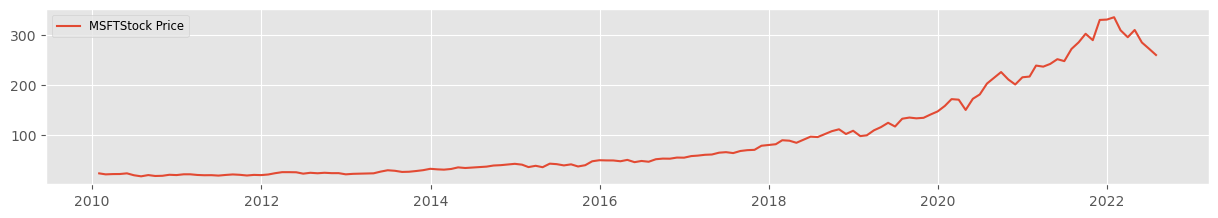

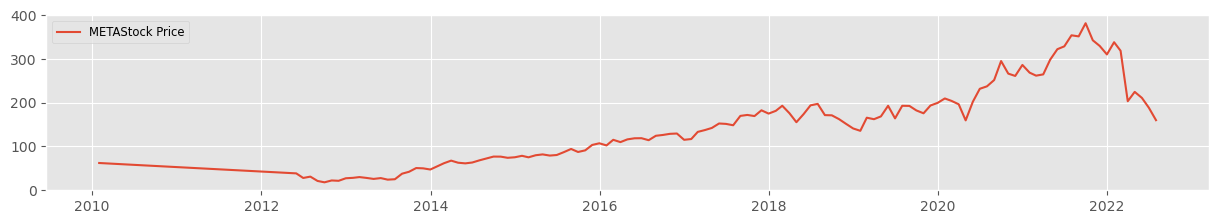

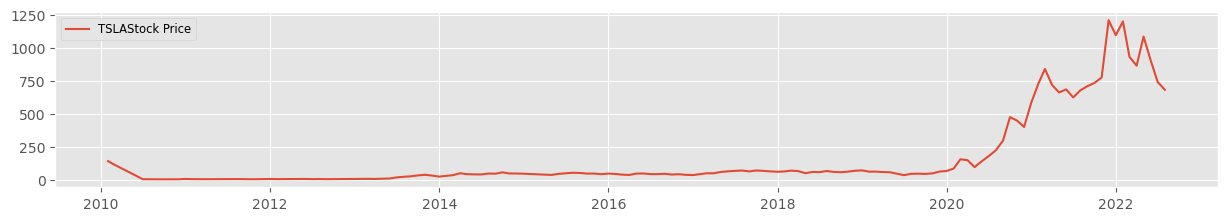

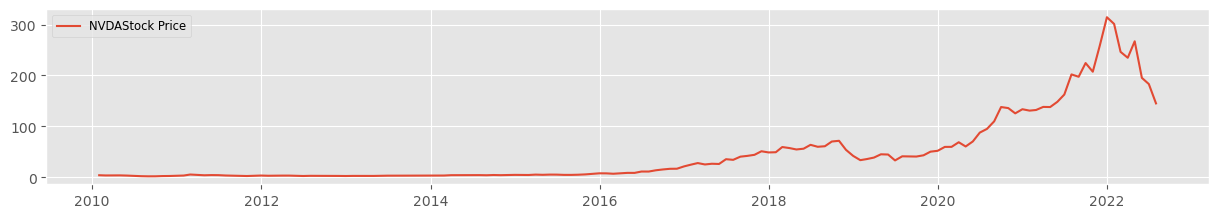

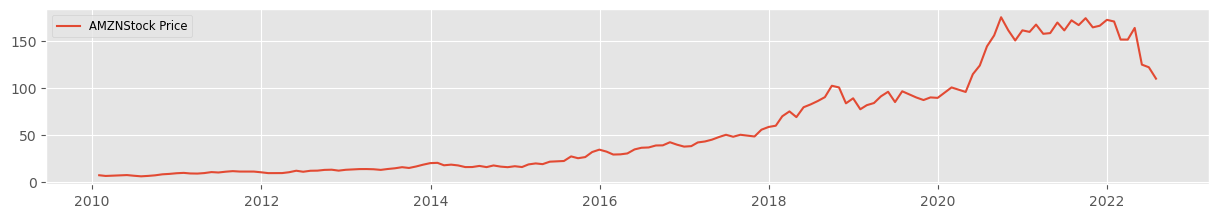

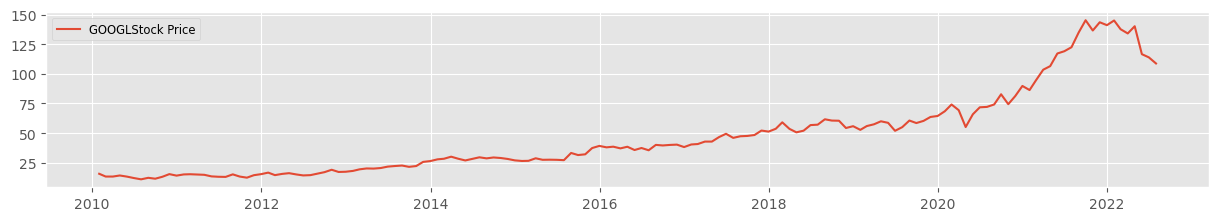

In [20]:
#Visualization 2: Stock prices from 2010 to 2022 for the 7 companies in the "Magnificent 7".
for stock in magnificent_seven:
    plt.subplot(2, 1, 1)
    plt.plot(final_time_df[stock], label = stock + "Stock Price")
    plt.legend(loc = "best", fontsize = "small")
    plt.show()

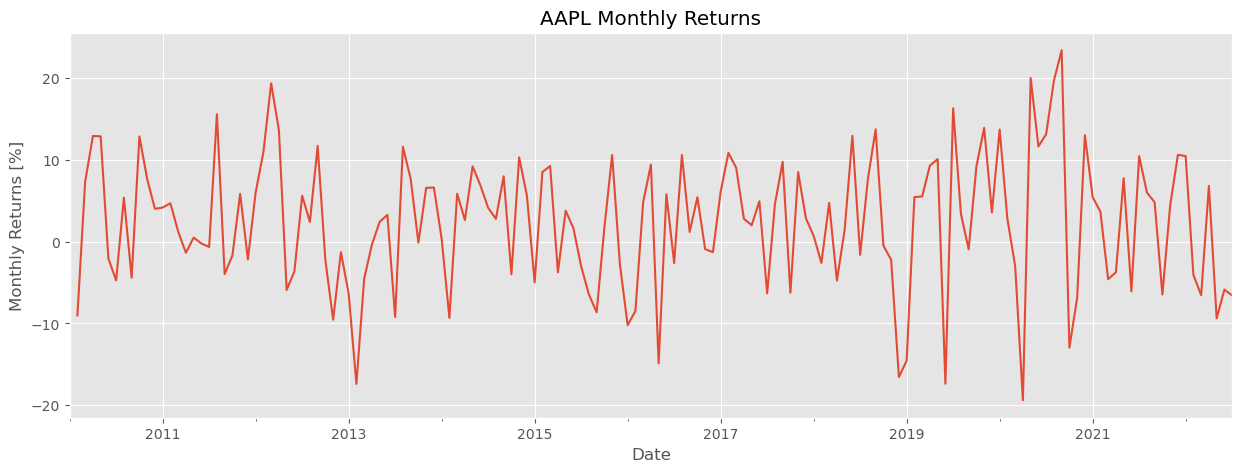

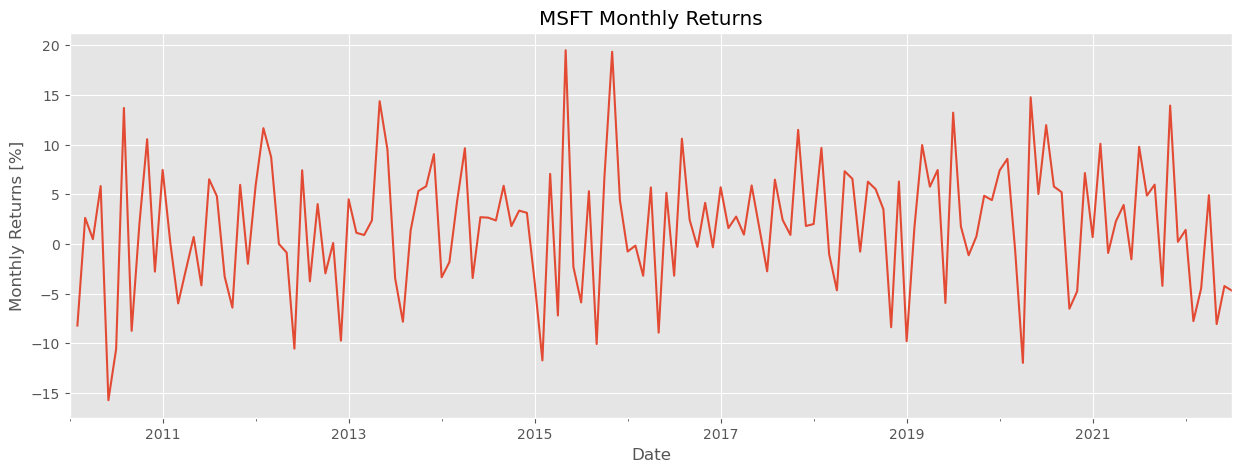

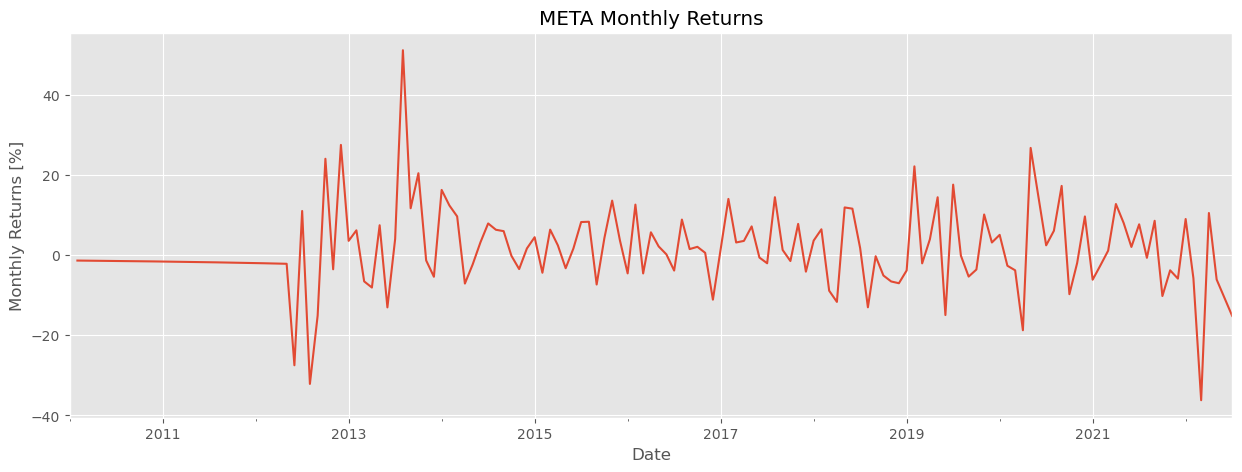

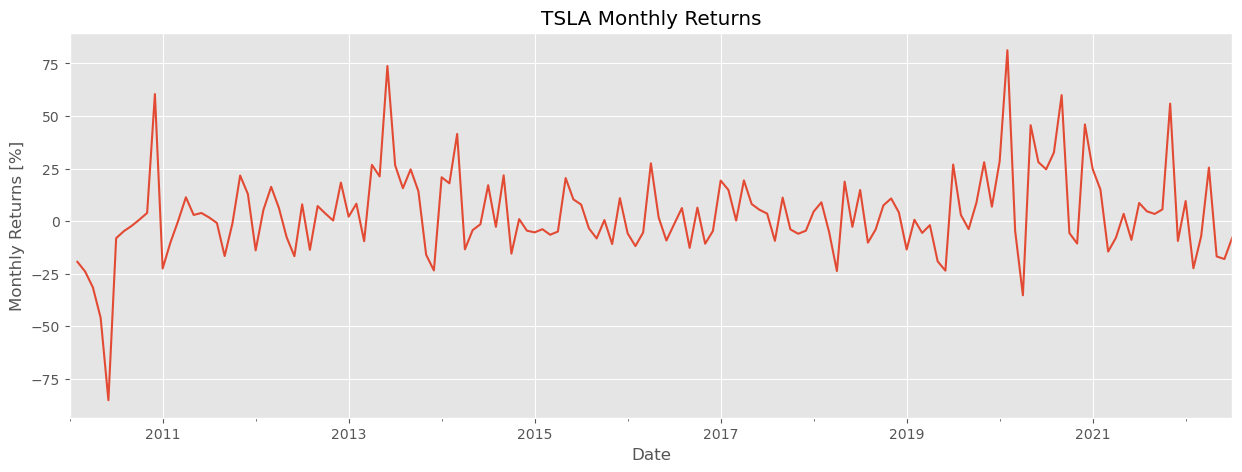

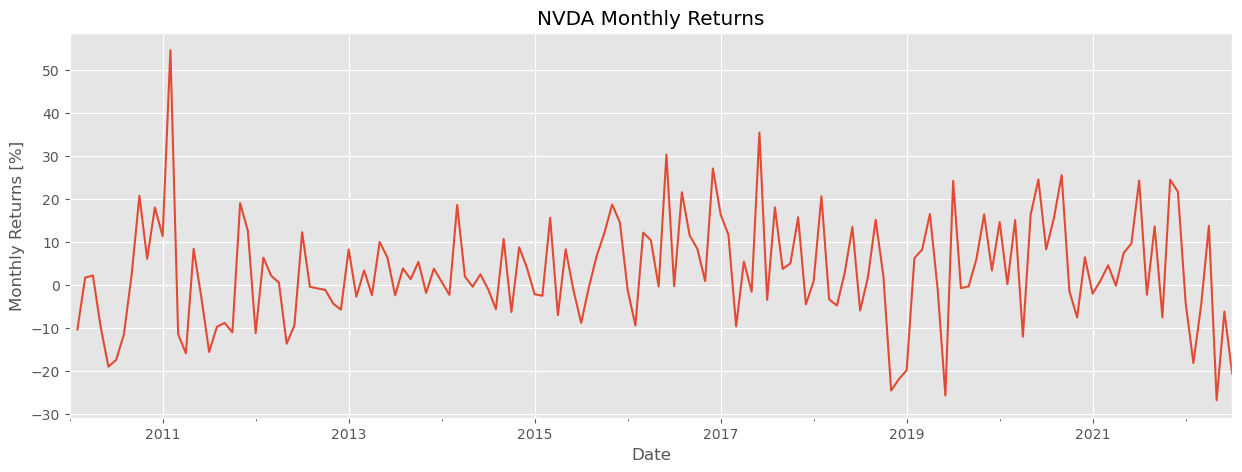

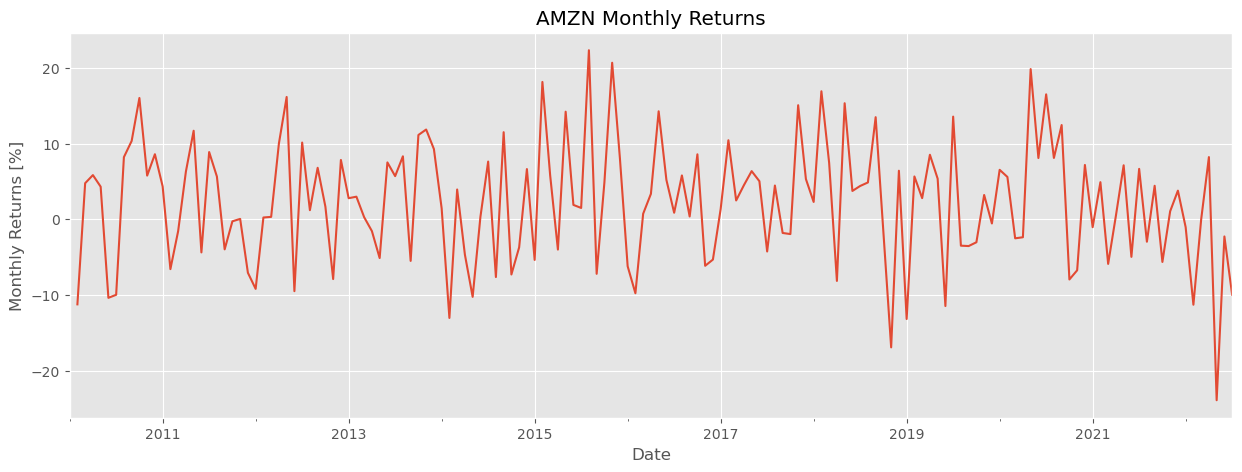

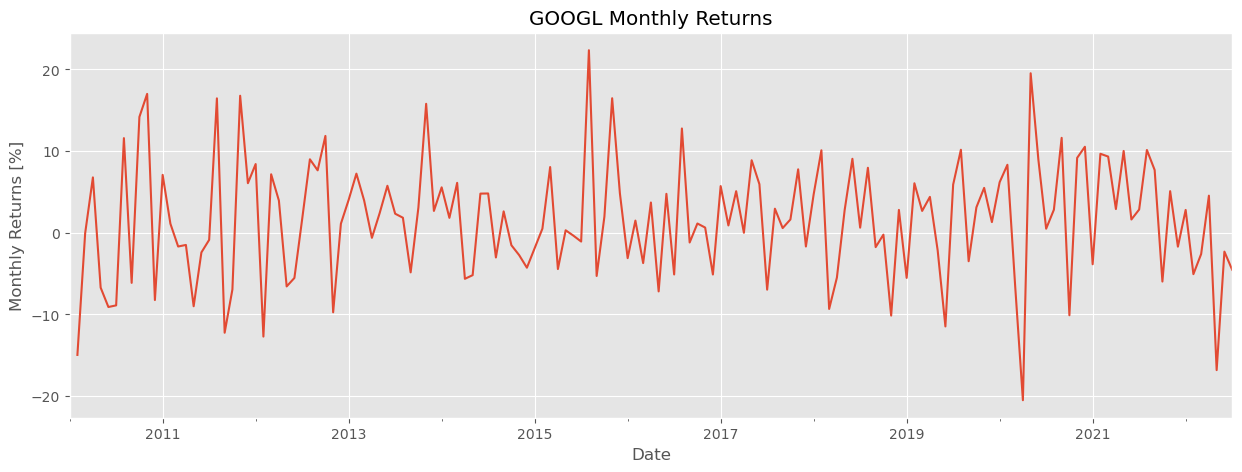

In [21]:
#Visualization 3: Monthly Returns for each stock in the "Magnificent 7"
for company in magnificent_seven:
    final_time_df[f"{company}_Monthly_Returns"] = final_time_df[company].pct_change(periods = 1).mul(100)
    final_time_df[f"{company}_Monthly_Returns"].plot(title = f"{company} Monthly Returns")
    plt.ylabel("Monthly Returns [%]")
    plt.show()

### Visualization 2 and 3 Analysis: 
By looking at these 7 plots of the "Magnificent 7" from visualization 2 over a span from 2010 to 2022, we can clearly identify the general long term upward trends for each of these companys' stock. These indicates growth and accumlation of value over time, which could reflect company's success and market expansion. There are, however, various short term flucuations that do occur at certain periods of time which could reflect market cycles, economic events, product launches, earnings reports, and other newsworthy events that could affect investor sentiment and stock valuation. Investors can also compare the long term growth performances of each company and assess which one has had the most growth relative to their starting values. The upward trend in the stock prices of these companies, combined with the information on autocorrelation from the previous visualization 1, suggests that there is some degree of predicatability in the short term based on the recent past. However, for long term investments, its crucial for investors to consider other factors, such as monthly returns, which portray the short term volatility in which risk averse investors might shy away from. 

Therefore, its crucial to understand and analyze the short term volatility, as visualization 3 yields significant insights into the monthly return volatility of these 7 stocks from 2010 through mid 2021. Extremely large spikes and or drops could be indicators that there have been signficnat market events which should be taken into consideration. A crucial takeaway from this analysis is the fact that although these stock prices may represent a growing positive trend over time, they can also be considered extremely volatile in the short term. For example, company quarterly earnings reports, in which a company reports their quarterly revenue and earning per share, that signficnatly beat or miss expectations can cause large price movements. Similarly, announcements of new products, changes in management, or strategy shifts can also have substantial impacts.

It is also essential for investors to digest macroecnomic events during certain time periods, as they reflect the broader economy as a whole, including stocks across the entire market. There is a noticeable downward trend in the stock prices of all seven analyzed stocks around mid-2022. This period coincides with a significant inflationary spike, with the Consumer Price Index reaching a peak of 9.1% in June 2022. Such a substantial macroeconomic event is likely the cause of the observed decline in stock values during this timeframe.

There are several key insights from both of these visualizations that investors can leverage to make informed decisions about asset allocation and portfolio diversification. The long-term upward trend analysis can be particularly helpful for investors with long-term investment goals. Such investors can use this trend as a basis for buy-and-hold strategies, focusing on the general growth and accumulation of value over time. The timing of short-term volatility can help investors make strategic decisions about when to enter or exit positions. For example, avoiding entry before the release of a company’s quarterly earnings report can mitigate the risk of negative surprises. Autocorrelation insights also suggest some level of predictability in the short term. Investors, especially those who utilize quantitative models, can incorporate autocorrelation in their predictive models to improve their accuracy for short-term trading. 

## Data Visualization - Stock Fundamentals dataset 

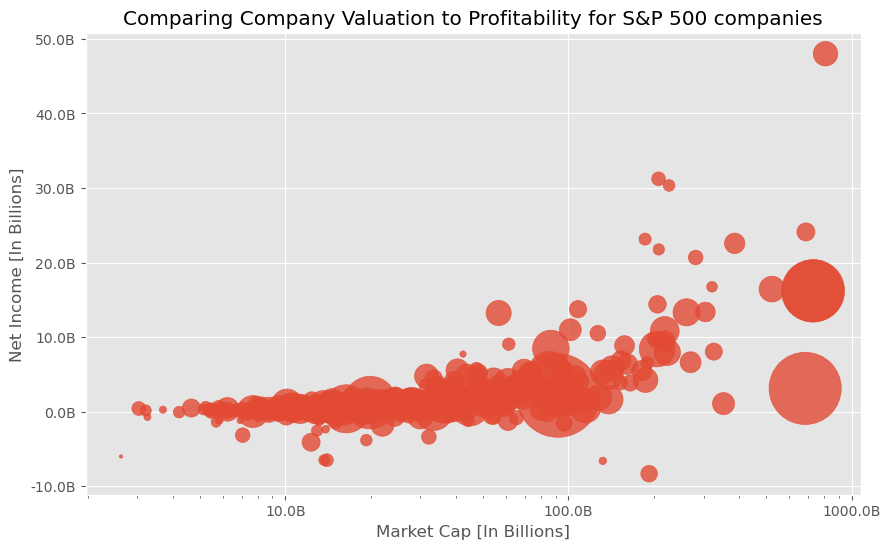

In [22]:
#Visualization 1

from matplotlib.ticker import FuncFormatter

plt.figure(figsize = (10, 6))
plt.scatter(x = fundamentals_df["Market Cap"], y = fundamentals_df["Net Income"], s = np.array(fundamentals_df["Price"]) * 2, alpha = 0.8)

plt.xscale('log')
plt.xlabel("Market Cap [In Billions]")
plt.ylabel("Net Income [In Billions]")
plt.title("Comparing Company Valuation to Profitability for S&P 500 companies")

def billions_formatter(x, pos):
    return '%1.1fB' % (x * 1e-9)


formatterB = FuncFormatter(billions_formatter)
plt.gca().xaxis.set_major_formatter(formatterB)
plt.gca().yaxis.set_major_formatter(formatterB)

plt.grid(True)

plt.show()

### Visualization 1 Analysis:

From analyzing visualization 1, we can analyze and determine that the general positive trend between Market Cap and Net Income for companies in the S&P 500 with a market cap of 100 billion dollars or more indicates that larger companies tend to be more profitable, which might appeal to investors seeking stabiliy. However, the varability also shows that size doesn't guarantee profitability, emphasizing the need for through analysis. The size of the scatter points, which represents stock price, shows the fact that higher priced stocks do not always correlate with higher Market Cap or Net Income which suggests that stock price alone is not a reliable indicator of a company's overall value or profitability. This also highlights the importance of looking beyond the share price when building a portfolio. 

The outliers with significantly high Market Caps and Net Incomes could be seen as less risky to investors because they may be considered to be "blue chip" stocks, which are stocks of highly valued, stable, profitable, and well known companies in their respective industires. Another key insight that this graph highlights is the fact that the differences in Net Income among companies with similar Market Caps could point to differences in operational efficiency, cost structures, or even differing business models, all of which are crucial for investors to understand in order to select stocks that align with their investment strategy and risk profile. 

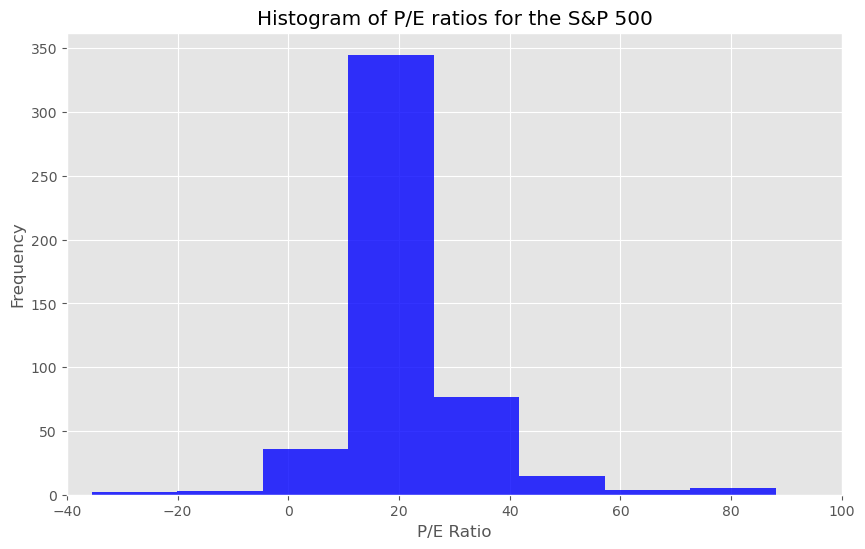

In [23]:
#Visualization 2

plt.figure(figsize = (10, 6))
plt.hist(fundamentals_df["Price/Earnings"], bins = 50, color = "blue", alpha = 0.8)
plt.xlabel("P/E Ratio")
plt.ylabel("Frequency")
plt.title("Histogram of P/E ratios for the S&P 500")

plt.xlim(-40, 100)
plt.grid(True)
plt.show()

### Visualization 2 analysis:

From analyzing visualization 2, we can analyze and determine a large concentration of companies within the S&P 500 possess P/E ratios in the lower ranges, particularly from aroun 15 - 25. This could signal positive insights to investors looking for growth at a reasonable price, as these companies could be undervalued relative to their earnings. There are also the few companies that possess a higher P/E ratio which could indicate they may have high growth expectations, but also carry a degree of risk as the price of their stock is expensive, relative to how much the company earns. Investors may view these as growth-oriented investments, but they must be cautious of overvaluation. In addition to the positive outliers, there are also negative outliers of companies with low P/E ratios. This is not necessarily a negative insight, however, as it could indicate that a company may be undervalued and is trading at a fair value relative to how much the company earns and the market may be overlooking the true earnings potential of the comapny. This can signal to investors who are more value-oriented than growth-oritented that a stock may be trading for a good valuation. However, investors must also be wary about the fact that it could also indicate the company does not have high growth expectations in the future. 

For risk-averse investors, focusing on stocks with moderate P/E ratios may offer a balance between value and growth while avoiding the extremes of overvaluation or potential distress indicated by very high or very low P/E ratios, respectively. This visualization indicates the diversity of valuation within the S&P 500, which suggests a diversified portfolio can be created using a broad selection of stocks from the S&P 500, which can help investors in balancing the overall risk of the portfolio.

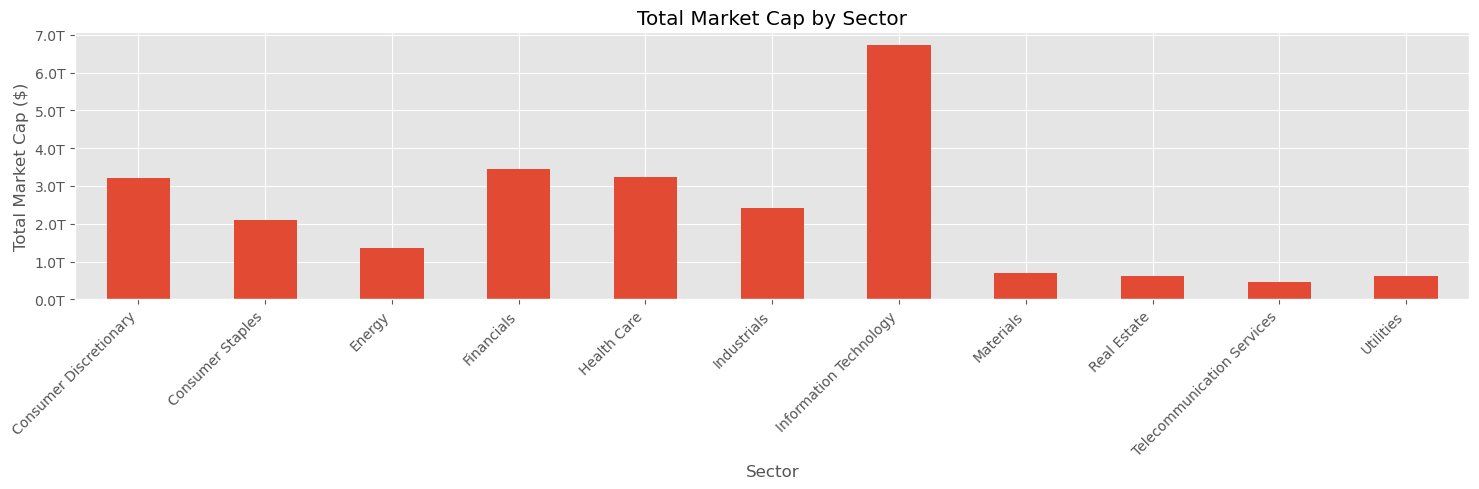

In [24]:
#Visualization 3

sector_market_cap = fundamentals_df.groupby("Sector")["Market Cap"].sum()
sector_market_cap.plot(kind = "bar")

plt.title("Total Market Cap by Sector")
plt.xlabel("Sector")
plt.ylabel("Total Market Cap ($)")
plt.xticks(rotation = 45, ha = "right")

def trillions_formatter(x, pos):
    return '%1.1fT' % (x * 1e-12)
 
formatterT = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatterT)
plt.tight_layout()
plt.show()


### Visualization 3 Analysis:

This visualization represents the difference in total market value of each sector in the S&P 500. This highlights the importance of considering sector weighing in portfolio construction to ensure diversification and manage sector-specific risks. From analzying this bar graph, the technology sector stands out with a much higher market valuation compared to other sectors. These insights may not be as surprising to investors due to the fact that tech companies greatly influence the economy through substantial contributions to economic growth and innovation. However, investors may want to utilize these insights when considering the potential growth for the tech sector as a whole versus its risk profile, as technology stocks can be more volatile than stocks in other sectors during certain economic cycles. 

Other sectors such as Financials and Health Care also have a signficant market value, as they have important contributions to the U.S. economy Investors might view companies in these sectors as key componenets for a balanced portfolio, due to their resilient volataility and stability during certain economic cycles, unlike companies in the tech sector. 

Another crucial takeaway from this visualization is that it could provide investors with insights into how they expose their portfolio to different sectors dependent on their specific investment goals. For example, if their goal is to invest in stable, high-income generating assets, they may invest more of their funds into companies within the Utilities or Consumer Staples, whose valuations may not be as high but yield substantial dividends. Conversely, for growth-oriented goals, sectors like Technology or Health Care may be preferred. 


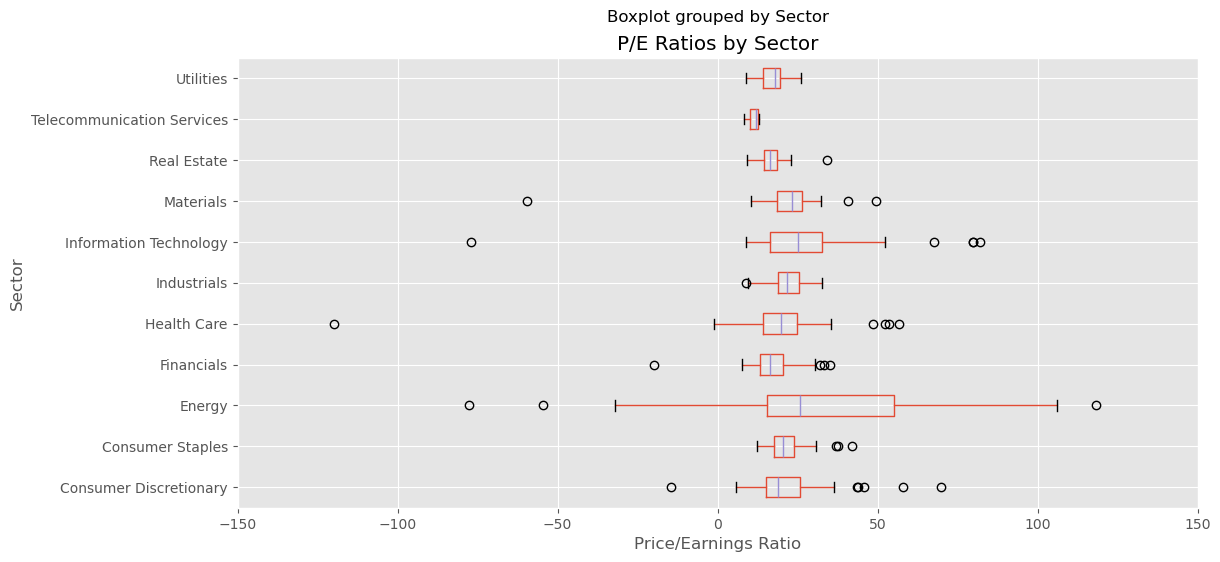

In [25]:
#Visualization 4:

fundamentals_df.boxplot(column = "Price/Earnings", by = "Sector", figsize = (12, 6), vert = False)
plt.title("P/E Ratios by Sector")
plt.xlabel("Price/Earnings Ratio")
plt.xlim(-150, 150)
plt.ylabel("Sector")
plt.show()

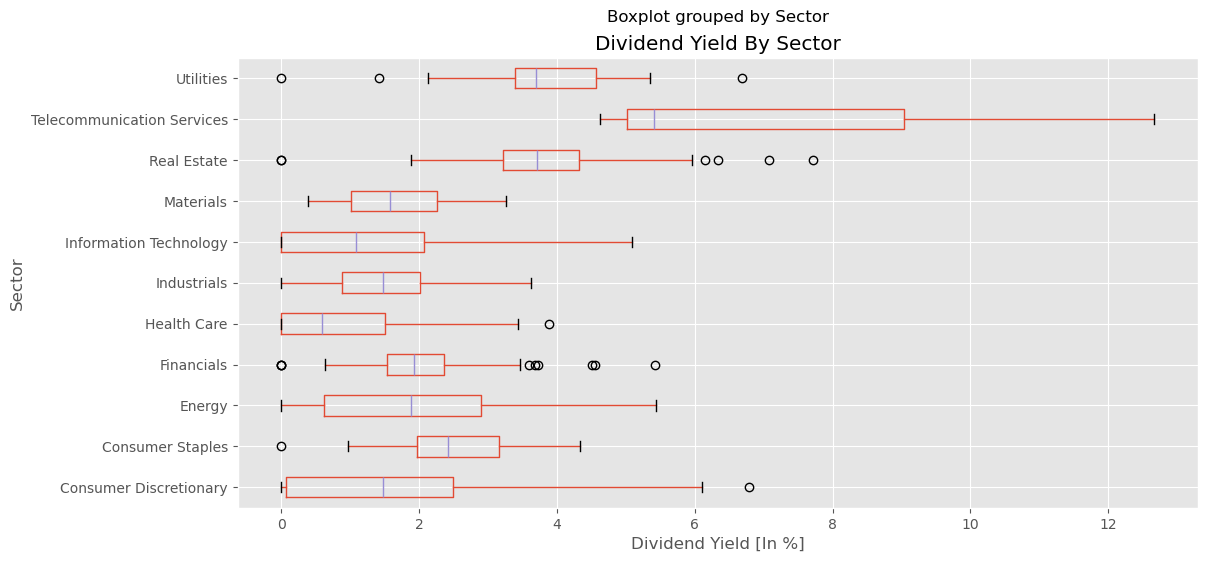

In [26]:
#Visualization 5: 

fundamentals_df.boxplot(column = "Dividend Yield", by = "Sector", vert = False, figsize = (12, 6))
plt.title("Dividend Yield By Sector")
plt.xlabel("Dividend Yield [In %]")
plt.ylabel("Sector")
plt.show()

### Visualization 4 and 5 Analysis:

Visualization 4 is a box and whisker plot that represents the wide variation of P/E ratios by sector, which indicates different valuation levels. This provides investors with insights on whether or not different sectors of the S&P500 have fairly valued stocks as a whole. From analyzing this visualization, we can analyze and determine that the majority of sectors within the S&P500 have a median value around 20 - 25. Sectors with lower median P/E ratios might be more attractive to value-oriented investors, while those with higher median P/E ratios could be perceived as having higher growth expectations. The presence of outliers, which are represented by the circle, in many of the sectors indicate an oppertunity for investors to capitalize on stocks that differ from the sector norm. For constructing a diversified portfolio, an investor might look to allocate investments across sectors with varying P/E ratios to balance growth and risk.

Visualization 5 is another box and whisker plot that shows the variation in dividend yields across different sectors. Sectors like Telecommunications, Utilities, and Real Esate have higher median dividend yields, which could be more attractive to income-focused investors seeking regular cash flows and potentially lower risk profiles. Another potential insight that investors can glean from this visualization is that the technology and health care sectors tend to have lower dividend yields, which may indicate a reinvestment of earnings into the company for growth rather than distribution to shareholders. This could most certainly appeal to growth-oriented investors. 


Key takeaway from both visualzations: An investor looking to construct a diversified portfolio might combine high-dividend-yielding, value oriented stocks from stable sectors like telecommunication services with lower-dividend-yielding, growth oriented stocks from sectors like information technology, aiming for a mix of income and growth. 

# Modeling - Project 2

### Extra Pre-Processing Step
Before we begin modeling, we will use the time series data and two features from our fundamentals_df dataset to feature engeineer a crucial feature referenced as "Beta". This feature represents the volatility in a stock's returns in comparison/relation to the S&P 500 index as a whole. It essentially tells investors how much the price of a given stock in the S&P moves in relation to the movement of the broader S&P 500 index as a whole. A beta above 1 for any given stock tells investors that the stock tends to have a higher voliality than the overall S&P 500 index as a whole and a beta below 1 tells investors that the stock tends to have a lower volaitlity than the overall S&P 500 index as a whole. A value of around 1 tells investors that the stock tends to move intandem with the overall market. 

Higher growth stocks tend to be more volatile than the overall market, as there are large swings in price movements due to the fact that the company is still in it's "growing" phases, which cast uncertainty among investors. Usually stocks with a lower beta (below 1) tend to be blue-chip, valued stocks as their foundations are already set as they are well-known, established consitutents in their respective industrys.

We will also add another very important feature called "Revenue Growth". This feature represents the Fiscal Fourth Quarter (ending on December 31st of every year) Year Over Year (YOY) Revenue Growth in percentage form represented in decimal format (e.g 1.5 represents 150% and -1.5 represents -150%). Revenue growth is a primary indicator of a company's performance. It shows how effectively a company is expanding its operations and market reach. A positive revenue growth rate is often associated with increased market share and improved competitive positioning. It's also metric of high interest to investors seeking to capitalize on high growth opportunites. Investors often look for companies with strong and consistent revenue growth as potential investment opportunities because it suggests that the company is growing and possibly generating more profit. This is also crucial for investors in their diversiciation strategy as revenue growth can provide a quick snapshot of which sectors are expanding rapidly and which are not. This can be particularly useful in a diversified portfolio where investors want to understand where the growth is concentrated.

In [27]:
#Dropping the columns we used before to make our "Magnificent 7" monthly returns graphs
final_time_df.drop(columns = ["AAPL_Monthly_Returns", "TSLA_Monthly_Returns", "META_Monthly_Returns", "MSFT_Monthly_Returns", 
                              "AMZN_Monthly_Returns", "GOOGL_Monthly_Returns", "NVDA_Monthly_Returns"], inplace = True)

In [28]:
#Here we calculate a percentage that represents the overall S&P 500 index return for every monhtly time period in which we recorded the 
#adjusted closing price on a monthly basis for each S&P 500 comapny. To do this, we first sort the "Symbol" feature values in our fundamentals_df
#in alphabetical order and set it as the index which will allow investors to align the "Symbol" feature values in fundamentals_df and their 
#corresponding weights (which represent the weight, in terms of market cap, of how much each company makes up in proportion to the total market 
#cap of the S&P 500 index) with the "Symbol" COLUMN values in final_time_df. We are able to do this because both dataframes now have their 
#respective symbol values in alphabetical order. This allows for each stock's unique computed weights from fundamentals_df to be applied to their
#respective monthly returns from final_time_df which tells investors how much contribution each individual company has in the overall movement/volatility
#in the S&P 500 index. We then sum these final calculations to obtain the overall S&P 500 index volatility. The computed variable "index_returns"
#will be used to calculate the "Beta" feature we are aiming to engineer for fundamentals_df



fundamentals_df.sort_values(by = "Symbol", ascending = True, inplace = True)
fundamentals_df.set_index("Symbol", inplace = True)

weights = fundamentals_df["Market Cap"] / fundamentals_df["Market Cap"].sum()
aligned_weights = weights.reindex(final_time_df.columns)

stock_returns = final_time_df.pct_change()

weighted_returns = stock_returns.mul(aligned_weights, axis = "columns")
index_returns = weighted_returns.sum(axis = 1)

index_returns.drop(index_returns.index[0], inplace = True)
index_returns


Date
2010-02-28   -0.036853
2010-03-31    0.024396
2010-04-30    0.052073
2010-05-31    0.022962
2010-06-30    -0.08531
                ...   
2022-03-31   -0.039011
2022-04-30    0.039342
2022-05-31   -0.066101
2022-06-30    -0.00164
2022-07-31   -0.059662
Length: 150, dtype: object

In [29]:
final_time_df.shape

(151, 503)

In [30]:
#Here we use dictionary mapping to map each stock's repsective ticker symbol in fundamentals_df to its corresponsing beta value calculated 
#from final_time_df. In final_time_df, we calculated to covariance of each stock's monthly returns with respect to the total S&P 500 index returns
#which tells us how much each stock's returns move in relation to the index. We then calculate the variance of the overall S&P 500 index. Finally,
#to obtain the beta value, we divide the covariance of each stock by the variance of the overall market. The resulting Beta value signifies to 
#investors how volatile a certain stock was, over a span of 12 years ranging 2010 - 2022, in relation to the overall S&P 500 index/market as a 
#whole during that timeframe. 


beta_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    stock_info = stock.info
    beta_info = stock_info.get("beta")
    beta_dict[ticker] = beta_info

fundamentals_df["Beta"] = fundamentals_df.index.map(beta_dict)
fundamentals_df["Beta"] = fundamentals_df.groupby("Sector")["Beta"].transform(lambda x: x.fillna(x.mean()))

fundamentals_df

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=bpobLzGGBS.
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARNC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARNC&crumb=bpobLzGGBS.
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=bpobLzGGBS.
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap        EBITDA  Price/Sales  Price/Book  \
Symbol                                                                        
A              49.23   21984606918.0  1.094000e+09     6.493563        4.56   
AAL            39.21   24594852352.0  5.761000e+09     0.580226        6.03   
AAP            78.81    8123611867.0  8.539410e+08     1.130106        2.51   
AAPL          131.12  809508034020.0  7.938600e+10     3.458609        5.66   
ABBV           60.05  181386347059.0  1.031000e+10     6.291571       26.14   
...              ...             ...           ...          ...         ...   
XYL            46.86   12915021000.0  7.220000e+08     2.726209        5.31   
YUM            62.85   27003303098.0  2.289000e+09     6.313636      212.08   
ZBH           108.17   24454698119.0  2.007400e+09     3.164895        2.39   
ZION           38.43   10670678640.0  0.000000e+00     3.794579        1.42   
ZTS            52.00   35991109776.0  1.734000e+09     9.280896       18.09   

                Net Income   Beta  
Symbol                             
A         709725972.756341  1.122  
AAL      1978721660.418107  1.569  
AAP       458680629.907233  1.197  
AAPL    48001765472.020615  1.276  
ABBV     5501116167.257651  0.564  
...                    ...    ...  
XYL        336481896.78246  1.102  
YUM        1440412104.9654  1.094  
ZBH      1907182810.111573  1.022  
ZION      547106378.702426  1.123  
ZTS       830447925.190882  0.848  

[505 rows x 14 columns]

In [31]:
print(fundamentals_df.isna().sum())

Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
Net Income        0
Beta              0
dtype: int64


In [32]:
#Reading in the CSV file containing our revenue growth metric and extracting only that column. We will then use dictionary mapping to map the 
#proper "Revenue Growth" values for each stock from the revenue_growth_df to the fundamentals_df

revenue_growth_df = pd.read_csv("/Users/zaid/Desktop/ALL JUPYTER NOTEBOOKS/ExtraSP500Info.csv")
revenue_growth_df.rename(columns = {"Revenuegrowth": "Revenue Growth"}, inplace = True)

Revenue_Growth_Dict = revenue_growth_df.set_index("Symbol")["Revenue Growth"].to_dict()
fundamentals_df["Revenue Growth"] = fundamentals_df.index.map(Revenue_Growth_Dict)

fundamentals_df

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap        EBITDA  Price/Sales  Price/Book  \
Symbol                                                                        
A              49.23   21984606918.0  1.094000e+09     6.493563        4.56   
AAL            39.21   24594852352.0  5.761000e+09     0.580226        6.03   
AAP            78.81    8123611867.0  8.539410e+08     1.130106        2.51   
AAPL          131.12  809508034020.0  7.938600e+10     3.458609        5.66   
ABBV           60.05  181386347059.0  1.031000e+10     6.291571       26.14   
...              ...             ...           ...          ...         ...   
XYL            46.86   12915021000.0  7.220000e+08     2.726209        5.31   
YUM            62.85   27003303098.0  2.289000e+09     6.313636      212.08   
ZBH           108.17   24454698119.0  2.007400e+09     3.164895        2.39   
ZION           38.43   10670678640.0  0.000000e+00     3.794579        1.42   
ZTS            52.00   35991109776.0  1.734000e+09     9.280896       18.09   

                Net Income   Beta  Revenue Growth  
Symbol                                             
A         709725972.756341  1.122          -0.087  
AAL      1978721660.418107  1.569          -0.010  
AAP       458680629.907233  1.197             NaN  
AAPL    48001765472.020615  1.276           0.021  
ABBV     5501116167.257651  0.564          -0.054  
...                    ...    ...             ...  
XYL        336481896.78246  1.102           0.406  
YUM        1440412104.9654  1.094           0.008  
ZBH      1907182810.111573  1.022           0.063  
ZION      547106378.702426  1.123          -0.119  
ZTS       830447925.190882  0.848           0.085  

[505 rows x 15 columns]

In [33]:
#Filling in the missing revenue growth and beta values for each stock that was not mapped in our fundamentals dataframe with the mean 
#beta value and revenue growth percentage for that stock's particular sector. This is the best general estimation we can give for missing beta 
#values and revenue growth percentages for a stock as these values of a stock leans towards being more indicative and in line with its
#corresponsing sectors' mean value. 

fundamentals_df["Revenue Growth"] = fundamentals_df.groupby("Sector")["Revenue Growth"].transform(lambda x: x.fillna(x.mean()))
print(fundamentals_df.isna().sum())

Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
Net Income        0
Beta              0
Revenue Growth    0
dtype: int64


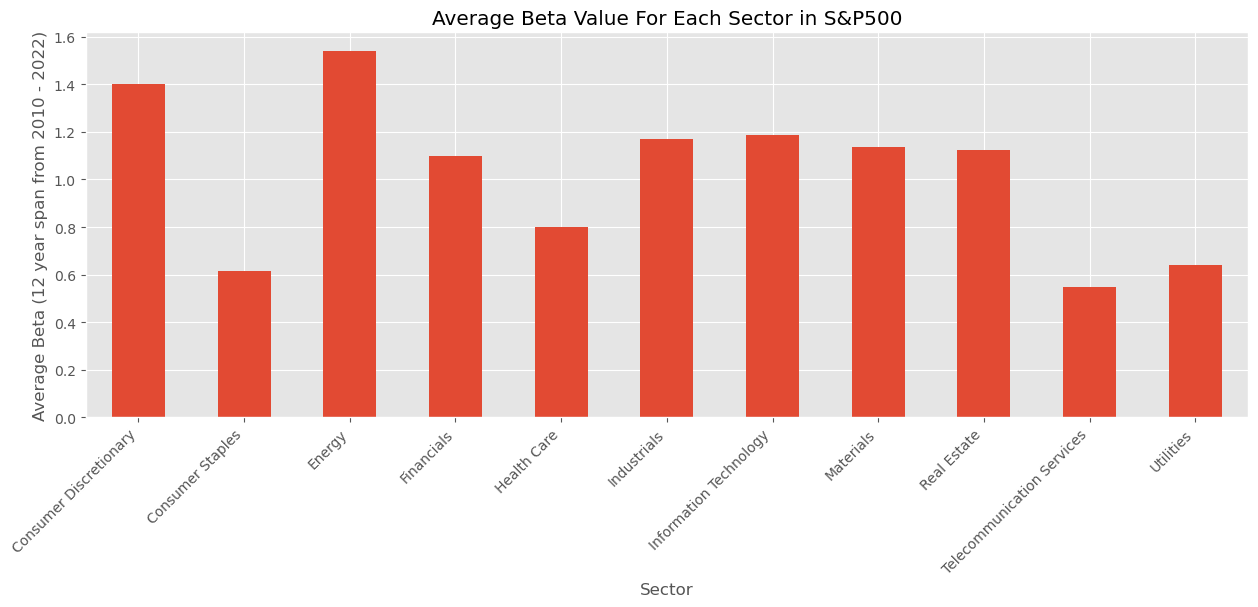

In [34]:
#Beta Value Visualization

sector_beta = fundamentals_df.groupby("Sector")["Beta"].mean()
sector_beta.plot(kind = "bar")

plt.title("Average Beta Value For Each Sector in S&P500")
plt.ylabel("Average Beta (12 year span from 2010 - 2022)")
plt.xlabel("Sector")
plt.xticks(rotation = 45, ha = "right")

plt.show()

### Beta Value Chart Analysis:

Arguably, one of the most important datapoints for investors to crtically analyze is the Beta value of a stock over a certain time period. Here we are building a barchart to show the average beta value over a 12 year span ranging from 2010 - 2022 for each individual sector. Here we can see that the Energy sector tends to be the most volatile sector with a beta value of around 1.75 while the Consumer Staples sector seems to be the least with around a beta value of 0.60. This makes economic sense, as the volatile energy market is heavily influenced by the constantly changing prices of commodities such as oil and natural gas. The energy sector is also more prone and senssitive to economic cycles and geopolitical events, as worldwide events may signficnalty hinder the supply and demand for crucial commodities alongside higher energy consumtion during economic growth periods and vice versa. Consumer staples, on the other hand, refer to the essential goods and services needed by consumers. Because of this, regardless of economic conditions or geopolitical events, these sectors will most likely remain resilient to any market conditions as consumer spending in these sectors is likely to remain in tandem with supply and demand while the opposite may happen in the Energy sector. 

Key insights for investors include the following: An investor looking for growth and willing to accept higher risk might be interested in sectors with higher beta values, such as Energy or Financials, anticipating greater returns during market upswings. For more conservative investors, sectors such as Utilities and Consumer Staples have lower beta values, might be more attractive than sectors with higher beta values, as these lower beta sectors tend to be less volatile and yield potentially lower risks. These sectors may also perform well, especially in a bear market or during times of economic uncertainty, as they tend to be more stable and provide consistent dividends. 

Another crucial take for investors is the fact that this chart can provide crucial insights into portfolio diversification and why its constantly emphasized in the world of investing. By investing in a mix of sectors with varying beta values, an investor can balance potential risk and return. For example, holding both high-beta and low-beta sector stocks could help stabilize portfolio value across different market conditions. During economic booms, an investor that utilizes this strategy can reap the rewards from increased growth in higher beta valued stocks. In contrast, during economic slowdowns, investors can signficantly hedge against losses incurred from higher beta valued stocks by reaping the consistent stability and income resulting from the ownership of lower beta valued stocks. High-beta sectors may also be more affected by sector-specific risks, and this visualization can help investors identify which sectors they need to monitor more closely for news that could affect stock prices.

Knowledge of sector betas can be useful for tactical asset allocation, such as market timing and sector rotation strategies. Investors might overweight sectors with higher beta in a bullish market for greater gains, while favoring lower-beta sectors in a bearish market to protect their portfolios.

### Unsupervised Learning (Clustering):

Here we perform Unsupervised Learning (Hierarchical Clustering) as an extra, final pre-processing step to better understand the natural hierarchical relationships between our independent variables. Before using our domain knowledge to pre-define and assign observations (specific stocks) to one of our six different target categories, (High Growth, Low Growth, Volatile, Dividend Paying, Undervalued, and No Insights) by assigning each of our observations into one of K clusters, we can get an initial understanding of the natural similarities of certain features' values for our observations and by assigning them in hierarchical groupings which can confirm whatever pre-defined domain knowledge we may have when determing whether a stock falls into one of our target categories. For example, if we have the hypothesis that a high P/E ratio alongside a high EPS could signify that a stock is of "High Growth", we could perform hierarchical clustering to analyze if one or more of our K clusters contain observations with a high P/E ratio and high EPS. We could then make the conclusion that a stock with a high P/E ratio and high EPS would most likely be of "High Growth" because of the natural hierarchical similarities in these features' values.


If we can identify K clusters that contain observations in which the feature values, we believe pertain to a certain category, are higher than the mean value in those K clusters, we will pre-define a function that checks for those said conditions for each observation to assign the said observation to a certain category within our target feature. We will also use condtions based on the return rates of stocks which will be based on our time series dataset (final_time_df) to pre-define our functions. However, since those observations contain stock closing price values that are based on a monthly basis, it would not practical to cluster them. So we will instead use our domain knowledge, based on certain return rates, to determine certain conditions for our pre-defined functions based on the crtieria required for certain categories within our target feature. 

Here are the steps we will take before we feature engineer our target feature:
1. If features are correlated and leading to grouping of observations into a given cluster. 
2. Does a correlation of said features mean the stock represents a unique characteristic (Preferable my target variable labels)
3. If a correlation does represent a unique characterictic, what are the exact thresholds for each feature to classifcy it into the unique characteristic 


In [35]:
#Here we one hot encode our "Sector" feature and combine those dummy columns with our main fundamentals dataset. We then drop the "Sector"
#categorical feature and "Name" feature as it is irrelavent for our analysis. 

sector_dummies = pd.get_dummies(fundamentals_df, columns = ["Sector"], drop_first = True, prefix = ["dummy_Sector"])
fundamentals_df_with_dummies = pd.concat([fundamentals_df, sector_dummies], axis = 1)
fundamentals_df_with_dummies.drop(columns = ["Sector", "Name"], axis = 1, inplace = True)

fundamentals_df_with_dummies

Price  Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                        
A        65.05           27.45        0.875698            2.10        75.00   
AAL      48.60            9.92        0.778210            3.91        59.08   
AAP     109.63           19.54        0.218321            6.19       169.55   
AAPL    155.15           16.86        1.579541            9.20       180.10   
ABBV    108.48           19.41        2.499560            3.29       125.86   
...        ...             ...             ...             ...          ...   
XYL      70.24           30.94        1.170079            1.83        76.81   
YUM      76.30           27.25        1.797080            4.07        86.93   
ZBH     115.53           14.32        0.794834            9.01       133.49   
ZION     50.71           17.73        1.480933            2.60        55.61   
ZTS      71.51           32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap        EBITDA  Price/Sales  Price/Book  \
Symbol                                                                        
A              49.23   21984606918.0  1.094000e+09     6.493563        4.56   
AAL            39.21   24594852352.0  5.761000e+09     0.580226        6.03   
AAP            78.81    8123611867.0  8.539410e+08     1.130106        2.51   
AAPL          131.12  809508034020.0  7.938600e+10     3.458609        5.66   
ABBV           60.05  181386347059.0  1.031000e+10     6.291571       26.14   
...              ...             ...           ...          ...         ...   
XYL            46.86   12915021000.0  7.220000e+08     2.726209        5.31   
YUM            62.85   27003303098.0  2.289000e+09     6.313636      212.08   
ZBH           108.17   24454698119.0  2.007400e+09     3.164895        2.39   
ZION           38.43   10670678640.0  0.000000e+00     3.794579        1.42   
ZTS            52.00   35991109776.0  1.734000e+09     9.280896       18.09   

        ...  dummy_Sector_Consumer Staples  dummy_Sector_Energy  \
Symbol  ...                                                       
A       ...                          False                False   
AAL     ...                          False                False   
AAP     ...                          False                False   
AAPL    ...                          False                False   
ABBV    ...                          False                False   
...     ...                            ...                  ...   
XYL     ...                          False                False   
YUM     ...                          False                False   
ZBH     ...                          False                False   
ZION    ...                          False                False   
ZTS     ...                          False                False   

        dummy_Sector_Financials  dummy_Sector_Health Care  \
Symbol                                                      
A                         False                      True   
AAL                       False                     False   
AAP                       False                     False   
AAPL                      False                     False   
ABBV                      False                      True   
...                         ...                       ...   
XYL                       False                     False   
YUM                       False                     False   
ZBH                       False                      True   
ZION                       True                     False   
ZTS                       False                      True   

        dummy_Sector_Industrials  dummy_Sector_Information Technology  \
Symbol                                                                  
A                          False                                False   
AAL                         True                                Fals

In [36]:
#Deleting duplicate columns as there are duplicate columns present as a result of pd.concat()

fundamentals_df_with_dummies = fundamentals_df_with_dummies.T.drop_duplicates().T
fundamentals_df_with_dummies.columns

Index(['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share',
       '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales',
       'Price/Book', 'Net Income', 'Beta', 'Revenue Growth',
       'dummy_Sector_Consumer Staples', 'dummy_Sector_Energy',
       'dummy_Sector_Financials', 'dummy_Sector_Health Care',
       'dummy_Sector_Industrials', 'dummy_Sector_Information Technology',
       'dummy_Sector_Materials', 'dummy_Sector_Real Estate',
       'dummy_Sector_Telecommunication Services', 'dummy_Sector_Utilities'],
      dtype='object')

In [37]:
#Scaling the entire fundamentals dataset by standardizing it, ensuring each features' values have a mean of 0 and standard deviation of 1. 
#This is crucial before performing clustering, as we use a distance metric between observations' features' values when clustering observations into 
#K clusters to determine the similiarties between observations' features' values. If there are outliers present in the dataset, (which there are) 
#they will dominate the distance calculations, thusmaking the clusters we obtain unreliable and misleading. We then build a new dataframe with
#the scaled values which will be used to initially cluster our data points. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(fundamentals_df_with_dummies)

scaled_fundamentals_df = pd.DataFrame(scaled, columns = fundamentals_df_with_dummies.columns, index = fundamentals_df_with_dummies.index)
scaled_fundamentals_df


Price  Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                          
A      -0.288773        0.065531       -0.664362       -0.290978    -0.306838   
AAL    -0.411265       -0.360633       -0.727844        0.027494    -0.409410   
AAP     0.043184       -0.126766       -1.092428        0.428662     0.302343   
AAPL    0.382141       -0.191918       -0.206039        0.958274     0.370316   
ABBV    0.034621       -0.129926        0.393052       -0.081596     0.020850   
...          ...             ...             ...             ...          ...   
XYL    -0.250127        0.150374       -0.472669       -0.338484    -0.295177   
YUM    -0.205002        0.060668       -0.064384        0.055646    -0.229974   
ZBH     0.087117       -0.253667       -0.717019        0.924844     0.070010   
ZION   -0.395553       -0.170768       -0.270250       -0.203002    -0.431767   
ZTS    -0.240670        0.195592       -0.790251       -0.370156    -0.273786   

        52 Week High  Market Cap     EBITDA  Price/Sales  Price/Book  ...  \
Symbol                                                                ...   
A          -0.324809   -0.302963  -0.365293     0.738239   -0.109353  ...   
AAL        -0.419677   -0.273948   0.317639    -0.972458   -0.092812  ...   
AAP        -0.044751   -0.457041  -0.400421    -0.813381   -0.132421  ...   
AAPL        0.450512    8.451094  11.091345    -0.139757   -0.096975  ...   
ABBV       -0.222367    1.468936   0.983304     0.679804    0.133477  ...   
...              ...         ...        ...          ...         ...  ...   
XYL        -0.347248   -0.403780  -0.419729    -0.351636   -0.100914  ...   
YUM        -0.195858   -0.247175  -0.190426     0.686187    2.225778  ...   
ZBH         0.233225   -0.275505  -0.231633    -0.224727   -0.133771  ...   
ZION       -0.427062   -0.428728  -0.525381    -0.042563   -0.144686  ...   
ZTS        -0.298584   -0.147268  -0.271641     1.544600    0.042894  ...   

        dummy_Sector_Consumer Staples  dummy_Sector_Energy  \
Symbol                                                       
A                           -0.268676            -0.260102   
AAL                         -0.268676            -0.260102   
AAP                         -0.268676            -0.260102   
AAPL                        -0.268676            -0.260102   
ABBV                        -0.268676            -0.260102   
...                               ...                  ...   
XYL                         -0.268676            -0.260102   
YUM                         -0.268676            -0.260102   
ZBH                         -0.268676            -0.260102   
ZION                        -0.268676            -0.260102   
ZTS                         -0.268676            -0.260102   

        dummy_Sector_Financials  dummy_Sector_Health Care  \
Symbol                                                      
A                     -0.394470                  2.697904   
AAL                   -0.394470                 -0.370658   
AAP                   -0.394470                 -0.370658   
AAPL                  -0.394470                 -0.370658   
ABBV                  -0.394470                  2.697904   
...                         ...                       ...   
XYL                   -0.394470                 -0.370658   
YUM                   -0.394470                 -0.370658   
ZBH                   -0.394470                  2.697904   
ZION                   2.535048                 -0.370658   
ZTS                   -0.394470                  2.697904   

        dummy_Sector_Industrials  dummy_Sector_Information Technology  \
Symbol                                                                  
A                      -0.391111                            -0.401148   
AAL                     2.556817                            -0.401148   
AAP                    -0.391111                            -0

#### K Clusters determination:

Here we build a dendrogram, which serves as a visual representation of the hierarchical clustering process, illustrating the order and distance at which observations merge into clusters. This visual tool is absolutely critical for determining the optimal number of K clusters for the dataset. To determine the adequate number of K clusters, we examine the dendrogram to understand the hierarchy and similarity of feature values among observations, typically using the Euclidean distance as a measure. The clustering process involves a linkage criterion, such as Ward’s method among many others, which minimizes the total within-cluster variance. At each step, the two clusters that are most similar based on that criterion are merged, continuing until all observations belong to a single cluster. However, having a single cluster encompassing all observations is not practical for meaningful segmentation. Instead, we identify the number of clusters by looking for the longest uninterrupted vertical lines in the dendrogram, which suggest a significant separation between distinct clusters. The number of these significant vertical gaps before a merge indicates a natural grouping in the data, guiding us to set K for our actual clustering model. To precisely identify the number of clusters, we can draw a horizontal line at a height where it crosses the longest vertical lines (i.e., the largest distance without intersecting a horizontal merge line). The number of vertical lines intersected by this horizontal line represents the number of clusters that would be formed if we cut the dendrogram at that height.

#### Building our model to perform Hierchical Clustering:

For our distance metric between data points, we use the Euclidean Distance metric to determine the distance between observations' features' values. This is crucial as it quantifies how similar or dissimilar two data points or entities are. It defines the "space" in which the data exists and how distances within that space are calculated. Then we use the ward linkage method/criterion to determine how smaller clusters should be merged into larger clusters all the way up the hierachical structure. Once distances between all pairs of data points or existing clusters are calculated, the linkage criterion determines how to use these distances to merge the entities into larger clusters. It essentially defines what the "distance" between clusters should be considered as, based on the distances between individual points in those clusters.

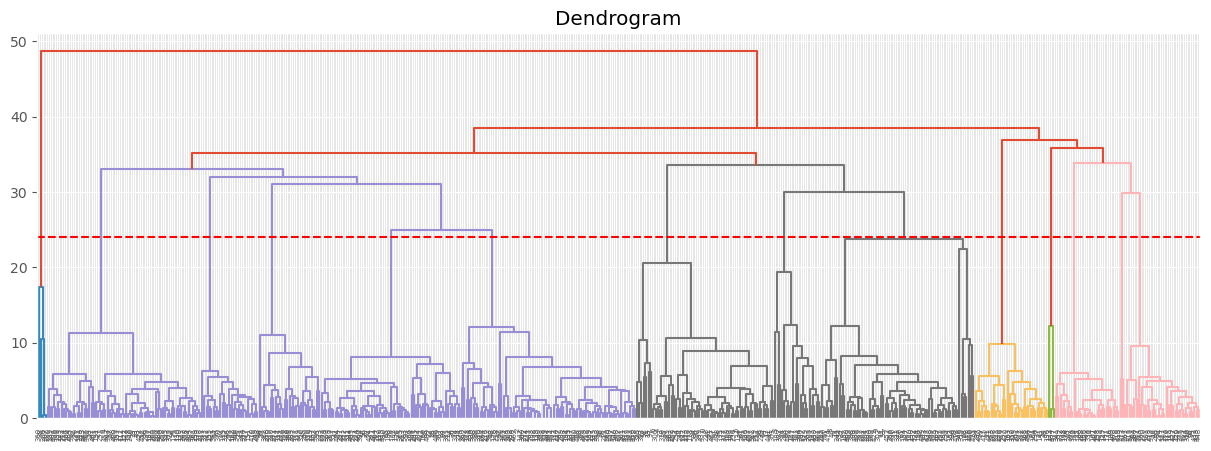

In [38]:
#Building the Dendrogram. Here we can see at around y = 24, we can obtain the best line that crosses through the longest vertical lines for each
#hierchial structure for every observation. In total, we count 15 meaningful clusters to cluster all of our observations into. 

import scipy.cluster.hierarchy as shc 

plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(scaled_fundamentals_df, method = "ward")) 
plt.axhline(y = 24, color = "r", linestyle = "--")

In [39]:
#Building the model to perform Hierarchical Clustering. We use AgglomerativeClustering, which is a type of Hierachical Clustering algorithm from
#the Sci-kit learn machine learning library. 

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 15, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(scaled_fundamentals_df)
clusters

array([ 1,  8,  5,  2,  1,  1,  1,  6,  6,  6, 11,  6,  6,  6, 13, 13, 13,
        1, 14,  1, 14,  7, 14, 14,  6,  9,  1,  8, 14,  8,  1,  6,  6,  8,
       14,  1, 14,  7,  3, 10,  6,  1, 14,  8, 10, 10,  9,  6,  5,  7,  8,
        6,  7,  6,  9, 13, 14,  8,  1,  8,  2,  1, 14,  5,  1, 14, 11,  5,
        0,  1, 14,  1,  9,  1,  2,  1,  5,  7, 14,  6, 11,  1,  8, 14,  7,
       14,  5,  7,  5,  6,  1,  1,  9, 14, 11, 10,  8,  1,  1, 14, 11, 11,
       14,  2, 14,  5,  8, 13,  1, 13, 14, 10,  8,  1, 10, 11, 11, 11,  0,
        2,  6,  8,  8,  4,  6,  6, 11,  2, 10, 13,  8,  8, 14,  5,  1,  5,
        1,  2,  5,  5,  5,  7,  5,  8, 11,  7,  5, 13, 13,  1, 10,  9,  6,
        6,  6,  9, 13,  8, 13, 11,  9,  8,  0,  7,  7, 10, 13,  1,  7, 14,
        8, 13,  1,  1, 13,  8,  5,  7,  5,  8,  2,  8,  9,  8, 13,  6,  6,
        6, 14,  5,  6,  8,  8,  9,  5,  5,  7, 10,  8,  8,  8,  7,  1, 11,
        6,  2,  3,  3,  5,  6,  5,  5, 14,  5,  8, 10,  5, 14,  5,  1,  7,
        7,  2, 10, 14,  8

In [40]:
#Creating a new column called "Cluster Labels" which assigns each observation to its designated cluster 

fundamentals_df["Cluster_Labels"] = clusters
fundamentals_df

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap        EBITDA  Price/Sales  Price/Book  \
Symbol                                                                        
A              49.23   21984606918.0  1.094000e+09     6.493563        4.56   
AAL            39.21   24594852352.0  5.761000e+09     0.580226        6.03   
AAP            78.81    8123611867.0  8.539410e+08     1.130106        2.51   
AAPL          131.12  809508034020.0  7.938600e+10     3.458609        5.66   
ABBV           60.05  181386347059.0  1.031000e+10     6.291571       26.14   
...              ...             ...           ...          ...         ...   
XYL            46.86   12915021000.0  7.220000e+08     2.726209        5.31   
YUM            62.85   27003303098.0  2.289000e+09     6.313636      212.08   
ZBH           108.17   24454698119.0  2.007400e+09     3.164895        2.39   
ZION           38.43   10670678640.0  0.000000e+00     3.794579        1.42   
ZTS            52.00   35991109776.0  1.734000e+09     9.280896       18.09   

                Net Income   Beta  Revenue Growth  Cluster_Labels  
Symbol                                                             
A         709725972.756341  1.122          -0.087               1  
AAL      1978721660.418107  1.569          -0.010               8  
AAP       458680629.907233  1.197           0.060               5  
AAPL    48001765472.020615  1.276           0.021               2  
ABBV     5501116167.257651  0.564          -0.054               1  
...                    ...    ...             ...             ...  
XYL        336481896.78246  1.102           0.406               8  
YUM        1440412104.9654  1.094           0.008               5  
ZBH      1907182810.111573  1.022           0.063               1  
ZION      547106378.702426  1.123          -0.119              14  
ZTS       830447925.190882  0.848           0.085               1  

[505 rows x 16 columns]

In [41]:
#Obtaining the mean values of the features (within each cluster) we will be using to identify clusters that match our pre-defined conditions
#(domain knowledge) according to the critiera (domain knowledge) required for the given category within our target variable. Essentially, we are
#identifying the cluster/s that represent/s meaningful similarities using these features. 

cluster_means = fundamentals_df.groupby("Cluster_Labels")[["Beta", "Earnings/Share", "Price/Earnings", "Market Cap", "Dividend Yield", 
                                                           "EBITDA", "Price/Sales", "Price/Book", "Net Income", "Revenue Growth"]].mean()
cluster_means


Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
0               1.307916        0.208571      257.477143   60672966865.428574   
1               0.824639        6.602667       24.375333   52641257221.583336   
2               1.067602        4.878000       18.886500  280934658487.150024   
3               1.167306       23.340000       98.047500      560012586967.75   
4               0.547500        4.426667       11.190000  151014247968.333344   
5               1.424592        2.632763       20.419474   20347514750.526318   
6               1.192768        2.351667       27.975167   38103912418.383331   
7               1.122036        2.446563       16.916875       18929488945.25   
8               1.171875        5.344030       21.494328   35993151836.328362   
9               1.136545        4.932000       20.542400   27692010366.040001   
10              1.577356       -2.090370       16.198889   24613288784.962963   
11              0.614305        3.634545       21.951212   58590779281.181816   
12              1.020111        4.230000       17.565000        83721357322.5   
13              0.639481        2.014643       16.846429   21844022802.535713   
14              1.081739        4.338033       17.026885   33632497956.770493   

                Dividend Yield        EBITDA  Price/Sales   Price/Book  \
Cluster_Labels                                                           
0                     1.114707  2.054051e+09    11.121386    21.764286   
1                     0.891617  3.754100e+09     4.412497    10.793333   
2                     2.276130  2.034212e+10     3.788341    14.677000   
3                     0.000000  2.196662e+10     6.669491    10.142500   
4                     7.567797  3.365833e+10     1.511056     3.716667   
5                     1.546728  2.031392e+09     2.112153     8.339079   
6                     1.188209  2.356971e+09     5.747902    11.548833   
7                     4.016469  1.393953e+09     9.799353     3.347500   
8                     1.479392  3.063030e+09     2.573401     9.188060   
9                     1.737976  2.284348e+09     2.876093     4.788800   
10                    1.816029  2.404934e+09     3.653368     2.453333   
11                    2.375964  5.094713e+09     2.873089    18.216970   
12                    4.607734  7.065500e+09     2.231783  1361.040000   
13                    3.759224  3.485105e+09     2.561081     2.106786   
14                    2.066848  4.965999e+08     3.410814     7.337869   

                        Net Income  Revenue Growth  
Cluster_Labels                                      
0                    4897095.85804        0.364910  
1                 2044062394.09079        0.044751  
2               14789886618.102314       -0.004946  
3                9428579033.492857        0.117250  
4               20958534006.169815        0.009500  
5                 898940163.696296        0.068847  
6                 993208994.486773        0.049731  
7                 607054228.714739        0.088848  
8                1526158935.057899        0.052288  
9                1252653918.178305       -0.046050  
10               -826416670.834389       -0.117133  
11               2835254567.829942        0.014448  
12               4004306571.996038        0.085000  
13                806902200.681542       -0.058444  
14               1440745091.719912        0.032207

In [42]:
#Determining which clusters contain "High Growth" criteria based on conditions regarding the "Price/Earnings", "Earnings/Share", "Revenue Growth", 
#and "Net Income" features.

high_growth_clusters = cluster_means[(cluster_means["Price/Earnings"] > fundamentals_df["Price/Earnings"].mean()) & 
                                   (cluster_means["Earnings/Share"] > fundamentals_df["Earnings/Share"].mean()) & 
                                   (cluster_means["Revenue Growth"] > fundamentals_df["Revenue Growth"].mean()) & 
                                   (cluster_means["Net Income"] > fundamentals_df["Net Income"].mean())]
high_growth_clusters

Beta  Earnings/Share  Price/Earnings       Market Cap  \
Cluster_Labels                                                              
3               1.167306           23.34         98.0475  560012586967.75   

                Dividend Yield        EBITDA  Price/Sales  Price/Book  \
Cluster_Labels                                                          
3                          0.0  2.196662e+10     6.669491     10.1425   

                       Net Income  Revenue Growth  
Cluster_Labels                                     
3               9428579033.492857         0.11725

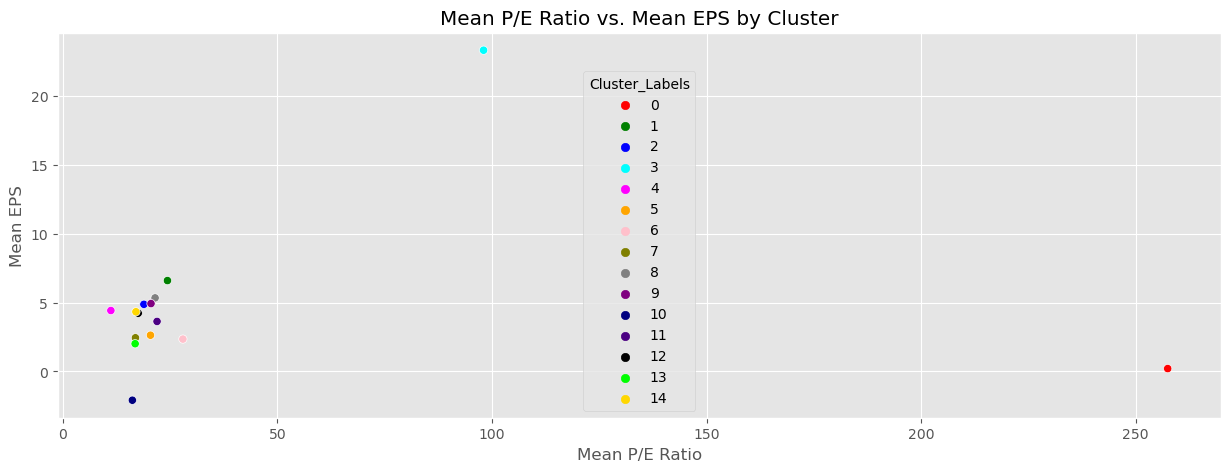

In [43]:
#Building a scatterplot that represents the average "Price/Earnings" and "Earnings/Share" values for each cluster. 


colors = {0: "red", 1: "green", 2: "blue", 3: "cyan", 4: "magenta", 5: "orange", 6: "pink", 7: "olive", 8: "gray", 9: "purple", 10: "navy", 
          11: "indigo", 12: "black", 13: "lime", 14: "gold"}


sns.scatterplot(data = cluster_means, x = "Price/Earnings", y = "Earnings/Share", hue = cluster_means.index, palette = colors, legend = "full")

plt.xlabel("Mean P/E Ratio")
plt.ylabel("Mean EPS")
plt.title("Mean P/E Ratio vs. Mean EPS by Cluster")

plt.show()


#### High Growth Cluster Analysis:
Here we can see that Cluster 3 (Cyan) appears to match our criteria. If we build a 2 dimensional scatterplot to just analyze the mean of two crucial features within the criteria for a Growth Stock, we can see that Cluster 3 does indeed appear to have a higher average P/E Ratio and EPS value than the market average P/E Ratios and EPS values. Furthermore, the average Revenue Growth and Net Income values for Cluster 4 are higher than the market average Revenue Growth and Net Income. This enables us to assert the fact that our pre-defined conditions strongly match the criteria for a "High Growth" stock, which makes sense because stocks that are of "High Growth" tend to have P/E Ratios, EPS values, Net Income values, and Revenue Growth percentages higher than the market average or their respective sectors' average. However, these stocks do not tend to pay dividends, as they continually reinvest their earnings to spur their continious growth.

In [44]:
#Determining which clusters contain "Dividend Paying" criteria based on conditions regarding the "Dividend Yield", and "Market Cap" features.

dividends_clusters = cluster_means[(cluster_means["Dividend Yield"] > fundamentals_df["Dividend Yield"].mean()) & 
                                                (cluster_means["Market Cap"] > fundamentals_df["Market Cap"].mean())]
dividends_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
2               1.067602        4.878000       18.886500  280934658487.150024   
4               0.547500        4.426667       11.190000  151014247968.333344   
11              0.614305        3.634545       21.951212   58590779281.181816   
12              1.020111        4.230000       17.565000        83721357322.5   

                Dividend Yield        EBITDA  Price/Sales   Price/Book  \
Cluster_Labels                                                           
2                     2.276130  2.034212e+10     3.788341    14.677000   
4                     7.567797  3.365833e+10     1.511056     3.716667   
11                    2.375964  5.094713e+09     2.873089    18.216970   
12                    4.607734  7.065500e+09     2.231783  1361.040000   

                        Net Income  Revenue Growth  
Cluster_Labels                                      
2               14789886618.102314       -0.004946  
4               20958534006.169815        0.009500  
11               2835254567.829942        0.014448  
12               4004306571.996038        0.085000

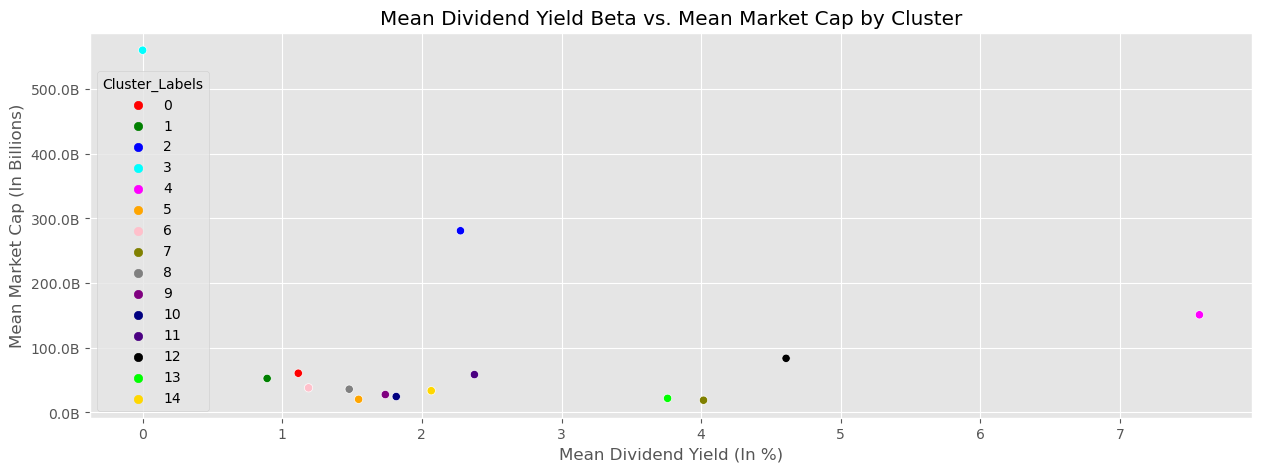

In [45]:
#Building a scatterplot that represents the average Dividend Yield in % and Market Cap values for each cluster 

sns.scatterplot(data = cluster_means, x = "Dividend Yield", y = "Market Cap", hue = cluster_means.index, palette = colors, legend = "full")

plt.gca().yaxis.set_major_formatter(formatterB)
plt.xlabel("Mean Dividend Yield (In %)")
plt.ylabel("Mean Market Cap (In Billions)")
plt.title("Mean Dividend Yield Beta vs. Mean Market Cap by Cluster")
plt.show()

#### Dividend Paying Cluter Analysis:
Here we can see that Cluster 4 (Pink) appears to have the highest average Dividend Yield amongst all 15 clusters. Clusters 2 (Dark Blue), 4 (Dark Pink), 11 (Dark Purple), 12 (Black) do appear to have higher average dividend yields than the market average alongside modestly high average Market Caps. Although each of these 4 Clusters may not have the highest average Market Cap between all the clusters, though, they still have a higher average Market Cap than the overall market average Market Cap. This also aligns well with our criteria for a "Dividend Paying" stock, as stocks that tend to pay higher dividend amounts to investors consistent of a higher dividend yield alongside a larger Market Cap than the market average. However, the Market Cap for "Dividend Paying" stocks do not tend to be nearly as high as compared to growth stocks, as we can see from our "High Growth" Cluster 3 (Cyan). Therefore, we can estimate that our pre-defined conditions required to meet the criteria of a "Dividend Paying" stock are significant. 

In [46]:
#Determining which clusters contain "Undervalued" criteria based on conditions regarding the "Price/Earnings", and "Price/Book" features.

undervalued_clusters = cluster_means[(cluster_means["Price/Earnings"] < fundamentals_df["Price/Earnings"].mean()) &
                                     (cluster_means["Price/Book"] < fundamentals_df["Price/Book"].mean())]
undervalued_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
1               0.824639        6.602667       24.375333   52641257221.583336   
4               0.547500        4.426667       11.190000  151014247968.333344   
5               1.424592        2.632763       20.419474   20347514750.526318   
7               1.122036        2.446563       16.916875       18929488945.25   
8               1.171875        5.344030       21.494328   35993151836.328362   
9               1.136545        4.932000       20.542400   27692010366.040001   
10              1.577356       -2.090370       16.198889   24613288784.962963   
13              0.639481        2.014643       16.846429   21844022802.535713   
14              1.081739        4.338033       17.026885   33632497956.770493   

                Dividend Yield        EBITDA  Price/Sales  Price/Book  \
Cluster_Labels                                                          
1                     0.891617  3.754100e+09     4.412497   10.793333   
4                     7.567797  3.365833e+10     1.511056    3.716667   
5                     1.546728  2.031392e+09     2.112153    8.339079   
7                     4.016469  1.393953e+09     9.799353    3.347500   
8                     1.479392  3.063030e+09     2.573401    9.188060   
9                     1.737976  2.284348e+09     2.876093    4.788800   
10                    1.816029  2.404934e+09     3.653368    2.453333   
13                    3.759224  3.485105e+09     2.561081    2.106786   
14                    2.066848  4.965999e+08     3.410814    7.337869   

                        Net Income  Revenue Growth  
Cluster_Labels                                      
1                 2044062394.09079        0.044751  
4               20958534006.169815        0.009500  
5                 898940163.696296        0.068847  
7                 607054228.714739        0.088848  
8                1526158935.057899        0.052288  
9                1252653918.178305       -0.046050  
10               -826416670.834389       -0.117133  
13                806902200.681542       -0.058444  
14               1440745091.719912        0.032207

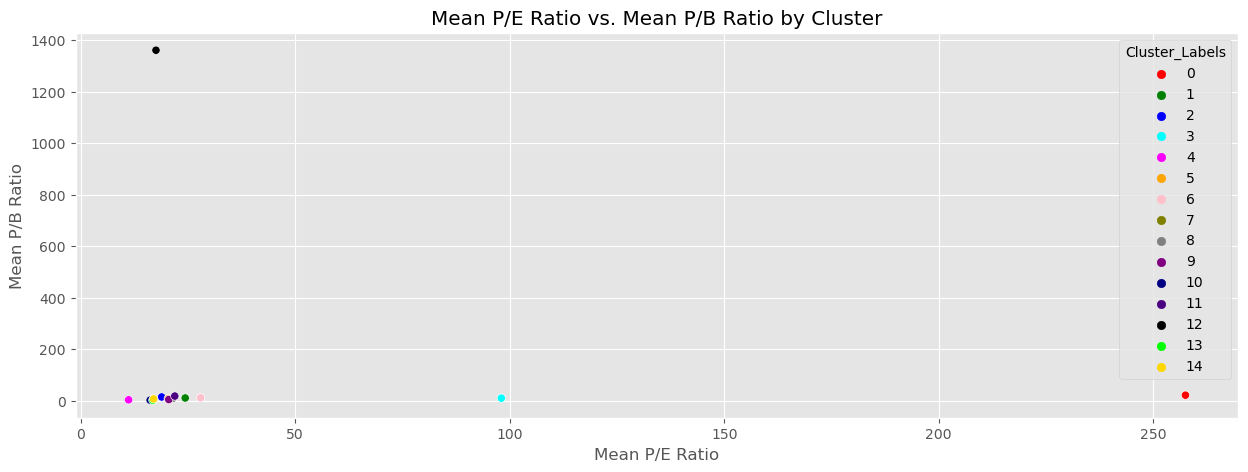

In [47]:
#Building a scatterplot that represents the average "Price/Earnings" and "Price/Book" values for each cluster 

sns.scatterplot(data = cluster_means, x = "Price/Earnings", y = "Price/Book", hue = cluster_means.index, palette = colors, legend = "full")

plt.title("Mean P/E Ratio vs. Mean P/B Ratio by Cluster")
plt.xlabel("Mean P/E Ratio")
plt.ylabel("Mean P/B Ratio")
plt.show()

#### Undervalued Cluster Analysis:
It appears that 11 out of our 15 total clusters appear to fit the pre-defined conditions we set to match the critiera for an "Undervalued" stock. In hindsight, this surprising insight may lead to the conclusion that most stocks are undervalued from an asset and price standpoint. However, this evaluation needs further investigation and analysis as these stocks may also have a slow or stagnant growth rate in overall returns (in %) and/or revenue over a long-time horizon, which signals that although the stock is undervalued relative to its price and assets, it could be due to the fact that the comapny does not any future long term growth prospects, indiciating that the stock may more of a "Dividend Paying" stock, as it derives it value from soley distributiing dividends to investors. 

In [48]:
#Determining which clusters contain "Volatile" criteria based on conditions regarding the "Beta" feature.

volatile_clusters = cluster_means[cluster_means["Beta"] > fundamentals_df["Beta"].mean()]
volatile_clusters

Beta  Earnings/Share  Price/Earnings          Market Cap  \
Cluster_Labels                                                                 
0               1.307916        0.208571      257.477143  60672966865.428574   
3               1.167306       23.340000       98.047500     560012586967.75   
5               1.424592        2.632763       20.419474  20347514750.526318   
6               1.192768        2.351667       27.975167  38103912418.383331   
7               1.122036        2.446563       16.916875      18929488945.25   
8               1.171875        5.344030       21.494328  35993151836.328362   
9               1.136545        4.932000       20.542400  27692010366.040001   
10              1.577356       -2.090370       16.198889  24613288784.962963   

                Dividend Yield        EBITDA  Price/Sales  Price/Book  \
Cluster_Labels                                                          
0                     1.114707  2.054051e+09    11.121386   21.764286   
3                     0.000000  2.196662e+10     6.669491   10.142500   
5                     1.546728  2.031392e+09     2.112153    8.339079   
6                     1.188209  2.356971e+09     5.747902   11.548833   
7                     4.016469  1.393953e+09     9.799353    3.347500   
8                     1.479392  3.063030e+09     2.573401    9.188060   
9                     1.737976  2.284348e+09     2.876093    4.788800   
10                    1.816029  2.404934e+09     3.653368    2.453333   

                       Net Income  Revenue Growth  
Cluster_Labels                                     
0                   4897095.85804        0.364910  
3               9428579033.492857        0.117250  
5                898940163.696296        0.068847  
6                993208994.486773        0.049731  
7                607054228.714739        0.088848  
8               1526158935.057899        0.052288  
9               1252653918.178305       -0.046050  
10              -826416670.834389       -0.117133

#### Volatile Cluster Analysis:
There appears to 9 out of 15 total Clusters with average Beta values higher than the market average Beta. Similar to our Unvervalued Cluster Analysis, the conclusion that most stocks are volatile needs to be critically examined even further. Although most stocks can indeed be more volatile than the market average, it's vital to understand that certain stocks that are more volatile than the market average also contain conditions that are of "High Growth" or "Undervalued". This is because there is a revoling uncertainty around stability of "Undervalued" stocks or future growth prospects of "High Growht" stocks, which can lead to investors making indecieve short term decisions, hence leading to higher volatility. Only if a given stock is more volatile than the market and does not meet the critiera for "High Growth" or "Undervalued" can it be considered as plainly "Volatile".  

In [49]:
#Determining which clusters contain "Low Growth" criteria based on conditions regarding the "Revenue Growth" feature.

low_growth_clusters = cluster_means[cluster_means["Revenue Growth"] < fundamentals_df["Revenue Growth"].mean()]
low_growth_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
2               1.067602        4.878000       18.886500  280934658487.150024   
4               0.547500        4.426667       11.190000  151014247968.333344   
9               1.136545        4.932000       20.542400   27692010366.040001   
10              1.577356       -2.090370       16.198889   24613288784.962963   
11              0.614305        3.634545       21.951212   58590779281.181816   
13              0.639481        2.014643       16.846429   21844022802.535713   
14              1.081739        4.338033       17.026885   33632497956.770493   

                Dividend Yield        EBITDA  Price/Sales  Price/Book  \
Cluster_Labels                                                          
2                     2.276130  2.034212e+10     3.788341   14.677000   
4                     7.567797  3.365833e+10     1.511056    3.716667   
9                     1.737976  2.284348e+09     2.876093    4.788800   
10                    1.816029  2.404934e+09     3.653368    2.453333   
11                    2.375964  5.094713e+09     2.873089   18.216970   
13                    3.759224  3.485105e+09     2.561081    2.106786   
14                    2.066848  4.965999e+08     3.410814    7.337869   

                        Net Income  Revenue Growth  
Cluster_Labels                                      
2               14789886618.102314       -0.004946  
4               20958534006.169815        0.009500  
9                1252653918.178305       -0.046050  
10               -826416670.834389       -0.117133  
11               2835254567.829942        0.014448  
13                806902200.681542       -0.058444  
14               1440745091.719912        0.032207

#### Low Growth Analysis:

While there appears to be 6 out of 15 clusters that have a lower average Revenue Growth rate below the market average, this does not immieidately signfiy that they are of "Low Growth". It could very well be that these stocks are experiencing the temporary pitfall of current broader economic conditions or are currently in the midst of developing their business model to generate more cash flow. In order to sucantly determine if a stock is of low growth, this condition (Revenue Growth below average market Revenue Growth) must be paired with another crucial factor which is the return rate of the stock over a specific time period. For a given stock, if the return rate over a specific time period alongside its revenue growth rate are lower than the market or their corresponding sectors' average, it could imply that it is of "Low Growth".

### Clustering Analysis and Feature Engineering criteria for target feature "Stock Insight":

Our clustering analysis has shown that particular conditions related to specific feature values tend to group observations into one or more clusters. This finding supports our hypothesis that setting certain pre-defined conditions for feature values can cause stocks to be grouped similarly, indicating that these feature values capture unique characteristics, which could establish the criteria for our target feature categories for a given stock.

With the insights gleaned from our Clustering Analysis alongside our domain knowledge, we now will feature engineer our target feature called "Stock Insight" which will again have five labels: High Growth, Dividend Paying, Undervalued, Volatile, and Low Growth. We will be using both of our datasets: fundamentals_df with the fundamentals for each stock and final_time_df, with the time series for each stock. Here are the conditions:

- If an observation (stock in fundamentals_df) has a higher Price/Earnings (fundamentals_df) AND Earnings/Share (fundamentals_df) AND Revenue Growth (fundamentals_df) AND Net Income (fundamentals_df) than its corresponding sector mean (fundamentals_df) OR return rate over a 3 year period (pct_change from final_time_df) AND beta greater than 1.2 (fundamentals_df): High Growth

- If an observation (stock in fundamentals_df) has a dividend yield (fundamentals_df) greater than the mean dividend yield (fundamentals_df) of all observations (all stocks in fundamentals_df) AND has a market cap (fundamenals_df) greater than its corresponding sector mean (fundamentals_df): Dividend Paying

- If an observation (stock in fundamentals_df) has a lower Price/Earnings (fundamentals_df) than its corresponding sector mean AND a higher 5 year return rate (pct_change from final_time_df) AND lower Price/Book (fundamentals_df) than its corresponding sector mean: Undervalued

- If an observation (stock in fundamentals_df) has a higher Beta (fundamentals_df) than the mean Beta (fundamentals_df) of all observations (all stocks in fundamentals_df): Volatile

- If an observation (stock in fundamentals_df) has a lower return rate over all periods (pct_change from final_time_df for all time periods in dataset for all stocks) than the mean return rate over all periods (pct_change from final_time_df for all time periods in dataset for all stocks) AND has a lower Revenue Growth (fundamentals_df) than its corresponding sector mean (fundamentals_df): Low Growth

- If an observation (stock in fundamentals_df) has a higher Price/Earnings (fundamentals_df) OR Price/Book (fundamentals_df) AND Price/Sales than its corresponding sector mean (fundamentals_df): Overvalued

- If an observation does not meat any of the defined criteria: Stable

In [50]:
#Calculating the necessary means and return rates. We will calculate the Price/Earnings, Earnings/Share, Revenue Growth, Net Income, and Market Cap
#feature means BY SECTOR. This is because when we compare every observation (stock) based on these features, its best to compare them by sector 
#instead of the entire market average. However, when we compare every observation based on Beta and Dividend Yield, its best to compare them by
#the market average, so that is what we will do for only these two features. We will also compute the 3 and 5 year return rate alongside the 
#average return rate across all periods for growth comparisons 

sector_means = fundamentals_df.groupby("Sector")[["Price/Earnings", "Earnings/Share", "Revenue Growth", 
                                                  "Net Income", "Market Cap", "Price/Book", "Price/Sales"]].mean()
beta_mean = fundamentals_df["Beta"].mean()
div_yield_mean = fundamentals_df["Dividend Yield"].mean()

return_rate_3_yr = final_time_df.pct_change(periods = 36).iloc[-1]
return_rate_5_yr = final_time_df.pct_change(periods = 60).iloc[-1]
return_rate_all_periods = final_time_df.pct_change().iloc[-1]
mean_return_rate_all_periods = final_time_df.pct_change().mean().mean()


In [51]:
#Creating a mapping from the "Symbol" feature to the "Sector" feature in our fundamentals dataframe that will be used to calculate the 3 year
#return rate for each sector from our time series dataset. Also calculating the average 3-year return rate for each sector

symbol_to_sector = dict(zip(fundamentals_df.index, fundamentals_df["Sector"]))

sector_return_rate_3_yr = pd.Series({sector: return_rate_3_yr[[symbol for symbol in fundamentals_df[fundamentals_df["Sector"] == sector].index 
                                                               if symbol in return_rate_3_yr.index]].mean() 
                                                               for sector in fundamentals_df["Sector"].unique()})


sector_return_rate_5_yr = pd.Series({sector: return_rate_5_yr[[symbol for symbol in fundamentals_df[fundamentals_df["Sector"] == sector].index
                                                               if symbol in return_rate_5_yr.index]].mean()
                                                               for sector in fundamentals_df["Sector"].unique()})
                                                              

In [52]:
#Defining our "High Growth" criteria function

def check_high_growth(index, row, sector_means, return_rate_3_yr, sector_return_rate_3_yr):
    sector = symbol_to_sector.get(index)

    return (
        row["Price/Earnings"] > sector_means.loc[row["Sector"], "Price/Earnings"] and
        row["Earnings/Share"] > sector_means.loc[row["Sector"], "Earnings/Share"] and
        row["Net Income"] > sector_means.loc[row["Sector"], "Net Income"] and 
        row["Revenue Growth"] > sector_means.loc[row["Sector"], "Revenue Growth"] or
        return_rate_3_yr.get(index, 0) > sector_return_rate_3_yr.get(sector, 0) and
        row["Beta"] > 1.2
    )

In [53]:
#Defining our "Dividend Paying" criteria function

def check_dividend_paying(row, div_yield_mean, sector_means):

    return (
        row["Dividend Yield"] > div_yield_mean and
        row["Market Cap"] > sector_means.loc[row["Sector"], "Market Cap"]
    )

In [54]:
#Defining our "Undervalued" criteira function

def check_undervalued(index, row, sector_means, return_rate_5_yr, sector_return_rate_5_yr):
    sector = symbol_to_sector.get(index)

    return (
        row["Price/Earnings"] < sector_means.loc[row["Sector"], "Price/Earnings"] and
        return_rate_5_yr.get(index, 0) > sector_return_rate_5_yr.get(sector) and
        row["Price/Book"] < sector_means.loc[row["Sector"], "Price/Book"]
    )

In [55]:
#Defining our "Volatile" criteria function

def check_volatile(row, beta_mean):

    return (
        row["Beta"] > beta_mean
    )

In [56]:
#Defining our "Low Growth" criteria function

def check_low_growth(index, row, return_rate_all_periods, mean_return_rate_all_periods, sector_means):

    return (
        return_rate_all_periods.get(index, 0) < mean_return_rate_all_periods and
        row["Revenue Growth"] < sector_means.loc[row["Sector"], "Revenue Growth"]
    )

In [57]:
#Defining our "Overvalued" criteria function

def check_overvalued(row, sector_means):
    return (
        row["Price/Earnings"] > sector_means.loc[row["Sector"], "Price/Earnings"] or
        row["Price/Book"] > sector_means.loc[row["Sector"], "Price/Book"] and
        row["Price/Sales"] > sector_means.loc[row["Sector"], "Price/Sales"]
    )

In [58]:
#Applying the conditions to each observation (stock) and assigning them their respective categories/labels then creating the new column
#"Stock Insight"

labels = []

for index, row in fundamentals_df.iterrows():
    
   if check_high_growth(index, row, sector_means, return_rate_3_yr, sector_return_rate_3_yr):
      labels.append("High Growth")
   elif check_dividend_paying(row, div_yield_mean, sector_means):
      labels.append("Dividend Paying")
   elif check_undervalued(index, row, sector_means, return_rate_5_yr, sector_return_rate_5_yr):
      labels.append("Undervalued")
   elif check_low_growth(index, row, return_rate_all_periods, mean_return_rate_all_periods, sector_means):
      labels.append("Low Growth")
   elif check_volatile(row, beta_mean):
      labels.append("Volatile")
   elif check_overvalued(row, sector_means):
      labels.append("Overvalued")
   else:
      labels.append("Stable")

fundamentals_df["Stock Insight"] = labels
fundamentals_df

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap        EBITDA  Price/Sales  Price/Book  \
Symbol                                                                        
A              49.23   21984606918.0  1.094000e+09     6.493563        4.56   
AAL            39.21   24594852352.0  5.761000e+09     0.580226        6.03   
AAP            78.81    8123611867.0  8.539410e+08     1.130106        2.51   
AAPL          131.12  809508034020.0  7.938600e+10     3.458609        5.66   
ABBV           60.05  181386347059.0  1.031000e+10     6.291571       26.14   
...              ...             ...           ...          ...         ...   
XYL            46.86   12915021000.0  7.220000e+08     2.726209        5.31   
YUM            62.85   27003303098.0  2.289000e+09     6.313636      212.08   
ZBH           108.17   24454698119.0  2.007400e+09     3.164895        2.39   
ZION           38.43   10670678640.0  0.000000e+00     3.794579        1.42   
ZTS            52.00   35991109776.0  1.734000e+09     9.280896       18.09   

                Net Income   Beta  Revenue Growth  Cluster_Labels  \
Symbol                                                              
A         709725972.756341  1.122          -0.087               1   
AAL      1978721660.418107  1.569          -0.010               8   
AAP       458680629.907233  1.197           0.060               5   
AAPL    48001765472.020615  1.276           0.021               2   
ABBV     5501116167.257651  0.564          -0.054               1   
...                    ...    ...             ...             ...   
XYL        336481896.78246  1.102           0.406               8   
YUM        1440412104.9654  1.094           0.008               5   
ZBH      1907182810.111573  1.022           0.063               1   
ZION      547106378.702426  1.123          -0.119              14   
ZTS       830447925.190882  0.848           0.085               1   

          Stock Insight  
Symbol                   
A            Low Growth  
AAL          Low Growth  
AAP         Undervalued  
AAPL        High Growth  
ABBV    Dividend Paying  
...                 ...  
XYL          Overvalued  
YUM          Low Growth  
ZBH              Stable  
ZION   

In [59]:
#Checking to see the number of values in each of our target feature categories. 

print(fundamentals_df["Stock Insight"].value_counts())

Stock Insight
Low Growth         175
Volatile            79
Dividend Paying     72
High Growth         67
Overvalued          41
Undervalued         39
Stable              32
Name: count, dtype: int64


### Supervised Learning (Classification):

We will implement classification models to evaluate whether or not utilizing supervised learning methodologies can correctly identify the complex patterns, relationships, and interconnections within the data (features) and properley decipher the category (target feature) a stock belongs too. There may also be some naunces in the data that our criteria has failed to capture that supervised learning methodolgies can identify and model to provide additional invaluable insights into determining the true category a stock may fall in. We will utilize 4 different classification models that we think are best suited for our problem which consist of Support Vector Machines, Decision Trees, Random Forests, and K Nearest Neighbors. We will split our fundamentals dataset into a traing and testing portion to evaluate how well each of these models can perform on unseen data once their training phase is complete. After evaluation, we will discuss the insights gleaned from each model and when each model should or should not utilized in reference to determing the applicable approach that can be utilized to categorize stocks into insightful categories to best assist investors in assembling a portfolio that maximizes returns, minimizes risk, and aligns with their long-term investment objectives. 

In [60]:
#One hot encoding our Fundamentals dataset for training and testing then splitting it into a training and testing split, utilizing 70% of the data
#for training and 30% for testing. Also dropping the columns not needed in the modeling phase 
from sklearn.model_selection import train_test_split 

fundamentals_df.drop(columns = ["Name", "Cluster_Labels"], inplace = True)

final_df = pd.get_dummies(fundamentals_df, columns = ["Sector"], drop_first = True, prefix = ["dummy_Sector"])

final_train, final_test = train_test_split(final_df, train_size = 0.7, random_state = 5)
print(final_train.shape)
print(final_test.shape)

(353, 24)
(152, 24)


In [61]:
#Splitting both subsets into x (predictor variables) and y (target variable) sets

x_train = final_train.drop(columns = ["Stock Insight"])
y_train = final_train["Stock Insight"]

x_test = final_test.drop(columns = ["Stock Insight"])
y_test = final_test["Stock Insight"]

In [62]:
#Dependencies needed for Supervised Learning and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
#Defining a function to plot a confusion matrix
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize = (6, 6))
    plt.matshow(conf_mat, cmap = plt.cm.Blues, fignum = 1)
    plt.yticks(range(4), range(4))
    plt.xticks(range(4), range(4))
    plt.colorbar()
    for i in range(4):
        for j in range(4):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color = "tab:red")

In [64]:
#Setting the number of k folds to perform during cross-validation and storing it in a variable

crossvalidation = KFold(n_splits = 10, random_state = True, shuffle = True)

In [65]:
#Splitting the Scaled Fundamentals dataset for our SVC and KNN models
final_train_scaled, final_test_scaled = train_test_split(scaled_fundamentals_df, train_size = 0.7, random_state = 5)

x_train_scaled = final_train_scaled
x_test_scaled = final_test_scaled

In [66]:
#Model parameter hyptertuning by utilizing GridSearchCV for for our Support Vector Classification model. We will determine the best parameters
#to maximize model performance based the training dataset. We will tune four paramters: "C", "kernel", "degree", and "gamma". 
#We will then show the best test accuracy, best cross validation mean accuracy, and the model accuracy utilizing the optimal parameters

params = {"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          "kernel": ["poly", "rbf"],
          "degree": [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 18],
          "gamma": ["scale", "auto"]}

svm_model = GridSearchCV(SVC(), param_grid = params, cv = crossvalidation, n_jobs = -1, verbose = 5)
svm_model.fit(x_train_scaled, y_train)

print("Training Accuracy:", svm_model.best_estimator_.score(x_train, y_train))
print("Best Accuracy through Grid Search:", svm_model.best_score_)
print("Best Hyperparameters:", svm_model.best_params_)

Fitting 10 folds for each of 616 candidates, totalling 6160 fits
[CV 5/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.343 total time=   0.0s
[CV 9/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.429 total time=   0.0s
[CV 10/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.371 total time=   0.0s
[CV 1/10] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.417 total time=   0.0s
[CV 7/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.429 total time=   0.0s
[CV 2/10] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.444 total time=   0.0s
[CV 3/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.361 total time=   0.0s
[CV 2/10] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.417 total time=   0.0s
[CV 3/10] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.472 total time=   0.0s
[CV 4/10] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.400 

[CV 8/10] END C=1, degree=8, gamma=auto, kernel=poly;, score=0.400 total time=   0.0s[CV 6/10] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.286 total time=   0.0s

[CV 4/10] END C=1, degree=8, gamma=auto, kernel=rbf;, score=0.400 total time=   0.0s
[CV 4/10] END C=1, degree=8, gamma=scale, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/10] END C=1, degree=7, gamma=auto, kernel=rbf;, score=0.444 total time=   0.0s
[CV 5/10] END C=1, degree=9, gamma=auto, kernel=poly;, score=0.343 total time=   0.0s
[CV 1/10] END C=1, degree=8, gamma=auto, kernel=poly;, score=0.444 total time=   0.0s
[CV 7/10] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/10] END C=1, degree=8, gamma=auto, kernel=poly;, score=0.389 total time=   0.0s
[CV 9/10] END C=1, degree=9, gamma=scale, kernel=poly;, score=0.429 total time=   0.0s
[CV 8/10] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.400 total time=   0.0s
[CV 1/10] END C=1, degree=10, gamma=scale, kernel=po

In [67]:
#Will now train a new SVM model with best possible parameters on the training dataset and evaluate on testing dataset and compare it with its 
#cross validated results. Because the kernel kept on crashing, we will use the best hyperparameters found in the best cross validated fold.

svm_model_X = SVC(C = 9, degree = 18, gamma = "scale", kernel = "rbf").fit(x_train_scaled, y_train)
svm_model_cv_scores = cross_val_score(svm_model_X, x_train_scaled, y_train, cv = crossvalidation)


print(f"Testing Accuracy utilzing best hyperparameters: {svm_model_X.score(x_test_scaled, y_test) * 100}% accurate")
print(f"Averge cross validation score on 10 K folds: {svm_model_cv_scores.mean() * 100}% accurate")

Testing Accuracy utilzing best hyperparameters: 51.973684210526315% accurate
Averge cross validation score on 10 K folds: 53.52380952380953% accurate


In [68]:
#Evaluating our SVM model performance based on accuracy, precision, recall, and f1 score. 

prediction_svm = svm_model_X.predict(x_test_scaled)

print("Classification Report")
print(classification_report(y_test, prediction_svm))
print("=" * 50)
print("Accuracy Score:", accuracy_score(prediction_svm, y_test))
print("=" * 50)

Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.59      0.81      0.68        16
    High Growth       0.22      0.08      0.12        25
     Low Growth       0.57      0.81      0.67        48
     Overvalued       0.73      0.47      0.57        17
         Stable       0.00      0.00      0.00        12
    Undervalued       0.00      0.00      0.00        10
       Volatile       0.50      0.71      0.59        24

       accuracy                           0.52       152
      macro avg       0.37      0.41      0.38       152
   weighted avg       0.44      0.52      0.46       152

Accuracy Score: 0.5197368421052632


In [69]:
#Model parameter hyptertuning by utilizing GridSearchCV for for our Gradient Boosting model. We will determine the best parameters
#to maximize model performance based the training dataset. We will tune four paramters: "loss", "learning_rate", "n_estimators", "criterion", and
#"min_samples_split". 
#We will then show the best test accuracy, best cross validation mean accuracy, and the model accuracy utilizing the optimal parameters

params = {"loss":["log_loss", "exponential"], 
          "learning_rate":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 3, 5, 7],
          "n_estimators":[100, 200, 300],
          "criterion":["friedmen_mse", "squared_error"],
          "min_samples_split":[2, 4, 6, 8, 10, 30, 50, 70, 100]}

GBoost_model = GridSearchCV(GradientBoostingClassifier(), cv = crossvalidation, param_grid = params, n_jobs = -1, verbose = 5)
GBoost_model.fit(x_train, y_train)

print(f"Training Accuracy: {GBoost_model.best_estimator_.score(x_train, y_train)}% accurate")
print(f"Best Accuracy through GridSearch: {GBoost_model.best_score_}% accurate")
print(f"Best hyper parameters: {GBoost_model.best_params_}")

Fitting 10 folds for each of 1404 candidates, totalling 14040 fits
[CV 1/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_sp

[CV 6/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10] END criterion=friedmen_mse, learning_rate=0.1, loss=log_loss, min_samples_split=4, n_estimators=200;, score=nan total time=   0.0s
[CV 10/10] EN

In [70]:
#Will now train a new Gradient Boosting model with best possible parameters on the training dataset and evaluate on testing dataset and compare it with its 
#cross validated results. Because the kernel kept on crashing, we will use the best hyperparameters found in the best cross validated fold.

GBoost_model_X = GradientBoostingClassifier(criterion = "squared_error", learning_rate = 0.2, loss = "log_loss", 
                                            min_samples_split = 4, n_estimators = 100).fit(x_train, y_train)
GBoost_model_X_cv_scores = cross_val_score(GBoost_model_X, x_train, y_train, cv = crossvalidation)

print(f"Testing Accuracy utilizing the best hyperparameters is {GBoost_model_X.score(x_test, y_test)}% accurate")
print(f"Average Cross Validated Score across 10 K Folds is {GBoost_model_X_cv_scores.mean()}% accurate")


Testing Accuracy utilizing the best hyperparameters is 0.5723684210526315% accurate
Average Cross Validated Score across 10 K Folds is 0.6032539682539684% accurate


Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.58      0.69      0.63        16
    High Growth       0.38      0.12      0.18        25
     Low Growth       0.60      0.88      0.71        48
     Overvalued       1.00      0.53      0.69        17
         Stable       0.33      0.08      0.13        12
    Undervalued       0.31      0.40      0.35        10
       Volatile       0.57      0.71      0.63        24

       accuracy                           0.57       152
      macro avg       0.54      0.49      0.48       152
   weighted avg       0.56      0.57      0.53       152

Model Accuracy: 0.5723684210526315% accurate
Log Loss from Prediction Probability: 1.7570853023261328


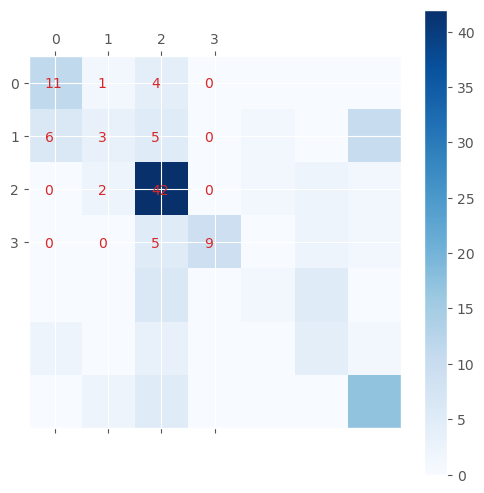

In [71]:
#Evaluating our Gradient Boosting model performance based on accuracy, precision, recall, and f1 score. 

prediction_GBoost = GBoost_model_X.predict(x_test)

print("Classification Report")
print(classification_report(y_test, prediction_GBoost))
print("=" * 50)
print(f"Model Accuracy: {accuracy_score(prediction_GBoost, y_test)}% accurate")

predict_proba_GBoost = GBoost_model_X.predict_proba(x_test)
print("=" * 50)
log_loss_GBoost = log_loss(y_test, predict_proba_GBoost)
print("Log Loss from Prediction Probability:", log_loss_GBoost)
print("=" * 50)

plot_confusion_matrix(y_test, prediction_GBoost)

In [72]:
#Model parameter hyptertuning for for our Random Forest model. We will determine the best parameters
#to maximize model performance based on our training data We will tune one paramter: n_estimators. We will then show the best test accuracy, 
#best cross validation  mean accuracy, and the model accuracy utilizing the optimal parameters


params = {"n_estimators": [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

rf_model = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = crossvalidation, n_jobs = -1, verbose = 5)
rf_model.fit(x_train, y_train)

print(f"Training Accuracy Utilizng best hyperparameters: {rf_model.best_estimator_.score(x_train, y_train)}% accurate")
print(f"Best Accuracy through GridSearch utilizing the training data: {rf_model.best_score_}% accurate")
print(f"Best Hyperparameters: {rf_model.best_params_}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ...................n_estimators=5;, score=0.639 total time=   0.0s
[CV 3/10] END ...................n_estimators=5;, score=0.472 total time=   0.0s
[CV 7/10] END ...................n_estimators=5;, score=0.429 total time=   0.0s
[CV 2/10] END ...................n_estimators=5;, score=0.556 total time=   0.0s
[CV 8/10] END ...................n_estimators=5;, score=0.543 total time=   0.0s
[CV 4/10] END ...................n_estimators=5;, score=0.371 total time=   0.0s
[CV 9/10] END ...................n_estimators=5;, score=0.514 total time=   0.0s
[CV 6/10] END ...................n_estimators=5;, score=0.543 total time=   0.0s
[CV 2/10] END ..................n_estimators=10;, score=0.750 total time=   0.0s
[CV 5/10] END ...................n_estimators=5;, score=0.543 total time=   0.1s
[CV 6/10] END ..................n_estimators=10;, score=0.629 total time=   0.0s
[CV 10/10] END ..................n_estimators=

In [73]:
#Will now train a new Random Forest model with best possible parameters on the training dataset and evaluate on testing dataset and compare it
#with its the cross validated results

rf_model_X = RandomForestClassifier(n_estimators = 50).fit(x_train, y_train)
rf_model_cv_scores = cross_val_score(rf_model_X, x_train, y_train, cv = crossvalidation)

print(f"Testing Accuracy utilizing best hyperparameters: {rf_model_X.score(x_test, y_test)}% accurate")
print(f"Average corss validated score on 10 K folds : {rf_model_cv_scores.mean()}% accurate")

Testing Accuracy utilizing best hyperparameters: 0.5986842105263158% accurate
Average corss validated score on 10 K folds : 0.6088095238095238% accurate


Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.67      0.75      0.71        16
    High Growth       0.50      0.12      0.19        25
     Low Growth       0.59      0.96      0.73        48
     Overvalued       1.00      0.59      0.74        17
         Stable       0.29      0.17      0.21        12
    Undervalued       0.00      0.00      0.00        10
       Volatile       0.62      0.75      0.68        24

       accuracy                           0.60       152
      macro avg       0.52      0.48      0.47       152
   weighted avg       0.57      0.60      0.54       152

Confusion Matrix
[[12  1  1  0  2  0  0]
 [ 4  3  7  0  1  0 10]
 [ 1  0 46  0  1  0  0]
 [ 0  0  6 10  0  1  0]
 [ 0  0  7  0  2  3  0]
 [ 1  1  6  0  1  0  1]
 [ 0  1  5  0  0  0 18]]
Model Accuracy: 59.86842105263158% accurate
Log Loss from Prediction Probability: 1.3951644515751582


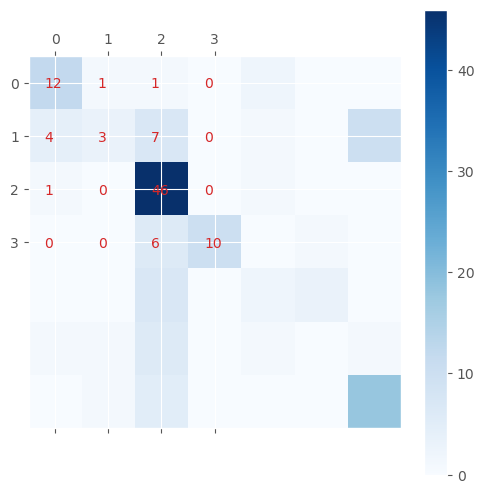

In [74]:
#Evaluating our Random Forest model performance based on accuracy, precision, recall, log_loss and f1 score. Also building a confusion matrix
#to better visualize results

prediction_rf = rf_model_X.predict(x_test)

print("Classification Report")
print(classification_report(y_test, prediction_rf))
print("=" * 50)
print("Confusion Matrix")
print(confusion_matrix(y_test, prediction_rf))
print("=" * 50)
print(f"Model Accuracy: {accuracy_score(prediction_rf, y_test) * 100}% accurate")
print("=" * 50)

predict_prob_rf = rf_model_X.predict_proba(x_test)
log_loss_rf = log_loss(y_test, predict_prob_rf)
print("Log Loss from Prediction Probability:", log_loss_rf)
print("=" * 50)

plot_confusion_matrix(y_test, prediction_rf)

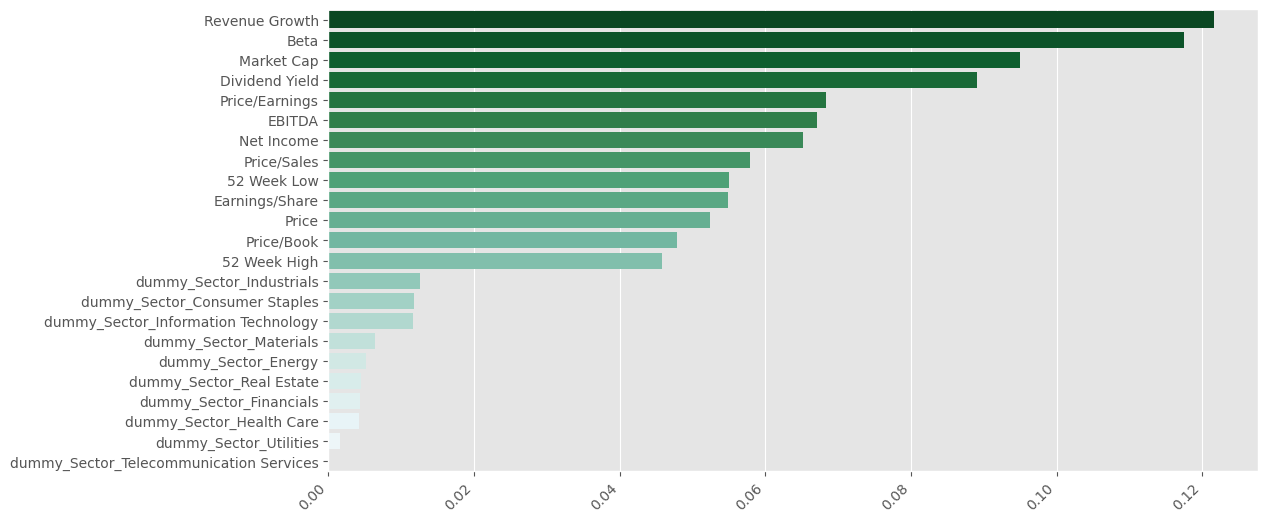

In [75]:
#Building a visualization to get an idea of the features being used to make decision in our Decision Tree Classifier

fi = rf_model_X.feature_importances_ 
fi = pd.Series(data = fi, index = x_train.columns) 
fi.sort_values(ascending = False, inplace = True) 

plt.figure(figsize = (12, 6))
chart = sns.barplot(x = fi, y = fi.index, palette = sns.color_palette("BuGn_r", n_colors = len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

In [76]:
#Model parameter hyptertuning for for our Decision Tree Classifier. We will determine the best parameters
#to maximize model performance based on our training dataset. We will tune three paramters: max_leaf_nodes, max_depth, and min_samples_split. 
#We will then show the best test accuracy, best cross validation mean accuracy, and the model accuracy utilizing the optimal parameters

params = {"max_leaf_nodes": [2, 4, 8, 16, 32, 64, 100, 200],
          "max_depth": [10, 15, 20, 30, 40, 50, 60, 80, 100],
          "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
          "criterion": ["gini", "entropy"]}

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = crossvalidation, n_jobs = -1, verbose = 5)
dt_model.fit(x_train, y_train)

print(f"Training Accuracy Utilizing best hyperparameter is: {dt_model.best_estimator_.score(x_train, y_train)}% accurate")
print(f"Best Accuracy through GridSearch utilizing the training data is: {dt_model.best_score_}% accurate")
print("The best model hyperparameters are:", dt_model.best_params_)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
[CV 1/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.472 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.444 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.361 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.429 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.314 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.400 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.429 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.400 total time=   0.0s
[CV 10/10] EN

In [77]:
#Will now train a new Decision Tree Classifier with best possible parameters on the training dataset and evaluate on testing dataset and compare 
#it with its the cross validated results

dt_model_X = DecisionTreeClassifier(criterion = "gini", max_depth = 30, max_leaf_nodes = 200, min_samples_split = 2).fit(x_train, y_train)
dt_model_cv_scores = cross_val_score(dt_model_X, x_train, y_train, cv = crossvalidation)

print(f"Testing Accuracy utilizing the best hyperparameters is: {dt_model_X.score(x_test, y_test)}% accurate")
print(f"Average cross validated score across 10 K folds is: {dt_model_cv_scores.mean()}% accurate")

Testing Accuracy utilizing the best hyperparameters is: 0.506578947368421% accurate
Average cross validated score across 10 K folds is: 0.4874603174603175% accurate


Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.63      0.75      0.69        16
    High Growth       0.40      0.32      0.36        25
     Low Growth       0.69      0.73      0.71        48
     Overvalued       0.50      0.47      0.48        17
         Stable       0.12      0.08      0.10        12
    Undervalued       0.09      0.10      0.10        10
       Volatile       0.44      0.50      0.47        24

       accuracy                           0.51       152
      macro avg       0.41      0.42      0.41       152
   weighted avg       0.49      0.51      0.50       152

Confusion Matrix
[[12  0  0  1  2  0  1]
 [ 4  8  1  0  1  1 10]
 [ 2  1 35  2  0  4  4]
 [ 0  1  4  8  2  2  0]
 [ 0  1  4  3  1  3  0]
 [ 1  2  4  1  1  1  0]
 [ 0  7  3  1  1  0 12]]
Accuracy: 50.6578947368421% accurate
Log Loss from prediction probability 17.784697395945965


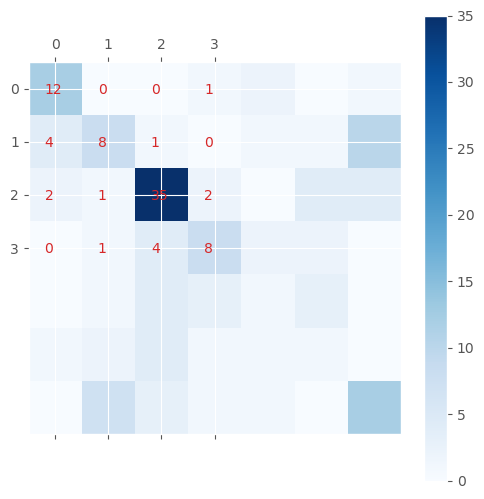

In [78]:
#Evaluating our Decision Tree Classifier performance based on accuracy, precision, recall, log_loss and f1 score. Also building a confusion matrix
#to better visualize results

prediction_dt = dt_model_X.predict(x_test)

print("Classification Report")
print(classification_report(y_test, prediction_dt))
print("=" * 50)
print("Confusion Matrix")
print(confusion_matrix(y_test, prediction_dt))
print("=" * 50)
print(f"Accuracy: {accuracy_score(prediction_dt, y_test) * 100}% accurate")

predict_prob_dt = dt_model_X.predict_proba(x_test)
log_loss_dt = log_loss(y_test, predict_prob_dt)
print("Log Loss from prediction probability", log_loss_dt)
print("=" * 50)
plot_confusion_matrix(y_test, prediction_dt)


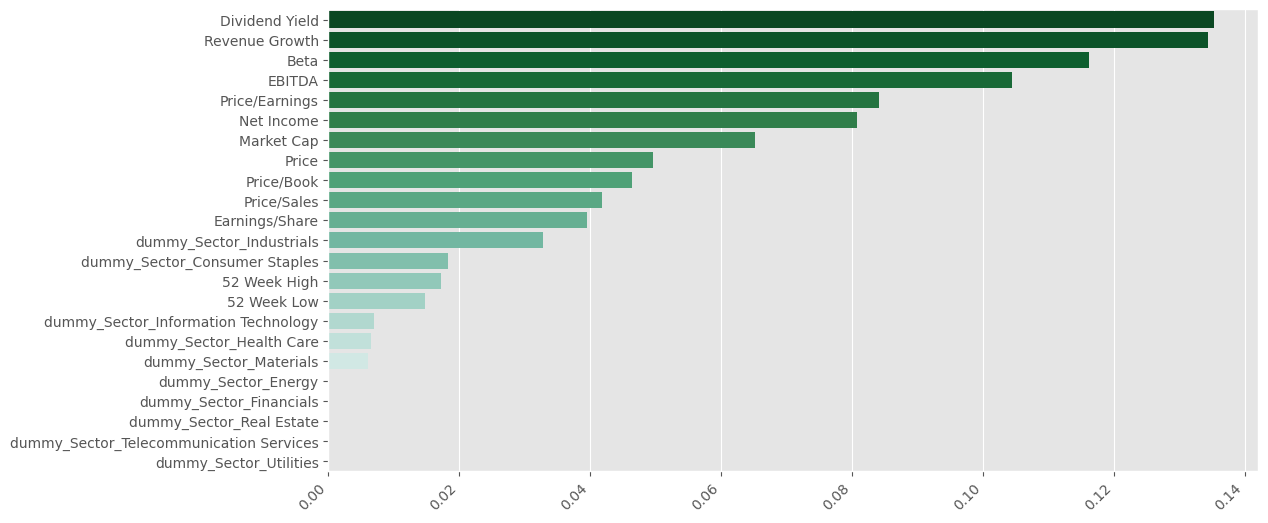

In [79]:
#Building a visualization to get an idea of the features being used to make decision in our Decision Tree Classifier

fi = dt_model_X.feature_importances_ 
fi = pd.Series(data = fi, index = x_train.columns) 
fi.sort_values(ascending = False, inplace = True) 

plt.figure(figsize = (12, 6))
chart = sns.barplot(x = fi, y = fi.index, palette = sns.color_palette("BuGn_r", n_colors = len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

# Supervised Learning Results, Analysis, and Model Improvements and Recomendations Moving Forward:

## Results -
Three of our supervised learning models have performed well, while one has failed to operate. For the most part, the three models that did work were in align with most of baseline expectations in regards to overall accuracy. To no surprise, our Random Forest classifier had the best overall accuracy at around 56% while our Decision Tree classifier came in second at around 52%, alongside our Support Vector Classifier coming in last at around 47%. As for the model that did not work, our K Nearest Neighbors classifier did not seem to operate, as there are version compatability issues with our current Scikit-Learn package and other various packages. We tried to resolve the issue but to no avail. As for the superior performance in our Random Forest classifier, Random Forest models utilize multiple trees to make a classification alongside pruning the trees to prevent overfitting, leading to a robust and versatile model that can generalize very well to new data. Within the analysis of each of our 3 models, however, certain metrics such as the precision, recall, log_loss, and f1 score can signal to investors on the various strengths and weaknesses of our models' classifications on certain stock categories and its confidence in making those predictions. We will delve into the specifics of these attributes for each of our models.

## Analysis - 

### Support Vector Classifier:
This model is best at identifying Dividend Paying Stocks and Low Growth Stocks with room for improvement in High Growth and Undervalued predictions. With precision and recall scores at 59% and 67% for the Dividend Paying category, respectively, this model is correct 59% of the time when predicting a stock is Dividend Paying. It can correctly identify stocks that are Dividend Paying 67% of the time. In addition, it is also correct 50% of the time when predicting a stock is of Low Growth and correctly identifies stocks that are of Low Growth 74% of the time. However, because the overall accuracy of this model is under 50%, at around 47%, investors should be cautious and not rely soley on this model's predictions when making investment decisions. This leads us to discuss where this model can utilize signficant improvement and enhancement.   

This model does not shine its light well in identfiying stocks that are of High Growth and stocks that are Undervalued. With a recall score at just 21% for the High Growth category, it missess a lot of stocks that are actually considered High Growth. Furthermore, with a precision and recall score at 0% for the Undervalued category, this model is unable to identify any Undervalued stocks correctly, which is a signficant concern for value investors. For investors concerned with risk, this model's ability to identify "Volatile" stocks is not very strong with precision and recall scores at 47% and 41%, respectively. This suggests investors should be cautious and perhaps use additional risk assessment methods.

Overall, the low overall accuracy and the mixed performance across different metrics suggest that the model might not be robust enough to be used as a standalone tool for making investment decisions. As a general rule of thumb, while investors can utilize this model to identify income stocks to better diversify their portfolio or identify stocks that are of low growth to stay away from, its crucial that the recomendations from this model are incorporated with various other investment strategies and research methodologies for identifying Dividend or Undervalued oppurtunities that align with an investor's long-term investment objectives.

### Decision Tree Classifier:
This model is best at identifying Overvalued and Low Growth Stocks. However, it falls short in regards to its performance across different stock categories. With a precision score of 75% for the Overvaluaed category, this model is correct 75% of the time when it predicts a stock is overvalued. With a recall score of 70% for the Low Growth category, this model can correctly identify stocks that are of Low Growth 70% of the time. The overall accuracy of this model is around 52%, which beats the 50% threshold for model significance. However, although this model can be accurate more than half of the time, it also has an extremely high log-loss value at around 17.31. This can signify to investors that this model is extremely "uncertain" about its predictions in which even its "best" predictions should be taken into account amongst many other valuation methods when valuing a particular stock.

The feature plot for this model displays the relative importance of different features in the model's predictions. Features with longer bars are considered more important by the model. It seems that "Revenue Growth", "Beta", and "Market Cap" are the most significant factors for this model. Other factors like "Price/Earnings", "Earnings/Share", and "Net Income" also play a significant role. In contrast, the sector variables, one hot encoded as dummy variables representing sectors (like "dummy_Sector_Utilities") are among the least important. This appears to make domain sense, as Revenue Growth, Beta, and Market Cap are crucial for determining whether a stock is of high or low growth alongside Price/Earnings which is also another crucial aspect in determining whether or not a company is overvalued. 

For "Dividend Paying" and "Overvalued" stocks, this model shows a moderate level of reliability, with F1-scores of 0.52 and 0.71, respectively. However, its ability to predict "High Growth," "Stable," "Undervalued," and "Volatile" stocks is less dependable, as indicated by lower F1-scores. The model is most confident in correctly identifying "Overvalued" stocks but struggles significantly with "Undervalued" stocks, often missing them (low recall) and incorrectly labeling other stocks as such (low precision). 

Overall, while this model can indeed provide insight, its predictions are not consistent enough to be solely relied upon. While investrocs can utilize this model to identify Overvalued and Lower Growth stocks to avoid, their methodologies and approach should still be augmented with further analysis and investment strategies to properley identify stocks that are either Overvalued or of Low Growth.

### Random Forest Classifier:
This model is our best overall model with an overall accuracy of around 56%. Its strengths lie in its ability to identify stocks that are Overvalued, are of Low Growth, and that are Volatile. With a precision score of 83% for the Overvalued category, this model is correct 83% of the time when it predicts a stock is Overvalued, which can be considered very reliable. In addition, with a recall score of 84% for the Low growth category, this model can correctly identify stocks that are Overvalued 84% of the time, which can also be considered veri reliable. Finally, with a recall score of 71% for the Volatile category, this model can correctly identify stocks that are volatile 71% of the time, which can be a crucial insight to investors who seek stability. However, this model cannot perform well in regards to the High Growth and Undervalued categories with F1 scores at 12% and 15%, respectively. 

With a log-loss of 1.14, this model does have somewhat of a disparity between its predicted probabilties and the actual labels for each stock. However, it is not as insignificant, per say, as our Decision Tree Classifier. The feature importance plot for this model also appears to follow the same order as our Decision Tree Clasifier did, albiet with a heavier emphasis on the Price/Sales, Price/Book, Price/Earnings, and EBITDA features. This could imply as to how this model does have a a particular strength at identifying Overvalued stocks, as all four of these metrics are crucial valuation metrics of a stock. 

Overall, while this model is particularly adept at identifying Overvalued, Low Growth, and Volatile stocks, which could be useful for investors who are focused on avoiding overvalued stocks and seeking stable, low-growth investments, it's ability to identify High Growth and Undervalued stocks is weak, which may be problematic for growth-oriented investors or those looking for undervalued opportunities. This model could serve as an initial screening tool to identify potential Overvalued and Low Growth stocks but should be supplemented with further fundamental analysis. Investors that seek mitigate risk within their portfolio could utilize this mixed-performance model, which shows proficiency in identifying Overvalued, Low Growth, and Volatile stocks. However, investors must also be wary of depending on its ability in regards to High Growth and Undervalued categories, necessitating additional analysis for these specific categories.


## Model Improvements and Recomendations for Investors Moving Forward - 

In our exploration for approaches that can be utilized to categorize stocks into insightful classifications, the results have been particularly useful and enlightening. Our Random Forest model has led the way with an accuracy of around 56%, showcasing its strength in pinpointing overvalued stocks and those with lower growth potential. However, a word of caution is warranted due to the model's log-loss score, reminding us that its predictions aren't perfect by any means. The Decision Tree and Support Vector Classifier have also contributed valuable insights, aligning with key financial indicators that resonate with common investment analysis tools. Nonetheless, their performance across different stock categories was a mixed success, indicating room for improvement, particularly in identifying high-growth opportunities. The K Nearest Neighbors model, unfortunately, hit a technical roadblock, which highlights the occasional challenges faced in the practical application of machine learning techniques.

Moving forward, we plan to enrich the dataset beyond just the S&P 500, with many more U.S. stocks from many different exchanges and utilize them as training data and refine our models' hyperparameters according to such dataset enrichments. This will ensure our target feature (Stock Insight) possesses more balanced categories alongside the most balanced bias-variance tradeoff, as most of the observations (stocks) within our dataset were labeled as Low Growth by a wide margin. Also by optimizing the features and model parameters, we could bridge the gaps identified in the initial analysis. This refinement is crucial, especially for categories like high-growth and undervalued stocks, where our models need to sharpen their acumen. It's also important to note that we have taken a unique approach to obtaining our target variable by crafting it and its categories by blending an unsupervised learning method with our domain knowledge. This process involved a separate dataset, which was a time series dataset of each of the 500 stocks in the S&P 500 with their monthly adjusted closing prices through a 12 year time period from 2010 - 2022. This significnatly enabled us to draw comparisons and correlations between features, enabling us to establish criteria for stock categorization as accurately as possible. It's crucial to acknowledge that without integrating insights from this additional dataset, there's a risk that our supervised models may have overlooked intricate patterns and relationships present in the initial training data from our primary dataset. 

For investors, these models present a starting point for identifying potential investments. The Random Forest model, with its ability to identify overvalued stocks, exemplifies how machine learning can complement traditional investment strategies. Investors can leverage these models as a first pass in their analysis, using the insights to focus on areas that merit further research. This synergistic approach allows for a data-driven foundation upon which qualitative assessments and expert opinions can be layered. It’s a way to refine the selection process, helping investors to pinpoint opportunities for high growth or discover stocks that are undervalued by the market. Our models' classifications, when integrated thoughtfully, enable investors to diversify their portfolios. This diversity spreads the potential risk and returns across various market sectors and styles, aligning with long-term objectives. Such diversity is essential, as it helps mitigate the risk associated with any single investment or category.

Automating the classification process can also save time, allowing investors to sift through vast quantities of data more efficiently. This efficiency can uncover opportunities that might otherwise be missed and helps investors react swiftly to market changes. However, the model is not without its drawbacks. An over-reliance on our models' predictions can lead investors to overlook qualitative aspects and real-time market sentiments, which are not encapsulated within historical data. The model's dependency on historical data means it might not fully account for unforeseen market events or shifts in economic conditions. As such, our tool should be used to inform, not dictate, investment decisions. 

In conclusion, while our models offer a high-tech approach to classifying stocks and aiding investment decisions, it should be used as one of many methodologies and tools in an investor's toolbox. The best strategy is one that combines the precision of algorithmic analysis with the discernment of human expertise. By striking this balance, investors can harness the strengths of machine learning while mitigating its limitations, aiming for a portfolio that is both growth-oriented and resilient.

# Time Series Forecasting - Project 3

We will be working with our already cleaned and preprocessed time series dataset. This process was completed during Phase 1 (Project 1) of this entire project. The final product of this process involves a dataset in which the columns represent all 500 companies within the S&P 500 and the rows represent the Adjusted Closing Stock Prices of each stock on a monthly basis from 2010 - 2022. As a side note (which was already discussed earlier), Adjusted Closing Stock Prices are essentially the prices of stocks on any given day after the trading session between 9:30 AM and 4:00 PM ends with the consideration of corporate actions on that given day. All in all, this comprehensive dataset provides a foundation for understanding stock price trends and patterns over time, in which the ARIMA model will take over to forecast future stock prices. 

In [80]:
#Loading our Time Series Dataset
final_time_df

Symbol               A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2010-01-31   20.434929   4.496876   38.432693    6.572423  132.861934   
2010-02-28   19.018194   5.279352   38.537392    5.980319  129.827904   
2010-03-31   20.950695   7.249681   39.308331    6.418256  126.793875   
2010-04-30   22.556767   6.976287   40.372318    7.246835  123.759845   
2010-05-31   24.006147   6.966859   44.146488    8.179828  120.725816   
...                ...        ...         ...         ...         ...   
2022-03-31  131.929993  16.290001  201.169998  163.199997  147.690002   
2022-04-30  133.970001  18.240000  207.479996  174.309998  162.679993   
2022-05-31  119.570000  18.559999  200.490005  157.960007  147.869995   
2022-06-30  123.089996  17.290001  187.660004  148.710007  146.020004   
2022-07-31  119.209999  13.130000  173.639999  138.929993  153.800003   

Symbol             ABC        ABMD         ABT         ACN        ADBE  ...  \
Date                                                                    ...   
2010-01-31   22.101795    8.740000   19.778837   32.970871   37.090000  ...   
2010-02-28   23.031351    7.930000   19.513557   32.281208   32.480000  ...   
2010-03-31   23.365765   10.160000   19.861095   31.419127   34.889999  ...   
2010-04-30   23.798613   10.000000   19.374538   32.790630   35.740002  ...   
2010-05-31   26.037804    9.870000   18.766724   34.588467   33.590000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-03-31  141.970001  313.489990  118.169998  311.350006  466.679993  ...   
2022-04-30  156.520004  338.640015  118.580002  340.640015  458.190002  ...   
2022-05-31  148.970001  285.709991  112.830002  304.600006  407.290009  ...   
2022-06-30  150.009995  255.360001  115.080002  298.649994  418.160004  ...   
2022-07-31  143.139999  254.559998  110.220001  280.649994  368.480011  ...   

Symbol           WYNN        XEL        XOM       XRAY        XYL         YUM  \
Date                                                                            
2010-01-31  41.963718  13.932555  43.185623  32.782581  34.877508   19.900911   
2010-02-28  43.000351  13.780539  41.330807  31.158770  34.216261   20.205957   
2010-03-31  43.446491  13.892897  41.110123  31.140213  33.555015   19.327446   
2010-04-30  50.781609  14.307093  42.499336  32.040195  32.893768   22.362329   
2010-05-31  60.281830  14.775082  42.643906  34.093819  32.232522   24.696037   
...               ...        ...        ...        ...        ...         ...   
2022-03-31  81.639999  66.510002  79.169998  54.360001  86.760002  120.019997   
2022-04-30  80.629997  72.750000  83.120003  49.250000  86.230003  118.820000   
2022-05-31  71.709999  72.669998  86.410004  39.650002  81.830002  115.760002   
2022-06-30  65.129997  75.120003  97.839996  39.040001  83.750000  119.419998   
2022-07-31  58.180000  72.629997  87.550003  36.200001  78.750000  116.709999   

Symbol             ZBH        ZBRA       ZION         ZTS  
Date                                                       
2010-01-31   53.282867   28.670000  11.580979   50.234796  
2010-02-28   50.628475   26.740000  17.306305   49.662193  
2010-03-31   51.693806   29.490000  15.907710   49.089590  
2010-04-30   53.256229   29.930000  19.019705   48.516987  
2010-05-31   54.445831   28.660000  25.208935   47.944385  
...                ...         ...        ...         ...  
2022-03-31  124.139999  405.579987  64.940002  192.539993  
2022-04-30  127.730003  413.730011  64.300003  191.110001  
2022-05-31  120.650002  379.570007  57.009998  174.669998  
2022-06-30  119.279999  334.549988  56.000000  167.020004  
2022-07-31  107.269997  299.339996  51.380001  174.210007  

[151 rows x 503 columns]

## How the ARIMA Model Works: 

An ARIMA Model, which stands for Autoregressive Integrated Moving Average, combines both autoregressive (AR) and moving average (MA) features along with differencing to account for trends in time series data.

### Autoregressive Component (AR):
The AR part of the model, specifically an AR(1) model, posits that today's value of a time series is based on a long-term mean plus a fraction (denoted as φ, phi) of yesterday's value, plus some random noise (ε, epsilon). The formula for this is: 

$$ R_t = \mu + \phi R_{t-1} + \epsilon_t $$


This process can depict different types of time series behavior depending on the value of phi:
- If φ = 1, the process is a random walk, which is non-stationary.
- If φ = 0, the process is white noise and stationary.
- For the process to be stable and stationary, |φ| must be less than 1.
- A positive φ implies momentum, where positive returns tend to follow positive returns (and vice versa), while a negative φ indicates mean reversion.

The autocorrelation in an AR(1) model decays exponentially with the rate determined by φ.

### Moving Average Component (MA):
The MA component models today's value as the long-term mean plus noise and a fraction (θ, theta) of yesterday's noise: 

$$ R_t = \mu + \varepsilon_t + \theta \varepsilon_{t-1} $$


This MA(1) model is always stationary, regardless of the value of theta:
- A negative θ suggests a one-period mean reversion, while a positive θ indicates one-period momentum.
- The lag-1 autocorrelation for an MA(1) model is not directly θ, but θ divided by (1 + θ²).

### Example of an MA(1) Process:
High-frequency stock returns are an example of an MA(1) process, where the "bid/ask bounce" can induce a negative lag-1 autocorrelation.

### Combining AR and MA:

- An ARMA model is a combination of an AR and MA model. 
- ARMA(1, 1) model: $$ R_t = \mu + \phi R_{t-1} + \varepsilon_t + \theta \varepsilon_{t-1} $$

In the ARIMA model, the AR and MA components work in tandem, with the differencing aspect (the 'I' in ARIMA) serving to detrend the series. By doing so, the model aims to capture both the momentum and reversion tendencies in the data, as well as any cyclicality not accounted for by seasonality.

Each component—AR, I, and MA—provides a framework for modeling time series data, capturing different aspects such as trend, noise, and the time series’ own lags. By selecting appropriate orders for these components, an ARIMA model can be tailored to various types of data, offering a flexible approach to forecasting.

### Utilizing one feature that "sums" the total value of all stock prices per time period

Feature engineering the column we will be forecasting with. This column represents the S&P 500 Index Price for every monthly time period from the years 2010 - 2022. This price essentially represents the weighted prices of all stocks within the S&P 500 combined, which forms the market price of the hypothetical S&P 500 index. To first engineer this column, we needed to derive the outstanding shares for each stock from fundamentals_df. After doing so, we then made a dictionary which maps each individual stock to its respective shares outstanding. This then allowed us to multiply the price of each stock per month to the outstanding shares to calculate its live market cap per month. We then summed the market caps for each stock for each time period to get obtain a total market cap of all stocks within the S&P 500 for each time period Finally, we determined a divsor according to our domain knowledge and divded the Total Market Cap per time period by this divisor to obtain the final S&P 500 Index Price per time period. 

In [81]:
#Feature Engineering our "Target" feature

fundamentals_df["Shares Outstanding"] = (fundamentals_df["Market Cap"] / fundamentals_df["Price"]).round(0)

stock_outstanding_shares = dict(zip(fundamentals_df.index, fundamentals_df["Shares Outstanding"]))

for stock in final_time_df:
    final_time_df[f"{stock}_Market Cap"] = final_time_df[stock] * stock_outstanding_shares.get(stock, 0)

final_time_df["Total Market Cap"] = final_time_df.filter(like = "_Market Cap").sum(axis = 1)

for stock in final_time_df.columns.tolist():
    if "_Market Cap" in stock:
        final_time_df.drop(columns = [stock], inplace = True)

    
divisor = final_time_df["Total Market Cap"].iloc[0] / 1300

final_time_df["S&P 500 Index Price"] = final_time_df["Total Market Cap"] / divisor
final_time_df.drop(columns = ["Total Market Cap"], inplace = True)

final_time_df

Symbol               A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2010-01-31   20.434929   4.496876   38.432693    6.572423  132.861934   
2010-02-28   19.018194   5.279352   38.537392    5.980319  129.827904   
2010-03-31   20.950695   7.249681   39.308331    6.418256  126.793875   
2010-04-30   22.556767   6.976287   40.372318    7.246835  123.759845   
2010-05-31   24.006147   6.966859   44.146488    8.179828  120.725816   
...                ...        ...         ...         ...         ...   
2022-03-31  131.929993  16.290001  201.169998  163.199997  147.690002   
2022-04-30  133.970001  18.240000  207.479996  174.309998  162.679993   
2022-05-31  119.570000  18.559999  200.490005  157.960007  147.869995   
2022-06-30  123.089996  17.290001  187.660004  148.710007  146.020004   
2022-07-31  119.209999  13.130000  173.639999  138.929993  153.800003   

Symbol             ABC        ABMD         ABT         ACN        ADBE  ...  \
Date                                                                    ...   
2010-01-31   22.101795    8.740000   19.778837   32.970871   37.090000  ...   
2010-02-28   23.031351    7.930000   19.513557   32.281208   32.480000  ...   
2010-03-31   23.365765   10.160000   19.861095   31.419127   34.889999  ...   
2010-04-30   23.798613   10.000000   19.374538   32.790630   35.740002  ...   
2010-05-31   26.037804    9.870000   18.766724   34.588467   33.590000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-03-31  141.970001  313.489990  118.169998  311.350006  466.679993  ...   
2022-04-30  156.520004  338.640015  118.580002  340.640015  458.190002  ...   
2022-05-31  148.970001  285.709991  112.830002  304.600006  407.290009  ...   
2022-06-30  150.009995  255.360001  115.080002  298.649994  418.160004  ...   
2022-07-31  143.139999  254.559998  110.220001  280.649994  368.480011  ...   

Symbol            XEL        XOM       XRAY        XYL         YUM  \
Date                                                                 
2010-01-31  13.932555  43.185623  32.782581  34.877508   19.900911   
2010-02-28  13.780539  41.330807  31.158770  34.216261   20.205957   
2010-03-31  13.892897  41.110123  31.140213  33.555015   19.327446   
2010-04-30  14.307093  42.499336  32.040195  32.893768   22.362329   
2010-05-31  14.775082  42.643906  34.093819  32.232522   24.696037   
...               ...        ...        ...        ...         ...   
2022-03-31  66.510002  79.169998  54.360001  86.760002  120.019997   
2022-04-30  72.750000  83.120003  49.250000  86.230003  118.820000   
2022-05-31  72.669998  86.410004  39.650002  81.830002  115.760002   
2022-06-30  75.120003  97.839996  39.040001  83.750000  119.419998   
2022-07-31  72.629997  87.550003  36.200001  78.750000  116.709999   

Symbol             ZBH        ZBRA       ZION         ZTS  S&P 500 Index Price  
Date                                                                            
2010-01-31   53.282867   28.670000  11.580979   50.234796          1300.000000  
2010-02-28   50.628475   26.740000  17.306305   49.662193          1269.629902  
2010-03-31   51.693806   29.490000  15.907710   49.089590          1278.996488  
2010-04-30   53.256229   29.930000  19.019705   48.516987          1343.238144  
2010-05-31   54.445831   28.660000  25.208935   47.944385          1367.789543  
...                ...         ...        ...         ...                  ...  
2022-03-31  124.139999  405.579987  64.940002  192.539993          4475.896422  
2022-04-30  127.730003  413.730011  64.300003  191.110001          4670.079614  
2022-05-31  120.650002  379.570007  57.009998  174.669998          4346.763013  
2022-06-30  119.279999  334.549988  56.000000  167.020004          4325.779740  
2022-07-31  107.269997  299.339996  51.380001  174.210007          4043.016305  

[151 rows x 504 columns]

### Testing for Stationarity by determing if the series is a Random Walk

We conduct the Augmented Dickey-Fuller (ADF) test to assess whether our time series—the S&P 500 Index Price—exhibits characteristics of a "random walk." A random walk is marked by its unpredictability, where today's value is derived from yesterday's value adjusted by a random noise. This noise, commonly referred to as "white noise," represents a series of uncorrelated values, each with constant variance and a zero mean. This defines the essence of stationarity, indicating that the statistical properties of the series remain unchanged over time.

Contrary to prevalent misconceptions, a random walk, especially one with a drift, implies non-stationarity, as it weaves in a deterministic trend or seasonality component atop random fluctuations. This drift component contributes a consistent mean price change over time, combined with the random noise component, to forecast today’s value from yesterday's. Consequently, our series demonstrates characteristics of a random walk with drift, as evidenced by the high autocorrelation in the changes (returns) attributed to the drift component (Check out the autocorrelation componenet of Project 1 for more information on this!). Essentially, this means the series, when viewed in levels, exhibits strong autocorrelation since each value is predicated on its predecessor, adjusted for noise.

Ideally, for the sake of analytical precision and enhanced forecasting capabilities, we aim for the series to be stationary and not follow a random walk pattern. However, financial time series, such as stock prices, often mirror random walk behavior, underscoring the market's inherent unpredictability and efficiency. Despite these challenges, methodologies exist to transform such series into stationary forms, thereby facilitating more accurate analysis and forecasting. These techniques encompass differencing the series to remove trends, employing logarithmic transformations to stabilize variance, and decomposing the series to isolate—and potentially remove or model—its trend and seasonal components. We will delve into the specifics of the methodology we employ moving forward! 

In [82]:
#Conducting the ADF test on our time series data and reporting on the results

from statsmodels.tsa.stattools import adfuller
results = adfuller(final_time_df["S&P 500 Index Price"])

print("ADF Test Statistic", results[0])
print("p-value", results[1])
print("Overall Results:", results)

#Because our P value is significantly above our statistcal signficance level of 5% alongside our test statistic not within the 5% range 
#(greater than 5% signifiance), we FAIL TO reject the null hypothesis that our series IS A random walk. In other words, are series IS a 
#random walk


ADF Test Statistic -0.12473967927182138
p-value 0.9469179306557998
Overall Results: (-0.12473967927182138, 0.9469179306557998, 1, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 1702.0854547070112)


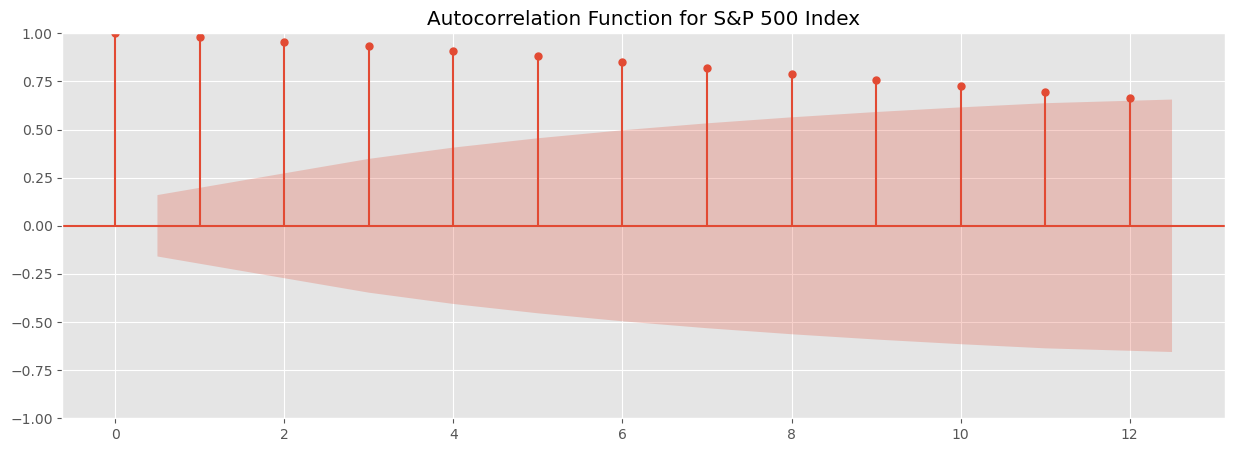

In [83]:
#Plotting an Autocorrelation function for our S&P 500 time series like we did in Project 1 for the Magnificent 7. We will also analyze this series
#with a lag of 6 (6 months) and a signficance level at 5%

plot_acf(final_time_df["S&P 500 Index Price"], lags = 12, alpha = 0.05)
plt.title("Autocorrelation Function for S&P 500 Index")
plt.show()


#As we can see, there is a high trend compoenent within the stock prices of the S&P 500, which indicates high autocrrelation and a random walk 
#with drift with no stationality.

### Autocorrelation Function Analaysis for S&P 500 Index:

The autocorrelation function plot for the S&P 500 Index reveals significant spikes at various lags, which diminish as the lags increase. This pattern suggests that there is autocorrelation present in the time series, particularly strong in the initial lags. Again, autocorrelation is an indicator of a time series' relationship with its past values. The pronounced autocorrelation at lag 1 and the gradual decline at higher lags can be consistent with a non-stationary series exhibiting a random walk with drift, as subsequent values tend to be closely related to prior values with a degree of systematic change over time.

In [84]:
#Dependencies needed for ARIMA modeling and analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

## Steps to Build Model:

We will discuss and begin to implement the key steps for our series analysis, modeling and evaluation, as they are intutive and crucial for properley forecasing future stock prices. Here is more detail on each step:

1. Achieve Stationarity: The first step is typically to transform the time series into a stationary series because most time series modeling techniques assume that the underlying data are stationary. Stationarity means that the statistical properties of the series (mean, variance, autocorrelation, etc.) are constant over time. Non-stationary data can lead to unreliable and spurious results in time series modeling.

2. Determine the Number of Lags: Once we have a stationary series, we will then need to determine the number of lags that should be included in the model. For autoregressive models (AR), you look at the Partial Autocorrelation Function (PACF) to identify the number of lags after which the PACF cuts off (becomes insignificant). For moving average models (MA), you use the Autocorrelation Function (ACF) to see where it cuts off. For ARIMA models, which combine both AR and MA components, you would look at both ACF and PACF.

3. Ensure Autocorrelation: Checking for autocorrelation is crucial because the premise of ARIMA-type models is that past values and past errors have a relationship with current values. If there is no autocorrelation, then using past values to predict future ones may not be appropriate. Autocorrelation at lag 1 is particularly important, but for more complex models, autocorrelation at higher lags will also be relevant.

4. Model Identification: Based on the autocorrelation and partial autocorrelation, we can then identify an appropriate model. This involves specifying the orders of the AR (p), differencing/I (d), and MA (q) components for an ARIMA model, for example.

5. Model Estimation: We will estimate the parameters of the model using statistical methods like Maximum Likelihood Estimation (MLE) or others.

7. Evaluation: We will hold back a portion of the data (not use it in the fitting process) and then use the model to forecast this holdout data to see how well the model performs on data it hasn't seen. This helps validate the model's predictive power.

8. Real World Validation: We will finally conduct out of sampling predictions which consist of utilizing the model to forecast data that as never been introduced model from both the training and testing partitions. This will essentially enable us to determine the reliability and implications of this model and how investors can implement it in their own strategic investment methodologies. 

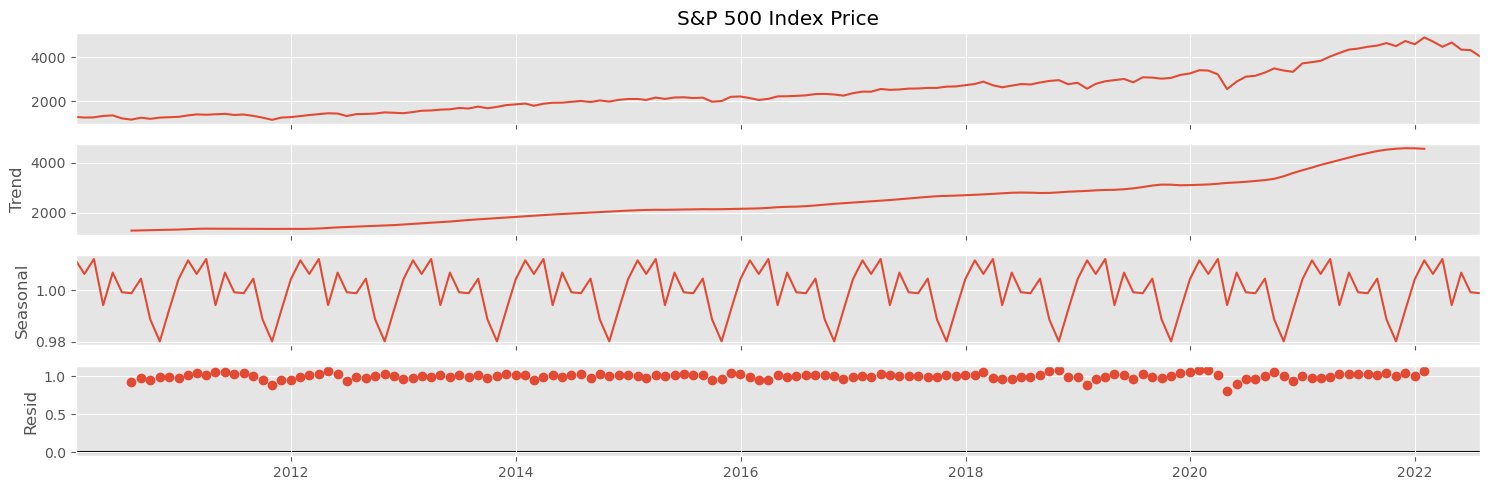

In [85]:
#Here we decompose the series to understand the underlying patterns in the data, such as identifying whether any apparent trends are the 
#result of seasonality or if they indicate a genuine long-term movement in the underlying process. It can also help in improving the accuracy of
#forecasting models by accounting for these decomposed elements.

decomposed_series = seasonal_decompose(final_time_df["S&P 500 Index Price"], model = "multiplicative")
decomposed_series.plot()
plt.show()

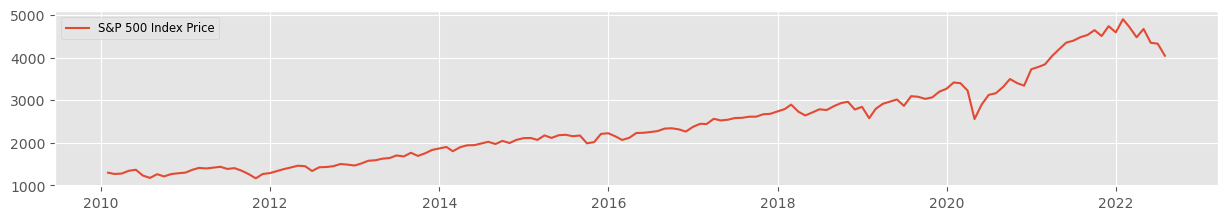

In [86]:
#Showcasing the prices in the S&P 500 Index ranging from 2010 - 2022 for clarity purposes.

plt.subplot(2, 1, 1)
plt.plot(final_time_df["S&P 500 Index Price"], label = "S&P 500 Index Price")
plt.legend(loc = "best", fontsize = "small")
plt.show()

In [87]:
#Here we will use the auto_arima function to complete steps 1-5, as this function streamlines the process of finding the most adequate ARIMA model.
#It determines the best ARIMA model for our time series data by balancing the model complexity with the fit quality, typically assessed using AIC
#or BIC metrics. Essentially, the auto_arima function automates the process of ARIMA modeling which otherwise would require manual iteration and 
#testing of different combinations of these hyperparameters.


best_arima_model = auto_arima(final_time_df["S&P 500 Index Price"], start_p = 1, start_q = 1, max_p = 5, max_q = 5, m = 12, start_P = 0, 
                              seasonal = True, d = None, D = 1, trace = True, error_action = "ignore", suppress_warnings = True, stepwise = True)

best_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1828.914, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1771.874, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1830.365, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1765.849, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1751.146, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1752.044, Time=1.06 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.02 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -871.511
Date:                            Wed, 01 May 2024   AIC                           1751.021
Time:                                    04:21:03   BIC                           1762.730
Sample:                                01-31-2010   HQIC                          1755.780
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1954      0.071     -2.735      0.006      -0.335      -0.055
ar.S.L12      -0.2457      0.094     -2.606      0.009      -0.431      -0.061
ma.S.L12      -0.8723      0.085    -10.231      0.000      -1.039      -0.705
sigma2      1.529e+04   1032.196     14.814      0.000    1.33e+04    1.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               401.70
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              12.65   Skew:                            -1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
#Finding the best ARIMA model for the S&P 500 Index WITHOUT the seasonal componenet

best_arima_model_X = auto_arima(final_time_df["S&P 500 Index Price"], start_p = 1, start_1 = 1, max_p = 5, max_q = 5,
                                d = None, trace = True, error_action = "ignore", suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1869.480, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1866.709, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1865.608, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1865.485, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1868.135, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1867.465, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1867.475, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1868.257, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.438 seconds


In [89]:
#Finding the best ARIMA model for the Apple time series (which is an individual stock unlike the S&P500 Index)

best_arima_model = auto_arima(final_time_df["AAPL"], start_p = 1, start_q = 1, max_p = 5, max_q = 5, m = 12, start_P = 0, 
                              seasonal = True, d = None, D = 1, trace = True, error_action = "ignore", suppress_warnings = True, stepwise = True)

best_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=898.359, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=930.913, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=905.671, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=897.475, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=932.896, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=899.432, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=899.437, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=905.632, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=896.125, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=898.087, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=898.092, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=903.790, Time=0.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  151
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -446.062
Date:                              Wed, 01 May 2024   AIC                            896.125
Time:                                      04:21:09   BIC                            901.979
Sample:                                  01-31-2010   HQIC                           898.504
                                       - 07-31-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.6886      0.065    -10.588      0.000      -0.816      -0.561
sigma2        35.5495      2.763     12.867      0.000      30.134      40.965
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                86.16
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):              66.23   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
#Building our ARIMA models accounting for the seasonal compoenent (SARIMAX) added and training it on a training partition consisting of every 
#observation except for the last twelve recorded months and testing on those last 12 recorded months

train = final_time_df.iloc[:len(final_time_df) - 12]
test = final_time_df.iloc[len(final_time_df) - 12:]

ARIMA_Model_SP500 = SARIMAX(train["S&P 500 Index Price"], order = (0, 1, 1), seasonal_order = (1, 1, 1, 12)).fit()
ARIMA_Model_Apple = SARIMAX(train["AAPL"], order = (0, 1, 0), seasonal_order = (0, 1, 1, 12)).fit()
ARIMA_Model_SP500_X = ARIMA(train["S&P 500 Index Price"], order = (1, 1, 1)).fit()
ARIMA_Model_SP500_Y = SARIMAX(train["S&P 500 Index Price"], order = (0, 1, 1), seasonal_order = (1, 1, 0, 12)).fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76379D+00    |proj g|=  3.54120D-02


/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.71516D+00    |proj g|=  2.55415D-02

At iterate   10    f=  5.71312D+00    |proj g|=  9.43196D-03

At iterate   15    f=  5.62957D+00    |proj g|=  1.05403D-01

At iterate   20    f=  5.59450D+00    |proj g|=  3.46436D-02

At iterate   25    f=  5.59295D+00    |proj g|=  5.58101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     37      1     0     0   2.771D-06   5.593D+00
  F =   5.5929512581160941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84740D+00    |proj g|=  6.89268D-02

At iterate    5    f=  2.77767D+00    |proj g|=  6.64497D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   2.839D-07   2.778D+00
  F =   2.7776648330205935     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No f


At iterate    5    f=  5.72638D+00    |proj g|=  4.59781D-03

At iterate   10    f=  5.72229D+00    |proj g|=  3.61524D-02

At iterate   15    f=  5.62677D+00    |proj g|=  2.75748D-03

At iterate   20    f=  5.62666D+00    |proj g|=  2.00284D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   2.003D-07   5.627D+00
  F =   5.6266562747814159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [91]:
#S&P 500 Model Summary
print(ARIMA_Model_SP500.summary())

                                     SARIMAX Results                                      
Dep. Variable:                S&P 500 Index Price   No. Observations:                  139
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -777.420
Date:                            Wed, 01 May 2024   AIC                           1562.840
Time:                                    04:21:12   BIC                           1574.186
Sample:                                01-31-2010   HQIC                          1567.450
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0994      0.059     -1.689      0.091      -0.215       0.016
ar.S.L12      -0.5335      0.117   

In [92]:
#Apple Model Summary
print(ARIMA_Model_Apple.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 AAPL   No. Observations:                  139
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -386.095
Date:                              Wed, 01 May 2024   AIC                            776.191
Time:                                      04:21:12   BIC                            781.863
Sample:                                  01-31-2010   HQIC                           778.495
                                       - 07-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.6105      0.110     -5.557      0.000      -0.826      -0.395
sigma2        25.69

In [93]:
#SP 500 Model (WITHOUT SEASONALITY) summary
print(ARIMA_Model_SP500_X.summary())

                                SARIMAX Results                                
Dep. Variable:     S&P 500 Index Price   No. Observations:                  139
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -845.747
Date:                 Wed, 01 May 2024   AIC                           1697.494
Time:                         04:21:12   BIC                           1706.275
Sample:                     01-31-2010   HQIC                          1701.062
                          - 07-31-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4185      1.138      0.368      0.713      -1.812       2.649
ma.L1         -0.4573      1.133     -0.403      0.687      -2.679       1.764
sigma2      1.232e+04    673.689     18.294 

In [94]:
#SP 500 Model (Changed Parameters)
print(ARIMA_Model_SP500_Y.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 S&P 500 Index Price   No. Observations:                  139
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -782.105
Date:                             Wed, 01 May 2024   AIC                           1570.210
Time:                                     04:21:12   BIC                           1578.719
Sample:                                 01-31-2010   HQIC                          1573.667
                                      - 07-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1182      0.068     -1.729      0.084      -0.252       0.016
ar.S.L12      -0.7767      

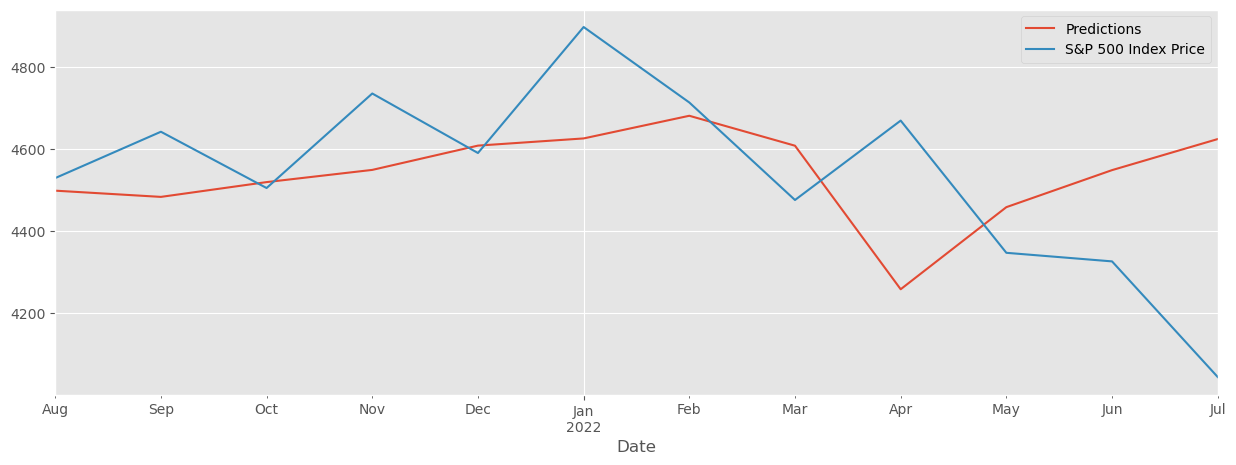

In [95]:
#We will now visually evalute how well our newly trained ARIMA model with the seasonal component and how it does against the testing parition of 
#our dataset. We will test the S&P 500 Index alongside Apple stock to get an idea of how the model performs on both an index and individual stocks

start = len(train)
end = len(train) + len(test) - 1

ARIMA_predictions_SP500 = ARIMA_Model_SP500.predict(start, end, typ = "levels").rename("Predictions")

ARIMA_predictions_SP500.plot(legend = True)
test["S&P 500 Index Price"].plot(legend = True)
plt.show()

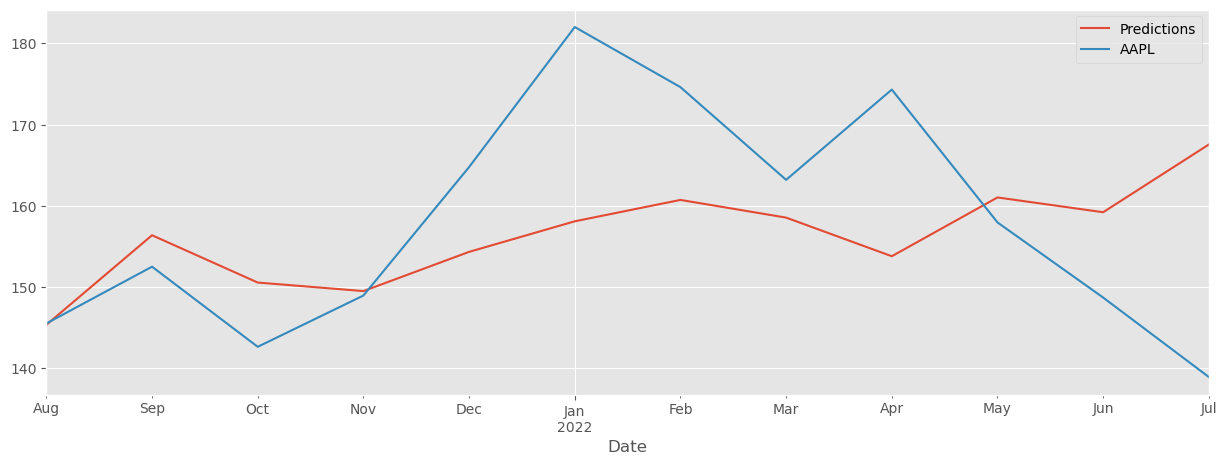

In [96]:
#Apple stock in-sample forecast

ARIMA_predictions_Apple = ARIMA_Model_Apple.predict(start, end, typ = "levels").rename("Predictions")

ARIMA_predictions_Apple.plot(legend = True)
test["AAPL"].plot(legend = True)
plt.show()

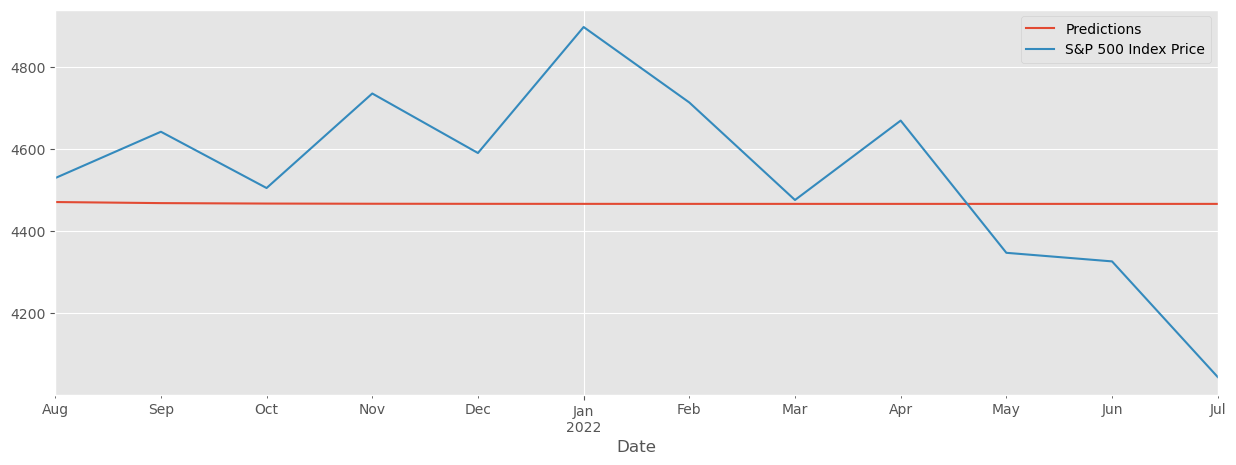

In [97]:
#SP 500 Index in-sample Forecast WITHOUT seasonality

ARIMA_predictions_SP500_X = ARIMA_Model_SP500_X.predict(start, end, typ = "levels").rename("Predictions")

ARIMA_predictions_SP500_X.plot(legend = True)
test["S&P 500 Index Price"].plot(legend = True)
plt.show()

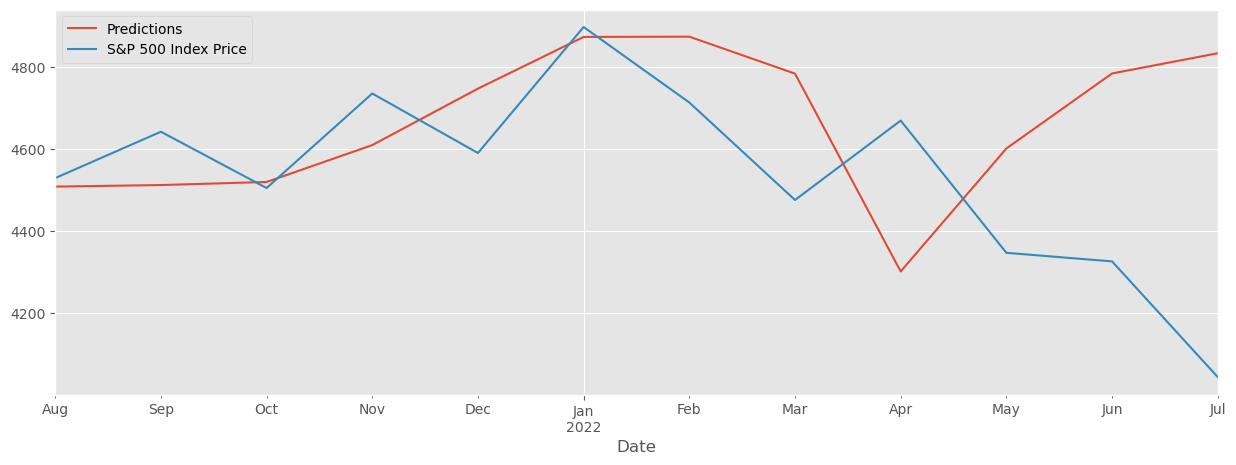

In [98]:
#SP 500 Index in-sample Forecast WITH parameter change
ARIMA_predictions_SP500_Y = ARIMA_Model_SP500_Y.predict(start, end, typ = "levels").rename("Predictions")
ARIMA_predictions_SP500_Y.plot(legend = True)
test["S&P 500 Index Price"].plot(legend = True)
plt.show()

In [99]:
#We will now statically evaluate our models against the testing in-sample parition by calcuating the mean squared error. The lower this calculation
#is, the better. 

print("Root Mean Squared Error for S&P 500 Index Values:", rmse(test["S&P 500 Index Price"], ARIMA_predictions_SP500))
print("Root Mean Squared Error for Apple Stock Prices:", rmse(test["AAPL"], ARIMA_predictions_Apple))
print("Root Mean Squared Error for S&P 500 Index Values (With Parameter Change):", rmse(test["S&P 500 Index Price"], ARIMA_predictions_SP500_Y))

Root Mean Squared Error for S&P 500 Index Values: 245.91239299446787
Root Mean Squared Error for Apple Stock Prices: 13.942091669187862
Root Mean Squared Error for S&P 500 Index Values (With Parameter Change): 318.7942269846296


### Model Evaluation: Evaluation Visualization and Root Mean Squared Error Analysis

Overall, from analyzing our models from our Evaluation Visualization, our models seems to capture the overall trends of both the S&P 500 Index and Apple stock prices, as both lines generally move upwards and downwards over time in tandem. Although there are points where the models' predictions closely follow the actual S&P 500 Index points and Apple stock prices, there are also periods where the models' predictions signficantly diverges from the actual price. As we can see, the models' predictions are not exactly aligned with the actual points of the S&P 500 index and actual prices of Apple stock and also do not capture the sharp increase in April and subsequent decrease leading into July. The actual data also shows volatilty and sharp movements that our models also does not seem to capture. This implies that our models may not respond quickly to sudden market changes, which is common with ARIMA models that tend to be more conservative in their predictions. Essentially, our prediction line tends to lag the actual values, which is typical for time series forecasting models, especially when they are optimized for capturing the trend rather than short-term fluctuations. 

In regards to the Root Mean Squared Error, which brings the error metric of the Mean Squared Error back into the original units of the data, we had a calculation of around 246 for our S&P 500 series and a value of around 14 for our Apple series. This implies that our S&P 500 model's predictions, on average, deviate around 246 units (points) from the actual S&P 500 index values while our Apple model's predictions, on average, deviate around 14 units (dollars) from the actual Apple stock prices. It's also important to consider that because we are not utilizing the Mean Squared Error (MSE) metric, outliers can signficnalty increase the RMSE value as the sum of errors are NOT squared. 

Overall, based on our Evaluation Visluazation and an RMSE value of around 246 for the S&P 500 model and an RMSE value of 14 for our Apple model, we can deduce several insights. The models demonstrates the ability to follow the general trajectory of their respective series, suggesting that it has captured the core trend within the historical data. However, the RMSE of both models indicate that the average error for the S&P 500 model and Apple model between the predicted and actual values is roughly 246 points and 14 dollars, respectively. In the context of the S&P 500 Index from a long term perspective, where values span several thousand points, this error might imply a relatively minor proportion of the index's value, potentially making the models' predictions acceptable for broader trend analysis or long-term investment strategies. Simiarly with Apple, from a long term perspective, as values tend to span much lesser than that of the S&P500, a RMSE of around 14 dollars makes sense in terms of financial market measurements. In regards to our Evaluation Visulization, one key takeaway is that while the models may be useful for understanding the broad direction of the S&P 500 index and individual stocks like Apple, its predictions do not capture the volatility of the market with high precision. This could be due to the inherent limitations of ARIMA models when it comes to accounting for sudden market shifts or the influence of external variables not included in the models. As such, examining the stock market's history in 2022, at around April, there were a series of economic events that resulted in a negative trend of stock prices that were not seen last since the year 2008. Even with the seasonality componenet incporated within our models, it may be hard for ARIMA models to capture this effectively and model it, hence the signficant discrepency between predicted and actual values after April. 

In practice, the acceptability of the RMSE value and our models' performance would largely depend on the specific use case for investors. For investors requiring high precision or short term trading guidance, our models may not be the most sufficient, necessitating further refinement and validation would be required. On the other hand, for investors interested in understanding long-term trends and making investment decisions based off of that or investors not as highly sensitive to short-term market movements, our models could still offer valuable insights. Ultimately, the RMSE and visual analysis serve as a starting point, highlighting the models' capabilities and limitations and guiding strategic investment strategies rather than being utilized soley for making investment decisions. 

In [100]:
#We will now conduct an out of sample forecast to evaluate the models' potential effectiveness in the real-world. We will forecast both the 
#S&P 500 Index series and Apple stock series two years in the future.

start = len(final_time_df)
end = (len(final_time_df - 1) + 12) 

final_ARIMA_Model_SP500 = SARIMAX(final_time_df["S&P 500 Index Price"], order = (0, 1, 1), seasonal_order = (1, 1, 1, 12)).fit()
final_ARIMA_Model_Apple = SARIMAX(final_time_df["AAPL"], order = (0, 1, 0), seasonal_order = (0, 1, 1, 12)).fit()
final_ARIMA_Model_SP500_Y = SARIMAX(final_time_df["S&P 500 Index Price"], order = (0, 1, 1), seasonal_order = (1, 1, 0, 12)).fit()

SP500_forecast = final_ARIMA_Model_SP500.predict(start, end + 24, typ = "levels").rename("Forecast")
Apple_forecast = final_ARIMA_Model_Apple.predict(start, end + 24, typ = "levels").rename("Forecast")
SP500_forecast_Y = final_ARIMA_Model_SP500_Y.predict(start, end + 24, typ = "levels").rename("Forecast")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88357D+00    |proj g|=  7.74017D-02


/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.86988D+00    |proj g|=  2.48222D-03

At iterate   10    f=  5.86580D+00    |proj g|=  4.43961D-02



At iterate   15    f=  5.77381D+00    |proj g|=  3.01669D-02

At iterate   20    f=  5.77184D+00    |proj g|=  8.23861D-03

At iterate   25    f=  5.77159D+00    |proj g|=  1.59128D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   2.201D-05   5.772D+00
  F =   5.7715938575976891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99854D+00    |proj g|=  4.42672D-02

At iter

/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/NewPython/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.88265D+00    |proj g|=  4.56159D-02

At iterate   15    f=  5.84714D+00    |proj g|=  2.14881D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   2.829D-05   5.846D+00
  F =   5.8459525161753954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


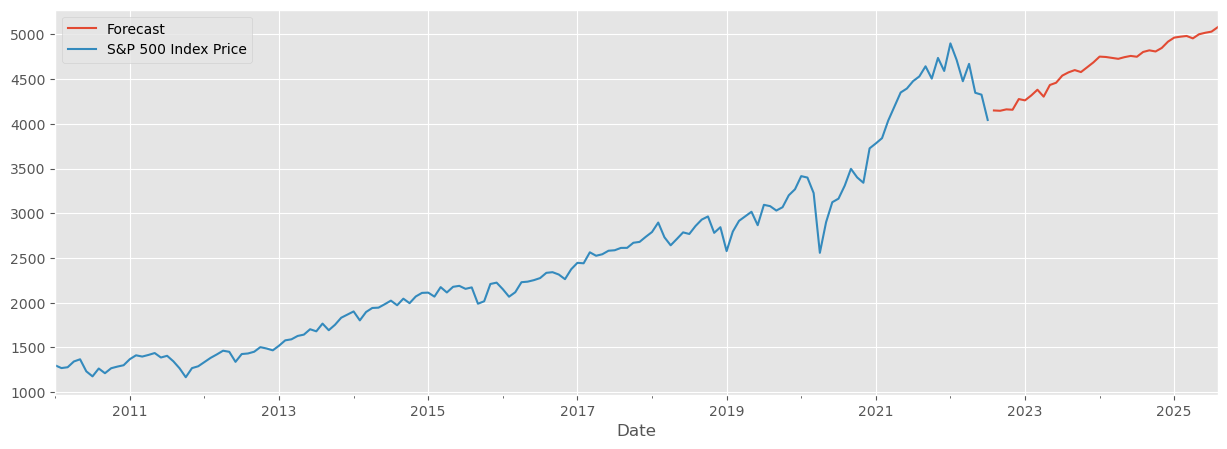

In [101]:
#SP500 Forecast Visualization (Out of Sample)

SP500_forecast.plot(legend = True)
final_time_df["S&P 500 Index Price"].plot(legend = True)
plt.show()

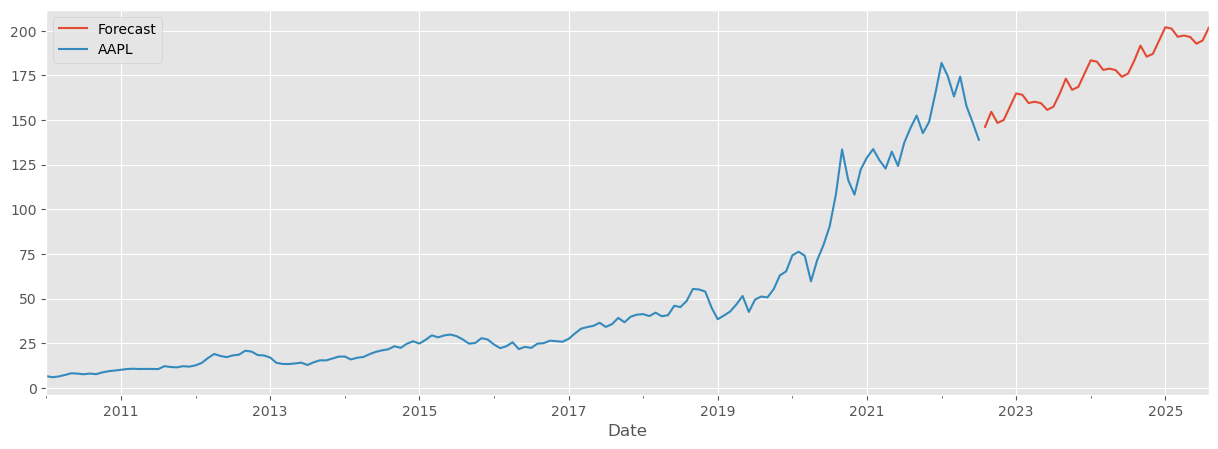

In [102]:
#Apple Forevast Visualization (Out of Sample)

Apple_forecast.plot(legend = True)
final_time_df["AAPL"].plot(legend = True)
plt.show()

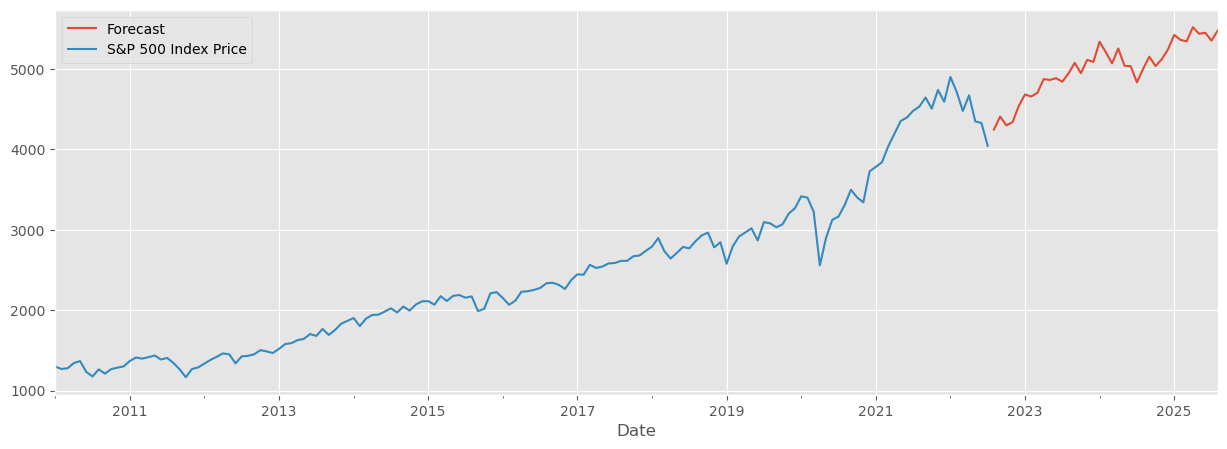

In [103]:
#S&P 500 Index Forecast Visualization (Out of Sample)

SP500_forecast_Y.plot(legend = True)
final_time_df["S&P 500 Index Price"].plot(legend = True)
plt.show()

# Recommender System - Final Project

## Introduction

Investors are often faced with the critical decision of whether to buy, sell, or hold a stock. We are aim to illuminate this decision-making process by offering essential insights that empower investors to make informed, astute investment choices. By providing solid, tailored recommendations on the top ten stocks to buy based on a single stock the investory be be exposed to, we aim to refine their strategies and enable them build a robust, diversified long-term investment portfolio. To build our recomendation system we have developed a hybrid model that combines content-based filtering with collaborative filtering techniques. This system starts by analyzing historical data and characteristics of S&P 500 stocks, including price ratios, market capitalization, and sector information. Using a content-based approach, we create profiles for each stock based on these attributes. These profiles help in determining stocks that are similar to each other, enabling us to recommend stocks similar to those that an investor is already considering or has invested in.

Further enhancing our system's capability, we employ a collaborative filtering approach using the Surprise library's matrix factorization techniques like Singular Value Decomposition (SVD). This method leverages latent factors derived from analyst recommendations to predict how highly an investor might rate unknown stocks based on their similarities to known preferences.

By integrating these approaches, our recommendation system not only identifies stocks similar to a given reference stock but also predicts potential investor satisfaction with these stocks, ranked by their predicted ratings. The final output is a list of the top ten recommended stocks that align closely with the investor's existing portfolio while also considering broader market sentiments and trends. This methodology ensures that our recommendations are both data-driven and finely tuned to individual investment styles, ultimately helping investors make more strategic, data-informed investment decisions.


## Data Sources

We will be utiilzing our previous dataset: fundamentals_df. However, this time around we will conduct a through process of adding additional features and leveraging our previous models' predicted/forecasted outputs. Here are the nuances:

GradientBoostingClassifier Output: This model, trained on S&P 500 stocks, categorizes stocks into labels such as High Growth, Low Growth, Volatile, Undervalued, Overvalued, Stable, and Dividend Paying. These classifications provide crucial insights and serve as input features for our recommender system. 

ARIMA Model Output: Our time series model, trained on final_time_df, forecasts future rate of returns for S&P 500 stocks, offering another vital input for our recommendation system.

Market Data from Yahoo Finance (yFinance) API: This resource supplies a wealth of information including analyst recommendations, financial statements, and historical market data, further enriching our analysis and recommendations. We will delve into the nuances of these features below:


### Data from Yahoo Finance API:

By analyzing these elements, you can evaluate a company's profitability, liquidity, financial health, and cash flow efficiency. These metrics are crucial for making informed investment decisions, conducting valuations, and assessing a company’s operational effectiveness. Each statement offers a different perspective on the business’s financial status, and together they provide a complete financial picture.


The balance sheet is one of the three fundamental financial statements used to assess a company's financial health and provides valuable insights into its asset management, liabilities, and shareholder equity. Here are some of the key stock metrics that can be derived from a balance sheet, which are particularly important for investors and financial analysts:

Current Assets and Current Liabilities: These figures are crucial for calculating the Current Ratio, which is a liquidity ratio that measures a company's ability to pay off its short-term obligations with its short-term assets. A higher ratio indicates better liquidity.

Total Debt: This includes both short-term and long-term liabilities. It's essential for calculating the Debt-to-Equity Ratio, which helps assess the company's financial leverage and risk by comparing its total liabilities to its shareholders' equity.

Total Assets: The sum of all assets, both current and noncurrent. This figure is used in various ratios, including the Return on Assets (ROA), which measures how efficiently a company uses its assets to generate profit.

Shareholder's Equity: Also known as net assets, this is the difference between total assets and total liabilities. It's used to compute the Equity Ratio, which provides insights into how much of a company's assets are financed by owner's funds.

Inventory: Part of current assets, inventory levels are critical for businesses that hold stock. Metrics derived from inventory include the Inventory Turnover Ratio, which measures how often a company sells and replaces its inventory over a period.

Accounts Receivable and Payable: These figures help calculate the Accounts Receivable Turnover Ratio and Accounts Payable Turnover Ratio, which measure how quickly a company collects cash from customers and pays off its suppliers, respectively.

Cash and Cash Equivalents: This is a measure of a company’s liquidity and its ability to meet short-term obligations without raising additional capital.

Property, Plant, and Equipment (PP&E): These are the long-term assets used in the operation of the business and are crucial for calculating depreciation expenses and capital expenditures.

Retained Earnings: Part of shareholder's equity, retained earnings indicate the amount of net earnings a company retains after dividends are paid to shareholders. It's a key indicator of a company's ability to reinvest in its core business or pay down debt.
Intangible Assets: These include non-physical assets like patents, trademarks, and goodwill. They are important for understanding the value of a company's intellectual property and brand.

### Using Balance Sheet Data:

When analyzing these metrics, it's crucial to compare them across time (trend analysis) and against competitors or industry benchmarks (comparative analysis). This helps in understanding the company's performance contextually, rather than in isolation. Each ratio or figure from a balance sheet can tell a different part of the company's financial story, from liquidity and solvency to operational efficiency and profitability.

### Future Growth Rates:

These are the features that signal how the market/investors are feeling about the future of the company. The higher it is, the more the market feels like it will see growth in the future
Price/Earnings: Market Price/Actual Dollar Earned per share held

### Current Financial Standing Features:

These are the features that relate to how a company is doing today including: If it is able to turn a profit using it’s assets, able to manage it’s expenses well, has a lot of debt financed, is able to pay off it’s current obligations. 

Earnings/Share: $ of earnings per share outstanding

Return on assets: The higher it is, the more money the company generate when it buys assets (equipment, land, buildings)

Debt to equity ratio: Basically the higher it is, the more debt the company has

Profit Margin: % of Revenue the company keeps after expenses

Quick/Acid test Ratio: Measure of how liquid a company is



## Adding our new Features

In [104]:
#Feature engineering the Stockholders Equity variable

stock_holders_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    bs = stock.balance_sheet
    bs.reset_index(inplace = True)

    if "index" in bs.columns and "Stockholders Equity" in bs["index"].values:
        stock_holders_equity = bs[bs["index"] == "Stockholders Equity"].iloc[0, 1]
        stock_holders_dict[ticker] = stock_holders_equity
        
fundamentals_df["Stockholders Equity"] = fundamentals_df.index.map(stock_holders_dict)
fundamentals_df["Stockholders Equity"] = pd.to_numeric(fundamentals_df["Stockholders Equity"], errors = "coerce")                                                                          
fundamentals_df["Stockholders Equity"] = fundamentals_df.groupby("Sector")["Stockholders Equity"].transform(lambda x: x.fillna(x.mean()))

fundamentals_df


Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Shares Outstanding  \
Symbol                                                        
A               -0.087       Low Growth         337964749.0   
AAL             -0.010       Low Growth         506066921.0   
AAP              0.060      Undervalued          74100263.0   
AAPL             0.021      High Growth        5217583203.0   
ABBV            -0.054  Dividend Paying        1672071783.0   
...                ...              ...                 ...   
XYL              0.406       Overvalued         183869889.0   
YUM              0.008       Low Growth         353909608.0   
ZBH              0.063           Stable         211674008.0   
ZION            -0.119       Low Growth         210425530.0   
ZTS              0.085       Overvalued         503301773.0   

        Stockholders Equity  
Symbol                       
A              5.845000e+09  
AAL           -5.202000e+09  
AAP            2.519728e+09  
AAPL           6.214600e+10  
ABBV           1.036000e+10  
...                     ...  
XYL            1.016600e+10  
YUM           -7.858000e+09  
ZBH            1.248050e+10  
ZION           5.691000e

In [105]:
#Feature Engineering the Total Debt variable

total_debt_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    bs = stock.balance_sheet
    bs.reset_index(inplace = True)

    if "index" in bs.columns and "Total Debt" in bs["index"].values:
        total_debt = bs[bs["index"] == "Total Debt"].iloc[0, 1]
        total_debt_dict[ticker] = total_debt

fundamentals_df["Total Debt"] = fundamentals_df.index.map(total_debt_dict)
fundamentals_df["Total Debt"] = pd.to_numeric(fundamentals_df["Total Debt"], errors = "coerce")
fundamentals_df["Total Debt"] = fundamentals_df.groupby("Sector")["Total Debt"].transform(lambda x: x.fillna(x.mean()))

fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Shares Outstanding  \
Symbol                                                        
A               -0.087       Low Growth         337964749.0   
AAL             -0.010       Low Growth         506066921.0   
AAP              0.060      Undervalued          74100263.0   
AAPL             0.021      High Growth        5217583203.0   
ABBV            -0.054  Dividend Paying        1672071783.0   
...                ...              ...                 ...   
XYL              0.406       Overvalued         183869889.0   
YUM              0.008       Low Growth         353909608.0   
ZBH              0.063           Stable         211674008.0   
ZION            -0.119       Low Growth         210425530.0   
ZTS              0.085       Overvalued         503301773.0   

        Stockholders Equity    Total Debt  
Symbol                                     
A              5.845000e+09  2.735000e+09  
AAL           -5.202000e+09  4.066300e+10  
AAP            2.519728e+09  4.002127e+09  
AAPL           6.214600e+10  1.110880e+11  
ABBV           1.036000e+10  5.938500e+10  
...                     ...           ...  
XY

In [106]:
#Feature engineering the Debt to Equity ratio variable by dividing Total Debt by Stockholders Equity

fundamentals_df["Debt to Equity"] = (fundamentals_df["Total Debt"] / fundamentals_df["Stockholders Equity"])
fundamentals_df.drop(columns = ["Total Debt", "Stockholders Equity"], inplace = True)
fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Shares Outstanding  Debt to Equity  
Symbol                                                                       
A               -0.087       Low Growth         337964749.0        0.467921  
AAL             -0.010       Low Growth         506066921.0       -7.816801  
AAP              0.060      Undervalued          74100263.0        1.588317  
AAPL             0.021      High Growth        5217583203.0        1.787533  
ABBV            -0.054  Dividend Paying        1672071783.0        5.732143  
...                ...              ...                 ...             ...  
XYL              0.406       Overvalued         183869889.0        0.235097  
YUM              0.008       Low Growth         353909608.0       -1.531051  
ZBH              0.063           Stable         211674008.0        0.473747  
ZION            -0.119       Low Growth         210425530.0        0.363205  
ZTS              0.085       Overvalued         503301773.0        1.351811  

[505 rows x 17 columns]

In [107]:
#Feature engineering the Total Revenue variable

total_revenue_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    income_statement = stock.income_stmt
    income_statement.reset_index(inplace = True)

    if "index" in income_statement.columns and "Total Revenue" in income_statement["index"].values:
        total_revenue = income_statement[income_statement["index"] == "Total Revenue"].iloc[0, 1]
        total_revenue_dict[ticker] = total_revenue

fundamentals_df["Total Revenue"] = fundamentals_df.index.map(total_revenue_dict)
fundamentals_df["Total Revenue"] = pd.to_numeric(fundamentals_df["Total Revenue"], errors = "coerce")
fundamentals_df["Total Revenue"] = fundamentals_df.groupby("Sector")["Total Revenue"].transform(lambda x: x.fillna(x.mean()))

fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Shares Outstanding  Debt to Equity  \
Symbol                                                                        
A               -0.087       Low Growth         337964749.0        0.467921   
AAL             -0.010       Low Growth         506066921.0       -7.816801   
AAP              0.060      Undervalued          74100263.0        1.588317   
AAPL             0.021      High Growth        5217583203.0        1.787533   
ABBV            -0.054  Dividend Paying        1672071783.0        5.732143   
...                ...              ...                 ...             ...   
XYL              0.406       Overvalued         183869889.0        0.235097   
YUM              0.008       Low Growth         353909608.0       -1.531051   
ZBH              0.063           Stable         211674008.0        0.473747   
ZION            -0.119       Low Growth         210425530.0        0.363205   
ZTS              0.085       Overvalued         503301773.0        1.351811   

        Total Revenue  
Symbol                 
A        6.833000e+09  
AAL      5.278800e+10  
AAP      1.128761e+10  
AAPL     3.832850e+11  
AB

In [108]:
#Feature engineering the Profit Margin variable by dividing Net Income by Total Revenue

fundamentals_df["Profit Margin"] = (fundamentals_df["Net Income"] / fundamentals_df["Total Revenue"])
fundamentals_df.drop(columns = ["Total Revenue"], inplace = True)
fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Shares Outstanding  Debt to Equity  \
Symbol                                                                        
A               -0.087       Low Growth         337964749.0        0.467921   
AAL             -0.010       Low Growth         506066921.0       -7.816801   
AAP              0.060      Undervalued          74100263.0        1.588317   
AAPL             0.021      High Growth        5217583203.0        1.787533   
ABBV            -0.054  Dividend Paying        1672071783.0        5.732143   
...                ...              ...                 ...             ...   
XYL              0.406       Overvalued         183869889.0        0.235097   
YUM              0.008       Low Growth         353909608.0       -1.531051   
ZBH              0.063           Stable         211674008.0        0.473747   
ZION            -0.119       Low Growth         210425530.0        0.363205   
ZTS              0.085       Overvalued         503301773.0        1.351811   

        Profit Margin  
Symbol                 
A            0.103867  
AAL          0.037484  
AAP          0.040636  
AAPL         0.125238  
AB

In [109]:
#Feature engineering the Operating Income variable

operating_income_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    income_statement = stock.income_stmt
    income_statement.reset_index(inplace = True)

    if "index" in income_statement.columns and "Operating Income" in income_statement["index"].values:
        operating_income = income_statement[income_statement["index"] == "Operating Income"].iloc[0, 1]
        operating_income_dict[ticker] = operating_income

fundamentals_df["Operating Income"] = fundamentals_df.index.map(operating_income_dict)
fundamentals_df["Operating Income"] = pd.to_numeric(fundamentals_df["Operating Income"], errors = "coerce")
fundamentals_df["Operating Income"] = fundamentals_df.groupby("Sector")["Operating Income"].transform(lambda x: x.fillna(x.mean()))

fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Shares Outstanding  Debt to Equity  \
Symbol                                                                        
A               -0.087       Low Growth         337964749.0        0.467921   
AAL             -0.010       Low Growth         506066921.0       -7.816801   
AAP              0.060      Undervalued          74100263.0        1.588317   
AAPL             0.021      High Growth        5217583203.0        1.787533   
ABBV            -0.054  Dividend Paying        1672071783.0        5.732143   
...                ...              ...                 ...             ...   
XYL              0.406       Overvalued         183869889.0        0.235097   
YUM              0.008       Low Growth         353909608.0       -1.531051   
ZBH              0.063           Stable         211674008.0        0.473747   
ZION            -0.119       Low Growth         210425530.0        0.363205   
ZTS              0.085       Overvalued         503301773.0        1.351811   

        Profit Margin  Operating Income  
Symbol                                   
A            0.103867      1.350000e+09  
AAL          0.03748

In [ ]:
#Utilizing our previously built ARIMA model to derive the rate of return for all stocks within the S&P 500

time_series_predictions = {}

for stock in final_time_df.columns:
    model = SARIMAX(final_time_df[stock], order = (0, 1, 1), seasonal_order = (1, 1, 1, 12))
    results = model.fit()
    time_series_predictions[stock] = results


In [111]:
#Feature engineering our Return Rate Variable by leveraging the predicted outputs from our ARIMA model

return_rate_forecast_dict = {}

for stock, results in time_series_predictions.items():
    five_year_forecast = results.get_forecast(steps = 60)
    mean_predicted_forecast = five_year_forecast.predicted_mean

    return_rate_forecast_dict[stock] = mean_predicted_forecast.pct_change().dropna().mean()

fundamentals_df["Predicted 5 Year Return Rate"] = fundamentals_df.index.map(return_rate_forecast_dict)
fundamentals_df["Predicted 5 Year Return Rate"] = fundamentals_df["Predicted 5 Year Return Rate"].fillna(
    fundamentals_df["Predicted 5 Year Return Rate"].mean())
fundamentals_df.drop(columns = ["Shares Outstanding"], inplace = True)
fundamentals_df


Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Debt to Equity  Profit Margin  \
Symbol                                                                   
A               -0.087       Low Growth        0.467921       0.103867   
AAL             -0.010       Low Growth       -7.816801       0.037484   
AAP              0.060      Undervalued        1.588317       0.040636   
AAPL             0.021      High Growth        1.787533       0.125238   
ABBV            -0.054  Dividend Paying        5.732143       0.101276   
...                ...              ...             ...            ...   
XYL              0.406       Overvalued        0.235097       0.045693   
YUM              0.008       Low Growth       -1.531051       0.203563   
ZBH              0.063           Stable        0.473747        0.25793   
ZION            -0.119       Low Growth        0.363205       0.175636   
ZTS              0.085       Overvalued        1.351811       0.097197   

        Operating Income  Predicted 5 Year Return Rate  
Symbol                                                  
A           1.350000e+09                      0.006599  
AAL         4.005000e+09                

In [112]:
#Feature engineering the Total Assets variable

total_assets_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    balance_sheet = stock.balance_sheet
    balance_sheet.reset_index(inplace = True)

    if "index" in balance_sheet.columns and "Total Assets" in balance_sheet["index"].values:
        total_assets = balance_sheet[balance_sheet["index"] == "Total Assets"].iloc[0, 1]
        total_assets_dict[ticker] = total_assets

fundamentals_df["Total Assets"] = fundamentals_df.index.map(total_assets)
fundamentals_df["Total Assets"] = pd.to_numeric(fundamentals_df["Total Assets"], errors = "coerce")
fundamentals_df["Total Assets"] = fundamentals_df.groupby("Sector")["Total Assets"].transform(lambda x: x.fillna(x.mean()))

fundamentals_df


Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Debt to Equity  Profit Margin  \
Symbol                                                                   
A               -0.087       Low Growth        0.467921       0.103867   
AAL             -0.010       Low Growth       -7.816801       0.037484   
AAP              0.060      Undervalued        1.588317       0.040636   
AAPL             0.021      High Growth        1.787533       0.125238   
ABBV            -0.054  Dividend Paying        5.732143       0.101276   
...                ...              ...             ...            ...   
XYL              0.406       Overvalued        0.235097       0.045693   
YUM              0.008       Low Growth       -1.531051       0.203563   
ZBH              0.063           Stable        0.473747        0.25793   
ZION            -0.119       Low Growth        0.363205       0.175636   
ZTS              0.085       Overvalued        1.351811       0.097197   

        Operating Income  Predicted 5 Year Return Rate  Total Assets  
Symbol                                                                
A           1.350000e+09                      0.006599  1.076300e+10 

In [113]:
#Feature engineering our Return on Assets variable by didving Net Income by Total Assets

fundamentals_df["Return on Assets"] = (fundamentals_df["Net Income"] / fundamentals_df["Total Assets"])
fundamentals_df.drop(columns = ["Total Assets"], inplace = True)
fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth    Stock Insight  Debt to Equity  Profit Margin  \
Symbol                                                                   
A               -0.087       Low Growth        0.467921       0.103867   
AAL             -0.010       Low Growth       -7.816801       0.037484   
AAP              0.060      Undervalued        1.588317       0.040636   
AAPL             0.021      High Growth        1.787533       0.125238   
ABBV            -0.054  Dividend Paying        5.732143       0.101276   
...                ...              ...             ...            ...   
XYL              0.406       Overvalued        0.235097       0.045693   
YUM              0.008       Low Growth       -1.531051       0.203563   
ZBH              0.063           Stable        0.473747        0.25793   
ZION            -0.119       Low Growth        0.363205       0.175636   
ZTS              0.085       Overvalued        1.351811       0.097197   

        Operating Income  Predicted 5 Year Return Rate  Return on Assets  
Symbol                                                                    
A           1.350000e+09                      0.006599       

In [114]:
#Deriving the predicted Stock Insight output from our best performing classification model (our GradientBoosting Classifier) and utilizing the
#output as a feature

x_final = final_df.drop(columns = ["Stock Insight"])
y_final = final_df["Stock Insight"]

stock_insight_prediction = GBoost_model_X.predict(x_final)
fundamentals_df["Predicted Stock Insight"] = stock_insight_prediction
fundamentals_df.drop(columns = ["Stock Insight"], inplace = True)
fundamentals_df

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  Price/Book          Net Income   Beta  \
Symbol                                                                     
A       1.094000e+09     6.493563        4.56    709725972.756341  1.122   
AAL     5.761000e+09     0.580226        6.03   1978721660.418107  1.569   
AAP     8.539410e+08     1.130106        2.51    458680629.907233  1.197   
AAPL    7.938600e+10     3.458609        5.66  48001765472.020615  1.276   
ABBV    1.031000e+10     6.291571       26.14   5501116167.257651  0.564   
...              ...          ...         ...                 ...    ...   
XYL     7.220000e+08     2.726209        5.31     336481896.78246  1.102   
YUM     2.289000e+09     6.313636      212.08     1440412104.9654  1.094   
ZBH     2.007400e+09     3.164895        2.39   1907182810.111573  1.022   
ZION    0.000000e+00     3.794579        1.42    547106378.702426  1.123   
ZTS     1.734000e+09     9.280896       18.09    830447925.190882  0.848   

        Revenue Growth  Debt to Equity  Profit Margin  Operating Income  \
Symbol                                                                    
A               -0.087        0.467921       0.103867      1.350000e+09   
AAL             -0.010       -7.816801       0.037484      4.005000e+09   
AAP              0.060        1.588317       0.040636      1.143770e+08   
AAPL             0.021        1.787533       0.125238      1.143010e+11   
ABBV            -0.054        5.732143       0.101276      1.353500e+10   
...                ...             ...            ...               ...   
XYL              0.406        0.235097       0.045693      7.280000e+08   
YUM              0.008       -1.531051       0.203563      2.309000e+09   
ZBH              0.063        0.473747        0.25793      1.451300e+09   
ZION            -0.119        0.363205       0.175636      2.389546e+09   
ZTS              0.085        1.351811       0.097197      3.069000e+09   

        Predicted 5 Year Return Rate  Return on Assets Predicted Stock Insight  
Symbol                                                                          
A                           0.006599

In [115]:
#Feature engineering the Current Assets, Inventory, and Current Liabiltiies variables 

current_assets_dict = {}
inventory_dict = {}
current_liabilities_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    balance_sheet = stock.balance_sheet
    balance_sheet.reset_index(inplace = True)

    if "index" in balance_sheet.columns:
        if "Current Assets" in balance_sheet["index"].values:
            current_assets = balance_sheet[balance_sheet["index"] == "Current Assets"].iloc[0, 1]
            current_assets_dict[ticker] = current_assets
        if "Inventory" in balance_sheet["index"].values:
            inventory = balance_sheet[balance_sheet["index"] == "Inventory"].iloc[0, 1]
            inventory_dict[ticker] = inventory
        if "Current Liabilities" in balance_sheet["index"].values:
            current_liabilities = balance_sheet[balance_sheet["index"] == "Current Liabilities"].iloc[0, 1]
            current_liabilities_dict[ticker] = current_liabilities
            

fundamentals_df["Current Assets"] = fundamentals_df.index.map(current_assets_dict)
fundamentals_df["Inventory"] = fundamentals_df.index.map(inventory_dict)
fundamentals_df["Current Liabilities"] = fundamentals_df.index.map(current_liabilities_dict)

for feature in ["Current Assets", "Inventory", "Current Liabilities"]:
    fundamentals_df[feature] = pd.to_numeric(fundamentals_df[feature], errors = "coerce")
    fundamentals_df[feature] = fundamentals_df.groupby("Sector")[feature].transform(lambda x: x.fillna(x.mean()))

fundamentals_df["Inventory"] = pd.to_numeric(fundamentals_df["Inventory"], errors = "coerce")
fundamentals_df["Inventory"].fillna(fundamentals_df["Inventory"].mean(), inplace = True)

fundamentals_df 

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  ...  Revenue Growth  Debt to Equity  \
Symbol                             ...                                   
A       1.094000e+09     6.493563  ...          -0.087        0.467921   
AAL     5.761000e+09     0.580226  ...          -0.010       -7.816801   
AAP     8.539410e+08     1.130106  ...           0.060        1.588317   
AAPL    7.938600e+10     3.458609  ...           0.021        1.787533   
ABBV    1.031000e+10     6.291571  ...          -0.054        5.732143   
...              ...          ...  ...             ...             ...   
XYL     7.220000e+08     2.726209  ...           0.406        0.235097   
YUM     2.289000e+09     6.313636  ...           0.008       -1.531051   
ZBH     2.007400e+09     3.164895  ...           0.063        0.473747   
ZION    0.000000e+00     3.794579  ...          -0.119        0.363205   
ZTS     1.734000e+09     9.280896  ...           0.085        1.351811   

        Profit Margin  Operating Income  Predicted 5 Year Return Rate  \
Symbol                                                                  
A            0.103867      1.350000e+09                      0.006599   
AAL          0.037484      4.005000e+09                      0.007028   
AAP          0.040636      1.143770e+08                      0.005373   
AAPL         0.125238      1.143010e+11                      0.007715   
ABBV         0.101276      1.353500e+10                      0.008612   
...               ...               ...                           ...   
XYL          0.045693      7.280000e+08                      0.004431   
YUM          0.203563      2.309000e+09                      0.005654   
ZBH           0.25793      1.451300e+09                      0.002538   
ZION         0.175636      2.389546e+09                      0.005695   
ZTS          0.097197      3.069000e+09                      0.005512   

        Return on Assets  Predicted Stock Insight  Current Assets  \
Symbol                                                              
A               0.065941               Low Growth    4.186000e+09   
AAL             0.031379               Low 

In [116]:
#Feature engineering the Analyst Recommendation variable 

stock_rating_dict = {}

for ticker in fundamentals_df.index:
    stock = yf.Ticker(ticker)
    stock_info = stock.info
    analyst_rec = stock_info.get("recommendationKey")
    stock_rating_dict[ticker] = analyst_rec

fundamentals_df["Analyst Recommendation"] = fundamentals_df.index.map(stock_rating_dict)
fundamentals_df["Analyst Recommendation"].fillna(method = "backfill", inplace = True)

fundamentals_df



404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=bpobLzGGBS.
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARNC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARNC&crumb=bpobLzGGBS.
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=bpobLzGGBS.
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.

Sector   Price  Price/Earnings  Dividend Yield  \
Symbol                                                                   
A                  Health Care   65.05           27.45        0.875698   
AAL                Industrials   48.60            9.92        0.778210   
AAP     Consumer Discretionary  109.63           19.54        0.218321   
AAPL    Information Technology  155.15           16.86        1.579541   
ABBV               Health Care  108.48           19.41        2.499560   
...                        ...     ...             ...             ...   
XYL                Industrials   70.24           30.94        1.170079   
YUM     Consumer Discretionary   76.30           27.25        1.797080   
ZBH                Health Care  115.53           14.32        0.794834   
ZION                Financials   50.71           17.73        1.480933   
ZTS                Health Care   71.51           32.80        0.682372   

        Earnings/Share  52 Week Low  52 Week High      Market Cap  \
Symbol                                                              
A                 2.10        75.00         49.23   21984606918.0   
AAL               3.91        59.08         39.21   24594852352.0   
AAP               6.19       169.55         78.81    8123611867.0   
AAPL              9.20       180.10        131.12  809508034020.0   
ABBV              3.29       125.86         60.05  181386347059.0   
...                ...          ...           ...             ...   
XYL               1.83        76.81         46.86   12915021000.0   
YUM               4.07        86.93         62.85   27003303098.0   
ZBH               9.01       133.49        108.17   24454698119.0   
ZION              2.60        55.61         38.43   10670678640.0   
ZTS               1.65        80.13         52.00   35991109776.0   

              EBITDA  Price/Sales  ...  Debt to Equity  Profit Margin  \
Symbol                             ...                                  
A       1.094000e+09     6.493563  ...        0.467921       0.103867   
AAL     5.761000e+09     0.580226  ...       -7.816801       0.037484   
AAP     8.539410e+08     1.130106  ...        1.588317       0.040636   
AAPL    7.938600e+10     3.458609  ...        1.787533       0.125238   
ABBV    1.031000e+10     6.291571  ...        5.732143       0.101276   
...              ...          ...  ...             ...            ...   
XYL     7.220000e+08     2.726209  ...        0.235097       0.045693   
YUM     2.289000e+09     6.313636  ...       -1.531051       0.203563   
ZBH     2.007400e+09     3.164895  ...        0.473747        0.25793   
ZION    0.000000e+00     3.794579  ...        0.363205       0.175636   
ZTS     1.734000e+09     9.280896  ...        1.351811       0.097197   

        Operating Income  Predicted 5 Year Return Rate  Return on Assets  \
Symbol                                                                     
A           1.350000e+09                      0.006599          0.065941   
AAL         4.005000e+09                      0.007028          0.031379   
AAP         1.143770e+08                      0.005373          0.037363   
AAPL        1.143010e+11                      0.007715          0.136143   
ABBV        1.353500e+10                      0.008612          0.040836   
...                  ...                           ...               ...   
XYL         7.280000e+08                      0.004431          0.020884   
YUM         2.309000e+09                      0.005654          0.231169   
ZBH         1.451300e+09                      0.002538          0.088719   
ZION        2.389546e+09                      0.005695          0.006274   
ZTS         3.069000e+09                      0.005512           0.05813   

        Predicted Stock Insight  Current Assets     Inventory  \
Symbol                                                          
A                    Low Growth    4.186000e+09  1.031000e+09   
AAL                  Low Grow

In [ ]:
#Feature engineering the Quick Ratio variable by subtracting Inventory from Current Assets and didving that valey by Current Liabilities

fundamentals_df["Quick Ratio"] = ((fundamentals_df["Current Assets"] - fundamentals_df["Inventory"]) / fundamentals_df["Current Liabilities"])
fundamentals_df.drop(columns = ["Current Assets", "Inventory", "Current Liabilities", "Price", "52 Week Low", "52 Week High"], inplace = True)
fundamentals_df

## Building Recommender System - How it works:

Our stock recommendation system is designed to assist investors by providing highly personalized stock recommendations. This system utilizes a hybrid approach, combining content-based filtering with collaborative filtering through matrix factorization. Here’s a detailed breakdown of how each component functions within our system:

### Content-Based Filtering

1. Feature Extraction:

Stock Attributes/Features: We start by extracting various financial metrics for each stock, including sector information, price-to-earnings ratios, dividend yields, market capitalization, and historical price data amongst other key attributes.

Profile Creation: Each stock is represented by a profile, which is a textual representation combining all its attributes. For numerical data, values are normalized and converted into strings, while categorical data such as sector information is directly used as text.

2. TF-IDF Vectorization:

Using the TF-IDF (Term Frequency-Inverse Document Frequency) technique, we transform the textual profiles into a vector space model. This approach emphasizes the importance of less common attributes (terms) across the stock dataset, helping to highlight distinctive features of each stock.

3. Cosine Similarity Calculation:

We calculate the cosine similarity between the vectorized profiles of all stocks. This metric helps us determine how similar each stock is to every other stock based on their attributes. Stocks with higher cosine similarity scores are considered more similar.


### Collaborative Filtering Using SVD (Singular Value Decomposition)

1. Rating Matrix Construction:

Data Collection: We collect analyst ratings for stocks, which serve as implicit feedback indicating the confidence or favorability of financial experts towards different stocks.

Matrix Setup: These ratings are used to construct a user-item matrix where each row represents a user (or analyst) and each column represents a stock. The entries in this matrix are the ratings given by users to items (stocks). In our case scenario, it's important to recognize that from the model's perspective, the Analyst Recommendations effectively represent a single user. This succinctly encapsulates the idea that the analysts' recommendations are treated as interactions from one user with each stock in the S&P 500. Therefore, we assign a "user_id" of 1 for every observation.

2. Matrix Factorization:

We apply the SVD algorithm to decompose the rating matrix into factor matrices. This process identifies latent factors that explain observed ratings and helps in capturing underlying patterns that may not be immediately apparent from the raw data.

3. Prediction and Recommendation:

Rating Prediction: For a given stock, the system can predict how a user might rate it based on the latent factors. This prediction is based on how similar analysts (hypothetically one in our case) have rated similar stocks. 

Recommendation Generation: Based on predicted ratings, the system can recommend stocks that score highly according to the user’s (analyst’s) inferred preferences. We focus on providing the top ten recommendations that best match the investor's profile or the query stock.



We integrate the results from both content-based and collaborative filtering methods to enhance the accuracy and relevance of the recommendations. The integration is performed by combining the similarity scores from the content-based system with the predicted ratings from the collaborative system, prioritizing stocks that rank highly on both.

The final output to the investor is a ranked list of the top ten recommended stocks. This list is dynamically generated and can be adjusted based on additional filters like sector preference, risk tolerance, or investment horizon dependent on any individual stock an investor chooses to input into the system. 


In [2]:
#Importing Dependencies needed to build entire Recommender System
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer


#If you will load final dataframe in with all the necessary data, you can type the following:
#fundamentals_df = pd.read_csv("fundamentals_df.csv") ## Load in your file path from wherever you stored the fundamentals_df csv
#fundamentals_df = pd.read_csv("/Users/zaid/Desktop/fundamentals_df.csv")


### Constructing the Latent-Factor (Collaborative-filter) Model

ratings_dict = {"buy": 4, "hold": 3, "underperform": 2, "none": 1}
fundamentals_df["Analyst Rating"] = fundamentals_df["Analyst Recommendation"].map(ratings_dict)

fundamentals_df["user_id"] = 1
fundamentals_df.reset_index(inplace = True)

reader = Reader(rating_scale = (1, 4))
collab_data = Dataset.load_from_df(fundamentals_df[["user_id", "Symbol", "Analyst Rating"]], reader)

model = SVD()
model_eval = cross_validate(model, collab_data, measures = ["RMSE", "MAE"], cv = 5, verbose = True)
print(model_eval)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5272  0.4497  0.6248  0.4852  0.4761  0.5126  0.0614  
MAE (testset)     0.4641  0.4334  0.5100  0.4629  0.4577  0.4656  0.0248  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
{'test_rmse': array([0.52721851, 0.44970013, 0.62480889, 0.4851514 , 0.47611878]), 'test_mae': array([0.46406701, 0.43336561, 0.5099955 , 0.46286847, 0.45765875]), 'fit_time': (0.0031719207763671875, 0.002259969711303711, 0.0022780895233154297, 0.0023102760314941406, 0.0023849010467529297), 'test_time': (0.00019598007202148438, 0.00015616416931152344, 0.00016999244689941406, 0.00016999244689941406, 0.00017881393432617188)}


In [3]:
### Constructing the Content-Based Filtering (Cosine Similarity) Model

#Feature engineering the Stock Profile variable by aggregating all the string values into one value for each stock. We will then convert each 
#of the values for this newly feature engineered variable into a vector space with each value (all the characteristics for one stock) into a 
#single vector within a vector space. Finally, after completing this process, we can begin to determine cosine similairty between each vector
#representation of each stock's attributes (all features in dataset) and determine stocks that are most similar to one another. 

fundamentals_df.drop(columns = ["index", "Analyst Recommendation", "Analyst Rating", "user_id"], inplace = True)

fundamentals_df["Stock Profile"] = fundamentals_df.apply(lambda row: ' '.join(str(x) for x in row), axis = 1)
tfidf_vectorizor = TfidfVectorizer(stop_words = "english")
vectorized_stock_profile = tfidf_vectorizor.fit_transform(fundamentals_df["Stock Profile"])

cos_sim_stocks = cosine_similarity(vectorized_stock_profile, vectorized_stock_profile)


In [4]:
#This function defines how we generate final stock recommendations. Initially, we identify the index for each stock ticker in fundamentals_df 
#and store these indices in a list. We then calculate the cosine similarity for each stock utilizing the derived index from the indices list, 
#obtaining a similarity score that compares every stock in the dataset to the target stock at the specified index. These scores are formatted 
#as tuples and compiled into a list, where each tuple indicates the similarity score between the target stock and another stock in the dataset. 
#Finally, we sort these scores in descending then order and select the top 10 to determine the stocks most similar to the target.


#After identifying the top 10 stocks most similar to a specified stock based on cosine similarity scores, we integrate these stocks into our 
#existing latent factor model (which incorporates elements of content-based filtering). This process involves utilizing the analyst ratings 
#for each of these top 10 stocks, thereby adding an additional layer of predictive power that combines both the intrinsic features of the 
#stocks and the insights from analysts' ratings. We then predict new scores for these relevant stocks, which are subsequently sorted in 
#descending order based on their scores. The final output of the model presents the top 10 stocks related to the specified stock, now evaluated
#based not only on their inherent characteristics but also influenced by the ratings provided by analysts.


def get_recommendations(stock, model):
    index = fundamentals_df.index[fundamentals_df["Symbol"] == stock].to_list()[0]
    stock_sim_scores = list(enumerate(cos_sim_stocks[index]))
    sorted_stock_sim_scores = sorted(stock_sim_scores, key = lambda x: x[1], reverse = True)
    top_10_stocks = [i[0] for i in sorted_stock_sim_scores[1:10]]

    latent_factor_preds = []

    for i in top_10_stocks:
        symbol = fundamentals_df.iloc[i]["Symbol"]
        stock_latent_scores = model.predict(1, symbol)
        latent_factor_preds.append((i, stock_latent_scores.est))

    final_recs = sorted(latent_factor_preds, key = lambda x: x[1], reverse = True)
    top_10_final_recs = [i[0] for i in final_recs]

    return fundamentals_df["Symbol"].iloc[top_10_final_recs]


model = SVD()
model.fit(collab_data.build_full_trainset())
get_recommendations("AAPL", model)

299     MAS
13     ADSK
269    KLAC
232     HPQ
369     PHM
381     PSA
255      IT
463     URI
40     ANSS
Name: Symbol, dtype: object

In [11]:
#These are the top 10 recommendations for a stock soley based off of the content-based filtering model predictions EXCLUDING 
#the latent factor model estimates

def get_recommendations(stock):
    index = fundamentals_df.index[fundamentals_df["Symbol"] == stock].to_list()[0]
    stock_sim_scores = list(enumerate(cos_sim_stocks[index]))
    sorted_stock_sim_scores = sorted(stock_sim_scores, key = lambda x: x[1], reverse = True)
    top_10_stocks = [i[0] for i in sorted_stock_sim_scores[1:10]]

    return fundamentals_df["Symbol"].iloc[top_10_stocks]

get_recommendations("AAPL")

381     PSA
369     PHM
269    KLAC
463     URI
299     MAS
255      IT
13     ADSK
232     HPQ
40     ANSS
Name: Symbol, dtype: object

In [28]:
#These are the top 10 recommendations for a stock soley based off of the latent factor model predictions EXCLUDING the content-based filtering
#model estimates

def get_recommendations(stock, model):
    #index = fundamentals_df.index[fundamentals_df["Symbol"] == stock].to_list()[0]
    #stock_sim_scores = list(enumerate(cos_sim_stocks[index]))
    #sorted_stock_sim_scores = sorted(stock_sim_scores, key = lambda x: x[1], reverse = True)
    #top_10_stocks = [i[0] for i in sorted_stock_sim_scores[1:10]]

    latent_factor_preds = []

    for index, row in fundamentals_df.iterrows():
        stock = row["Symbol"]
        stock_latent_scores = model.predict(1, stock)
        latent_factor_preds.append((index, stock_latent_scores.est))

    final_recs = sorted(latent_factor_preds, key = lambda x: x[1], reverse = True)
    top_10_final_recs = [i[0] for i in final_recs[1:10]]

    return fundamentals_df["Symbol"].iloc[top_10_final_recs]


model = SVD()
model.fit(collab_data.build_full_trainset())
get_recommendations("AAPL", model)

334    NFLX
284     LLL
501     YUM
368      PH
137     DIS
461     UNP
56      AXP
81      CAH
201     GGP
Name: Symbol, dtype: object

## Model Evaluation

To evaluate the performance of our hybrid stock recommendation system, which combines content-based filtering and collaborative filtering using SVD, we focused on two keymetrics:

Accuracy and Precision: For the collaborative filtering aspect, we measured the Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) of the predicted ratings against actual analyst ratings. These metrics helped us understand the average deviation of the predicted ratings from the actual ratings, which is crucial for ensuring that our recommendations are reliable. We conducted cross-validation on our dataset between 5 folds and derived an average RMSE of around 0.51, which in our context, on average, our model's predictions are half a rating point off from the actual ratings. For instance, if the model predicts a rating of 3.5, the actual rating might be 3 (Hold) or 4 (Buy).

Effectiveness of Recommendations: We evaluated the content-based filtering by analyzing how similar the recommended stocks were to the target stock, using cosine similarity measures. The higher the similarity scores, the more relevant the recommendations. Our top 10 list of recommended stocks consisted of the top 10 stocks with the highest consine similarity measures for each target/user input stock


Our results showed that our hybrid approach effectively narrowed down potential stocks for investment, providing users with options closely aligned with their interests and market movements. 

## Impact Section

Although we believe our Recommender System possess profound technolgical capabilties, we also believe its impact to extend beyond this mere quality. By providing investors with sophisticated investment insights, our initiative helps in leveling the playing field between insitutional investors and individual investors, empowering more individuals to pursue the realms of participating in the financial markets. However, while we strive to provide investors with top of the line insights, our system currently lacks real-time data, which is crucial for enabling superb strategic investment advice. Our system could inadvertently promote overreliance on automated decisions, potentially leading to significant financial risks for users who may not fully understand the underlying technologies. Additionally, biases in historical or unbalanced data, analyst opinions, or incomplete data—mitigated through our robust methods for imputing missing information—could lead to skewed recommendations that might not pertain to actual conditions revolving around financial markets.

To mitigate negative impacts, we plan to integrate transparency about the system’s functionalities and limitations, provide educational resources to users, and ensure the system undergoes regular audits for bias and accuracy. This is especially pertinent given the fluid nature of the S&P 500, analyst ratings, and company fundamentals, which we plan to continuously monitor and update within our model to ensure our recommendations remain accurate and fair. Our ongoing commitment is to refine our technologies responsibly, ensuring they serve users’ best interests while promoting fair market practices and adapting to the ever-changing landscape of the financial markets.

## Storytelling and Conclusion

Throughout our intitiative to build this system, we strived to assist investors in making informed decisions by providing personalized stock recommendations. We achieved this by developing a recommendation system that not only suggests stocks based on similarities but also considers the broader market and expert opinions. We found that by integrating analyst ratings into the model added a layer of market wisdom that purely data-driven approaches might overlook. Moving forward, we plan to incorporate real-time data feeds to make the system dynamic and responsive to market changes. Furthermore, we plan to enhance the model by incorporating macro economic data alongside natural language processing techniques to analyze financial news and sentiment. These strategic refinements could further improve our recommendations.Overall, our initiative highlighted the importance of blending traditional financial analysis with modern machine learning techniques, emphasizing the need for continuous adaptation and validation. It has also taught us about the critical balance between leveraging technology for financial gains and ensuring ethical, equitable practices that protect and educate investors. Our ongoing commitment is to refine our technologies responsibly, ensuring they serve investors’ best interests while promoting fair market practices and adapting to the ever-changing landscape of the financial markets.